# Monopoly

| Name             | ANR      | SNR       |
|------------------|:--------:|:---------:|
| Berend Stofferis | 941240   | U1247846  |
| Nick Goedhart    | 405071   | U1244488  |


## Introduction

Playing a board game with family is a tradition for many during the holiday season. One of the most popular board games is "Monopoly", where the goal is to drive your family and friends into bankruptcy by buying property and charging rent. At the end of the game, the remaining player can call himself the monopolist and the proud winner of the game.

Because Monopoly is one of the most popular board games in history, the most succesfull strategies to play this game should be well-known to people in general. This is by far not the case however: one of the most striking biases casual players exhibit is ignoring the probabilities to land on certain properties. Consequently, the most expensive streets and cities are considered most valuable to own, even though they might on average generate less revenues than some of the cheaper properties. 

This bring us to the aim of this project. We specifically try to answer the following research question: *what are the optimal Monopoly properties to invest in?* By doing so, we hope to increase our chances to beat our family at Monopoly next year, as well as help out any other interested readers.

## Method

The strategy to answer our research question is twofold:

- First we need to find a way to determine the long-run probabilities of landing on each square. This can be done in several ways, for instance by a purely theoretical approach using Markov Chains, or alternatively by analyzing simulated games. Here we will apply both, using the different outcomes to check the validity of the results.

- Second, we have to calculate the average return of each property, and compare this to the costs of acquiring it. We consider this step to be independent of calculating the probabilities, i.e. we will simply use the previously acquired vector of position probabilities as an exogenous input. We additionally collected the rent prices of each property, which allows us to formulate the average return of a property as a function of the number of turns by the opponent.

## Assumptions

In our analsysis, we will consider the original Dutch version of the game, which is played according to the following [rules](http://www.spelregels.eu/rules/monopoly/Monopoly.pdf). Below, a picture of the gameboard of this version is included. The game includes chance-cards (called "kanskaarten" in Dutch) and an equal number of chest-cards (which carry the name "algemeen fonds-kaarten" in Dutch. The instructions on these cards can be found [here](https://nl.wikipedia.org/wiki/Kanskaart) in case of "kanskaarten" and [here](https://nl.wikipedia.org/wiki/Algemeen_Fonds) with respect to "algemeen-fonds kaarten". Finally, recall specifically that a player has to go to jail for speeding, i.e. throwing doubles three times in succession.

![](https://s-media-cache-ak0.pinimg.com/originals/0a/4e/85/0a4e8596995b199a5ca3ba9f64ab6b8b.jpg)


A major problem during the modelling process is the influence of player choice on the player's board position. To give an example, when in jail, the player has the option to pay a fine and leave the next turn, or wait until at most 3 turns have passed before leaving. Both strategies could be optimal at times; in the beginning of the game waiting in jail might be costly as the player misses out on acquiring unsold properties. Later on however, waiting could be advised to limit the probability of landing on opponents' streets.

Because ultimately these choices are based on player preference, we need to make simplifying assumptions that limit this discretion and allow us to analyze the game mathematically. The assumptions in order to determine the position probabilities therefore include:

- We consider a single player moving around the board.
- There is no money involved, the player simply moves aimlessly around the board.
- When the player moves to jail, (s)he will leave the next turn without delay.
- Any kans or AF cards allowing the player to leave jail are worthless. When drawn, these cards are immediately placed back in the corresponding card pile.
- Whenever a card is taken from a pile, the instruction on the card is performed and the pile is shuffled directly afterwards. In other words, the probability to pick any random card is 1/16 at any occasion.
- The count of the number of doubles thrown in succession is reset to 0 after a player gets in jail.

These assumptions of course influence the resulting probabilities our methods will find. Most prominently, we will underestimate the probability to land or stay on the jail square, since we assume the player immediately leaves whenever he is sent to prison. Apart from that, the impact on the outcomes is arguably relatively minor. The assumptions made with respect to the handling of the card piles, for instance, might be irrelevant when repeating a large number of games: an alternative assumption like cycling through the card pile without shuffling will equally lead to card probabilities of roughly 1/16 in the limit.

After the probabilities have been determined, we reintroduce the notion of money, as well as adding additional players. Analyzing optimal investment would be impossible without these elements. Furthermore, in this setting, we assume that players fully develop their street with real estate by building hotels on them. Hoarding houses to block other players from constructing buildings on their streets is out of the question.


## Theoretical Approach: Markov Chains

In this section we aim to find the position probabilities by means of Markov Chains. To do so, we have to define $M$ the [transition matrix](https://en.wikipedia.org/wiki/Stochastic_matrix) for our Monopoly game. This matrix captures for each square the probability to reach another square in the upcomming turn. By multiplying an initial state vector $p_0$ by the transition matrix, we get the probabilities to reach other squares $p_1$ from this initial position:

$p_1$=$M$$p_0$

We can repeat this process with the newly acquired vector $p_1$: by multiplying it with the transition matrix we find the unconditional position probabilities two turns after the game begins $p_2$. This idea can be carried out over and over again, say $k$ times in a row, such that:

$p_k$=$M^k$$p_0$

By letting $k$ go to infinity we find, given the mathematical properties of the transition matrix, that the position probabilities converge to the steady-state vector $p^*$. The entries in this vector are the long-run probabilities to land on any single square, the aim of our analysis.

Since we have 40 board positions, at first sight the transition matrix will be size 40x40. However, we have to take account of how many times doubles have been thrown in succession, since speeding moves the player to the jail position. To do so, we follow the approach taken by [Ash & Bishop](http://www.math.uiuc.edu/~bishop/monopoly.pdf), that is defining a seperate state for situations with 0, 1 or 2 doubles thrown in the previous turn. The doubles count is reset when the player enters jail, so we end up with a 118x118 matrix. We have derived this matrix in a seperate excel file, called 'Map1.xslx', which the reader can find on our github page. We download the transition matrix from this file into Jupyter Notebook.

Start by importing any required packages for this section:

In [20]:
import numpy as np
import openpyxl
import os
from tabulate import tabulate
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Check which directory Jupyter Notebook uses:

In [3]:
os.getcwd()

'C:\\Users\\Berend Stofferis'

Place the excel-file 'Map1.xlsx' in the directory that is shown above in the output. Continue to link the excel-file to the python-file:

In [4]:
wb=openpyxl.load_workbook('Map1.xlsx')
type(wb)
z = wb.get_sheet_by_name('Blad2')

Now simply define the transition matrix in python by copying it from the excel-file. We have roughly 14000 entries in this matrix, so this requires a lot of code:

In [5]:
row1=[z['A1'].value, z['A2'].value, z['A3'].value, z['A4'].value, z['A5'].value, z['A6'].value,  z['A7'].value, 
z['A8'].value, z['A9'].value, z['A10'].value, z['A11'].value, z['A12'].value,  z['A13'].value, 
z['A14'].value, z['A15'].value, z['A16'].value, z['A17'].value, z['A18'].value, z['A19'].value, 
z['A20'].value, z['A21'].value, z['A22'].value, z['A23'].value, z['A24'].value,  z['A25'].value, 
z['A26'].value, z['A27'].value, z['A28'].value, z['A29'].value, z['A30'].value,  z['A31'].value, 
z['A32'].value, z['A33'].value, z['A34'].value, z['A35'].value, z['A36'].value,  z['A37'].value, 
z['A38'].value, z['A39'].value, z['A40'].value, z['A41'].value, z['A42'].value,  z['A43'].value, 
z['A44'].value, z['A45'].value, z['A46'].value, z['A47'].value, z['A48'].value,  z['A49'].value, 
z['A50'].value, z['A51'].value, z['A52'].value, z['A53'].value, z['A54'].value,  z['A55'].value, 
z['A56'].value, z['A57'].value, z['A58'].value, z['A59'].value, z['A60'].value,  z['A61'].value, 
z['A62'].value, z['A63'].value, z['A64'].value, z['A65'].value, z['A66'].value,  z['A67'].value, 
z['A68'].value, z['A69'].value, z['A70'].value, z['A71'].value, z['A72'].value,  z['A73'].value, 
z['A74'].value, z['A75'].value, z['A76'].value, z['A77'].value, z['A78'].value, z['A79'].value, 
z['A80'].value, z['A81'].value, z['A82'].value, z['A83'].value, z['A84'].value,  z['A85'].value, 
z['A86'].value, z['A87'].value, z['A88'].value, z['A89'].value, z['A90'].value,  z['A91'].value, 
z['A92'].value, z['A93'].value, z['A94'].value, z['A95'].value, z['A96'].value,  z['A97'].value, 
z['A98'].value, z['A99'].value, z['A100'].value, z['A101'].value, z['A102'].value,  z['A103'].value, 
z['A104'].value, z['A105'].value, z['A106'].value, z['A107'].value, z['A108'].value,  z['A109'].value, 
z['A110'].value, z['A111'].value, z['A112'].value, z['A113'].value, z['A114'].value,  z['A115'].value, 
z['A116'].value, z['A117'].value, z['A118'].value]

row2=[z['B1'].value, z['B2'].value, z['B3'].value, z['B4'].value, z['B5'].value, z['B6'].value,  z['B7'].value, 
z['B8'].value, z['B9'].value, z['B10'].value, z['B11'].value, z['B12'].value,  z['B13'].value, 
z['B14'].value, z['B15'].value, z['B16'].value, z['B17'].value, z['B18'].value, z['B19'].value, 
z['B20'].value, z['B21'].value, z['B22'].value, z['B23'].value, z['B24'].value,  z['B25'].value, 
z['B26'].value, z['B27'].value, z['B28'].value, z['B29'].value, z['B30'].value,  z['B31'].value, 
z['B32'].value, z['B33'].value, z['B34'].value, z['B35'].value, z['B36'].value,  z['B37'].value, 
z['B38'].value, z['B39'].value, z['B40'].value, z['B41'].value, z['B42'].value,  z['B43'].value, 
z['B44'].value, z['B45'].value, z['B46'].value, z['B47'].value, z['B48'].value,  z['B49'].value, 
z['B50'].value, z['B51'].value, z['B52'].value, z['B53'].value, z['B54'].value,  z['B55'].value, 
z['B56'].value, z['B57'].value, z['B58'].value, z['B59'].value, z['B60'].value,  z['B61'].value, 
z['B62'].value, z['B63'].value, z['B64'].value, z['B65'].value, z['B66'].value,  z['B67'].value, 
z['B68'].value, z['B69'].value, z['B70'].value, z['B71'].value, z['B72'].value,  z['B73'].value, 
z['B74'].value, z['B75'].value, z['B76'].value, z['B77'].value, z['B78'].value, z['B79'].value, 
z['B80'].value, z['B81'].value, z['B82'].value, z['B83'].value, z['B84'].value,  z['B85'].value, 
z['B86'].value, z['B87'].value, z['B88'].value, z['B89'].value, z['B90'].value,  z['B91'].value, 
z['B92'].value, z['B93'].value, z['B94'].value, z['B95'].value, z['B96'].value,  z['B97'].value, 
z['B98'].value, z['B99'].value, z['B100'].value, z['B101'].value, z['B102'].value,  z['B103'].value, 
z['B104'].value, z['B105'].value, z['B106'].value, z['B107'].value, z['B108'].value,  z['B109'].value, 
z['B110'].value, z['B111'].value, z['B112'].value, z['B113'].value, z['B114'].value,  z['B115'].value, 
z['B116'].value, z['B117'].value, z['B118'].value]

row3=[z['C1'].value, z['C2'].value, z['C3'].value, z['C4'].value, z['C5'].value, z['C6'].value,  z['C7'].value, 
z['C8'].value, z['C9'].value, z['C10'].value, z['C11'].value, z['C12'].value,  z['C13'].value, 
z['C14'].value, z['C15'].value, z['C16'].value, z['C17'].value, z['C18'].value, z['C19'].value, 
z['C20'].value, z['C21'].value, z['C22'].value, z['C23'].value, z['C24'].value,  z['C25'].value, 
z['C26'].value, z['C27'].value, z['C28'].value, z['C29'].value, z['C30'].value,  z['C31'].value, 
z['C32'].value, z['C33'].value, z['C34'].value, z['C35'].value, z['C36'].value,  z['C37'].value, 
z['C38'].value, z['C39'].value, z['C40'].value, z['C41'].value, z['C42'].value,  z['C43'].value, 
z['C44'].value, z['C45'].value, z['C46'].value, z['C47'].value, z['C48'].value,  z['C49'].value, 
z['C50'].value, z['C51'].value, z['C52'].value, z['C53'].value, z['C54'].value,  z['C55'].value, 
z['C56'].value, z['C57'].value, z['C58'].value, z['C59'].value, z['C60'].value,  z['C61'].value, 
z['C62'].value, z['C63'].value, z['C64'].value, z['C65'].value, z['C66'].value,  z['C67'].value, 
z['C68'].value, z['C69'].value, z['C70'].value, z['C71'].value, z['C72'].value,  z['C73'].value, 
z['C74'].value, z['C75'].value, z['C76'].value, z['C77'].value, z['C78'].value, z['C79'].value, 
z['C80'].value, z['C81'].value, z['C82'].value, z['C83'].value, z['C84'].value,  z['C85'].value, 
z['C86'].value, z['C87'].value, z['C88'].value, z['C89'].value, z['C90'].value,  z['C91'].value, 
z['C92'].value, z['C93'].value, z['C94'].value, z['C95'].value, z['C96'].value,  z['C97'].value, 
z['C98'].value, z['C99'].value, z['C100'].value, z['C101'].value, z['C102'].value,  z['C103'].value, 
z['C104'].value, z['C105'].value, z['C106'].value, z['C107'].value, z['C108'].value,  z['C109'].value, 
z['C110'].value, z['C111'].value, z['C112'].value, z['C113'].value, z['C114'].value,  z['C115'].value, 
z['C116'].value, z['C117'].value, z['C118'].value]

row4=[z['D1'].value, z['D2'].value, z['D3'].value, z['D4'].value, z['D5'].value, z['D6'].value,  z['D7'].value, 
z['D8'].value, z['D9'].value, z['D10'].value, z['D11'].value, z['D12'].value,  z['D13'].value, 
z['D14'].value, z['D15'].value, z['D16'].value, z['D17'].value, z['D18'].value, z['D19'].value, 
z['D20'].value, z['D21'].value, z['D22'].value, z['D23'].value, z['D24'].value,  z['D25'].value, 
z['D26'].value, z['D27'].value, z['D28'].value, z['D29'].value, z['D30'].value,  z['D31'].value, 
z['D32'].value, z['D33'].value, z['D34'].value, z['D35'].value, z['D36'].value,  z['D37'].value, 
z['D38'].value, z['D39'].value, z['D40'].value, z['D41'].value, z['D42'].value,  z['D43'].value, 
z['D44'].value, z['D45'].value, z['D46'].value, z['D47'].value, z['D48'].value,  z['D49'].value, 
z['D50'].value, z['D51'].value, z['D52'].value, z['D53'].value, z['D54'].value,  z['D55'].value, 
z['D56'].value, z['D57'].value, z['D58'].value, z['D59'].value, z['D60'].value,  z['D61'].value, 
z['D62'].value, z['D63'].value, z['D64'].value, z['D65'].value, z['D66'].value,  z['D67'].value, 
z['D68'].value, z['D69'].value, z['D70'].value, z['D71'].value, z['D72'].value,  z['D73'].value, 
z['D74'].value, z['D75'].value, z['D76'].value, z['D77'].value, z['D78'].value, z['D79'].value, 
z['D80'].value, z['D81'].value, z['D82'].value, z['D83'].value, z['D84'].value,  z['D85'].value, 
z['D86'].value, z['D87'].value, z['D88'].value, z['D89'].value, z['D90'].value,  z['D91'].value, 
z['D92'].value, z['D93'].value, z['D94'].value, z['D95'].value, z['D96'].value,  z['D97'].value, 
z['D98'].value, z['D99'].value, z['D100'].value, z['D101'].value, z['D102'].value,  z['D103'].value, 
z['D104'].value, z['D105'].value, z['D106'].value, z['D107'].value, z['D108'].value,  z['D109'].value, 
z['D110'].value, z['D111'].value, z['D112'].value, z['D113'].value, z['D114'].value,  z['D115'].value, 
z['D116'].value, z['D117'].value, z['D118'].value]

row5=[z['E1'].value, z['E2'].value, z['E3'].value, z['E4'].value, z['E5'].value, z['E6'].value,  z['E7'].value, 
z['E8'].value, z['E9'].value, z['E10'].value, z['E11'].value, z['E12'].value,  z['E13'].value, 
z['E14'].value, z['E15'].value, z['E16'].value, z['E17'].value, z['E18'].value, z['E19'].value, 
z['E20'].value, z['E21'].value, z['E22'].value, z['E23'].value, z['E24'].value,  z['E25'].value, 
z['E26'].value, z['E27'].value, z['E28'].value, z['E29'].value, z['E30'].value,  z['E31'].value, 
z['E32'].value, z['E33'].value, z['E34'].value, z['E35'].value, z['E36'].value,  z['E37'].value, 
z['E38'].value, z['E39'].value, z['E40'].value, z['E41'].value, z['E42'].value,  z['E43'].value, 
z['E44'].value, z['E45'].value, z['E46'].value, z['E47'].value, z['E48'].value,  z['E49'].value, 
z['E50'].value, z['E51'].value, z['E52'].value, z['E53'].value, z['E54'].value,  z['E55'].value, 
z['E56'].value, z['E57'].value, z['E58'].value, z['E59'].value, z['E60'].value,  z['E61'].value, 
z['E62'].value, z['E63'].value, z['E64'].value, z['E65'].value, z['E66'].value,  z['E67'].value, 
z['E68'].value, z['E69'].value, z['E70'].value, z['E71'].value, z['E72'].value,  z['E73'].value, 
z['E74'].value, z['E75'].value, z['E76'].value, z['E77'].value, z['E78'].value, z['E79'].value, 
z['E80'].value, z['E81'].value, z['E82'].value, z['E83'].value, z['E84'].value,  z['E85'].value, 
z['E86'].value, z['E87'].value, z['E88'].value, z['E89'].value, z['E90'].value,  z['E91'].value, 
z['E92'].value, z['E93'].value, z['E94'].value, z['E95'].value, z['E96'].value,  z['E97'].value, 
z['E98'].value, z['E99'].value, z['E100'].value, z['E101'].value, z['E102'].value,  z['E103'].value, 
z['E104'].value, z['E105'].value, z['E106'].value, z['E107'].value, z['E108'].value,  z['E109'].value, 
z['E110'].value, z['E111'].value, z['E112'].value, z['E113'].value, z['E114'].value,  z['E115'].value, 
z['E116'].value, z['E117'].value, z['E118'].value]

row6=[z['F1'].value, z['F2'].value, z['F3'].value, z['F4'].value, z['F5'].value, z['F6'].value,  z['F7'].value, 
z['F8'].value, z['F9'].value, z['F10'].value, z['F11'].value, z['F12'].value,  z['F13'].value, 
z['F14'].value, z['F15'].value, z['F16'].value, z['F17'].value, z['F18'].value, z['F19'].value, 
z['F20'].value, z['F21'].value, z['F22'].value, z['F23'].value, z['F24'].value,  z['F25'].value, 
z['F26'].value, z['F27'].value, z['F28'].value, z['F29'].value, z['F30'].value,  z['F31'].value, 
z['F32'].value, z['F33'].value, z['F34'].value, z['F35'].value, z['F36'].value,  z['F37'].value, 
z['F38'].value, z['F39'].value, z['F40'].value, z['F41'].value, z['F42'].value,  z['F43'].value, 
z['F44'].value, z['F45'].value, z['F46'].value, z['F47'].value, z['F48'].value,  z['F49'].value, 
z['F50'].value, z['F51'].value, z['F52'].value, z['F53'].value, z['F54'].value,  z['F55'].value, 
z['F56'].value, z['F57'].value, z['F58'].value, z['F59'].value, z['F60'].value,  z['F61'].value, 
z['F62'].value, z['F63'].value, z['F64'].value, z['F65'].value, z['F66'].value,  z['F67'].value, 
z['F68'].value, z['F69'].value, z['F70'].value, z['F71'].value, z['F72'].value,  z['F73'].value, 
z['F74'].value, z['F75'].value, z['F76'].value, z['F77'].value, z['F78'].value, z['F79'].value, 
z['F80'].value, z['F81'].value, z['F82'].value, z['F83'].value, z['F84'].value,  z['F85'].value, 
z['F86'].value, z['F87'].value, z['F88'].value, z['F89'].value, z['F90'].value,  z['F91'].value, 
z['F92'].value, z['F93'].value, z['F94'].value, z['F95'].value, z['F96'].value,  z['F97'].value, 
z['F98'].value, z['F99'].value, z['F100'].value, z['F101'].value, z['F102'].value,  z['F103'].value, 
z['F104'].value, z['F105'].value, z['F106'].value, z['F107'].value, z['F108'].value,  z['F109'].value, 
z['F110'].value, z['F111'].value, z['F112'].value, z['F113'].value, z['F114'].value,  z['F115'].value, 
z['F116'].value, z['F117'].value, z['F118'].value]

row7=[z['G1'].value, z['G2'].value, z['G3'].value, z['G4'].value, z['G5'].value, z['G6'].value,  z['G7'].value, 
z['G8'].value, z['G9'].value, z['G10'].value, z['G11'].value, z['G12'].value,  z['G13'].value, 
z['G14'].value, z['G15'].value, z['G16'].value, z['G17'].value, z['G18'].value, z['G19'].value, 
z['G20'].value, z['G21'].value, z['G22'].value, z['G23'].value, z['G24'].value,  z['G25'].value, 
z['G26'].value, z['G27'].value, z['G28'].value, z['G29'].value, z['G30'].value,  z['G31'].value, 
z['G32'].value, z['G33'].value, z['G34'].value, z['G35'].value, z['G36'].value,  z['G37'].value, 
z['G38'].value, z['G39'].value, z['G40'].value, z['G41'].value, z['G42'].value,  z['G43'].value, 
z['G44'].value, z['G45'].value, z['G46'].value, z['G47'].value, z['G48'].value,  z['G49'].value, 
z['G50'].value, z['G51'].value, z['G52'].value, z['G53'].value, z['G54'].value,  z['G55'].value, 
z['G56'].value, z['G57'].value, z['G58'].value, z['G59'].value, z['G60'].value,  z['G61'].value, 
z['G62'].value, z['G63'].value, z['G64'].value, z['G65'].value, z['G66'].value,  z['G67'].value, 
z['G68'].value, z['G69'].value, z['G70'].value, z['G71'].value, z['G72'].value,  z['G73'].value, 
z['G74'].value, z['G75'].value, z['G76'].value, z['G77'].value, z['G78'].value, z['G79'].value, 
z['G80'].value, z['G81'].value, z['G82'].value, z['G83'].value, z['G84'].value,  z['G85'].value, 
z['G86'].value, z['G87'].value, z['G88'].value, z['G89'].value, z['G90'].value,  z['G91'].value, 
z['G92'].value, z['G93'].value, z['G94'].value, z['G95'].value, z['G96'].value,  z['G97'].value, 
z['G98'].value, z['G99'].value, z['G100'].value, z['G101'].value, z['G102'].value,  z['G103'].value, 
z['G104'].value, z['G105'].value, z['G106'].value, z['G107'].value, z['G108'].value,  z['G109'].value, 
z['G110'].value, z['G111'].value, z['G112'].value, z['G113'].value, z['G114'].value,  z['G115'].value, 
z['G116'].value, z['G117'].value, z['G118'].value]

row8=[z['H1'].value, z['H2'].value, z['H3'].value, z['H4'].value, z['H5'].value, z['H6'].value,  z['H7'].value, 
z['H8'].value, z['H9'].value, z['H10'].value, z['H11'].value, z['H12'].value,  z['H13'].value, 
z['H14'].value, z['H15'].value, z['H16'].value, z['H17'].value, z['H18'].value, z['H19'].value, 
z['H20'].value, z['H21'].value, z['H22'].value, z['H23'].value, z['H24'].value,  z['H25'].value, 
z['H26'].value, z['H27'].value, z['H28'].value, z['H29'].value, z['H30'].value,  z['H31'].value, 
z['H32'].value, z['H33'].value, z['H34'].value, z['H35'].value, z['H36'].value,  z['H37'].value, 
z['H38'].value, z['H39'].value, z['H40'].value, z['H41'].value, z['H42'].value,  z['H43'].value, 
z['H44'].value, z['H45'].value, z['H46'].value, z['H47'].value, z['H48'].value,  z['H49'].value, 
z['H50'].value, z['H51'].value, z['H52'].value, z['H53'].value, z['H54'].value,  z['H55'].value, 
z['H56'].value, z['H57'].value, z['H58'].value, z['H59'].value, z['H60'].value,  z['H61'].value, 
z['H62'].value, z['H63'].value, z['H64'].value, z['H65'].value, z['H66'].value,  z['H67'].value, 
z['H68'].value, z['H69'].value, z['H70'].value, z['H71'].value, z['H72'].value,  z['H73'].value, 
z['H74'].value, z['H75'].value, z['H76'].value, z['H77'].value, z['H78'].value, z['H79'].value, 
z['H80'].value, z['H81'].value, z['H82'].value, z['H83'].value, z['H84'].value,  z['H85'].value, 
z['H86'].value, z['H87'].value, z['H88'].value, z['H89'].value, z['H90'].value,  z['H91'].value, 
z['H92'].value, z['H93'].value, z['H94'].value, z['H95'].value, z['H96'].value,  z['H97'].value, 
z['H98'].value, z['H99'].value, z['H100'].value, z['H101'].value, z['H102'].value,  z['H103'].value, 
z['H104'].value, z['H105'].value, z['H106'].value, z['H107'].value, z['H108'].value,  z['H109'].value, 
z['H110'].value, z['H111'].value, z['H112'].value, z['H113'].value, z['H114'].value,  z['H115'].value, 
z['H116'].value, z['H117'].value, z['H118'].value]

row9=[z['I1'].value, z['I2'].value, z['I3'].value, z['I4'].value, z['I5'].value, z['I6'].value,  z['I7'].value, 
z['I8'].value, z['I9'].value, z['I10'].value, z['I11'].value, z['I12'].value,  z['I13'].value, 
z['I14'].value, z['I15'].value, z['I16'].value, z['I17'].value, z['I18'].value, z['I19'].value, 
z['I20'].value, z['I21'].value, z['I22'].value, z['I23'].value, z['I24'].value,  z['I25'].value, 
z['I26'].value, z['I27'].value, z['I28'].value, z['I29'].value, z['I30'].value,  z['I31'].value, 
z['I32'].value, z['I33'].value, z['I34'].value, z['I35'].value, z['I36'].value,  z['I37'].value, 
z['I38'].value, z['I39'].value, z['I40'].value, z['I41'].value, z['I42'].value,  z['I43'].value, 
z['I44'].value, z['I45'].value, z['I46'].value, z['I47'].value, z['I48'].value,  z['I49'].value, 
z['I50'].value, z['I51'].value, z['I52'].value, z['I53'].value, z['I54'].value,  z['I55'].value, 
z['I56'].value, z['I57'].value, z['I58'].value, z['I59'].value, z['I60'].value,  z['I61'].value, 
z['I62'].value, z['I63'].value, z['I64'].value, z['I65'].value, z['I66'].value,  z['I67'].value, 
z['I68'].value, z['I69'].value, z['I70'].value, z['I71'].value, z['I72'].value,  z['I73'].value, 
z['I74'].value, z['I75'].value, z['I76'].value, z['I77'].value, z['I78'].value, z['I79'].value, 
z['I80'].value, z['I81'].value, z['I82'].value, z['I83'].value, z['I84'].value,  z['I85'].value, 
z['I86'].value, z['I87'].value, z['I88'].value, z['I89'].value, z['I90'].value,  z['I91'].value, 
z['I92'].value, z['I93'].value, z['I94'].value, z['I95'].value, z['I96'].value,  z['I97'].value, 
z['I98'].value, z['I99'].value, z['I100'].value, z['I101'].value, z['I102'].value,  z['I103'].value, 
z['I104'].value, z['I105'].value, z['I106'].value, z['I107'].value, z['I108'].value,  z['I109'].value, 
z['I110'].value, z['I111'].value, z['I112'].value, z['I113'].value, z['I114'].value,  z['I115'].value, 
z['I116'].value, z['I117'].value, z['I118'].value]

row10=[z['J1'].value, z['J2'].value, z['J3'].value, z['J4'].value, z['J5'].value, z['J6'].value,  z['J7'].value, 
z['J8'].value, z['J9'].value, z['J10'].value, z['J11'].value, z['J12'].value,  z['J13'].value, 
z['J14'].value, z['J15'].value, z['J16'].value, z['J17'].value, z['J18'].value, z['J19'].value, 
z['J20'].value, z['J21'].value, z['J22'].value, z['J23'].value, z['J24'].value,  z['J25'].value, 
z['J26'].value, z['J27'].value, z['J28'].value, z['J29'].value, z['J30'].value,  z['J31'].value, 
z['J32'].value, z['J33'].value, z['J34'].value, z['J35'].value, z['J36'].value,  z['J37'].value, 
z['J38'].value, z['J39'].value, z['J40'].value, z['J41'].value, z['J42'].value,  z['J43'].value, 
z['J44'].value, z['J45'].value, z['J46'].value, z['J47'].value, z['J48'].value,  z['J49'].value, 
z['J50'].value, z['J51'].value, z['J52'].value, z['J53'].value, z['J54'].value,  z['J55'].value, 
z['J56'].value, z['J57'].value, z['J58'].value, z['J59'].value, z['J60'].value,  z['J61'].value, 
z['J62'].value, z['J63'].value, z['J64'].value, z['J65'].value, z['J66'].value,  z['J67'].value, 
z['J68'].value, z['J69'].value, z['J70'].value, z['J71'].value, z['J72'].value,  z['J73'].value, 
z['J74'].value, z['J75'].value, z['J76'].value, z['J77'].value, z['J78'].value, z['J79'].value, 
z['J80'].value, z['J81'].value, z['J82'].value, z['J83'].value, z['J84'].value,  z['J85'].value, 
z['J86'].value, z['J87'].value, z['J88'].value, z['J89'].value, z['J90'].value,  z['J91'].value, 
z['J92'].value, z['J93'].value, z['J94'].value, z['J95'].value, z['J96'].value,  z['J97'].value, 
z['J98'].value, z['J99'].value, z['J100'].value, z['J101'].value, z['J102'].value,  z['J103'].value, 
z['J104'].value, z['J105'].value, z['J106'].value, z['J107'].value, z['J108'].value,  z['J109'].value, 
z['J110'].value, z['J111'].value, z['J112'].value, z['J113'].value, z['J114'].value,  z['J115'].value, 
z['J116'].value, z['J117'].value, z['J118'].value]

row11=[z['K1'].value, z['K2'].value, z['K3'].value, z['K4'].value, z['K5'].value, z['K6'].value,  z['K7'].value, 
z['K8'].value, z['K9'].value, z['K10'].value, z['K11'].value, z['K12'].value,  z['K13'].value, 
z['K14'].value, z['K15'].value, z['K16'].value, z['K17'].value, z['K18'].value, z['K19'].value, 
z['K20'].value, z['K21'].value, z['K22'].value, z['K23'].value, z['K24'].value,  z['K25'].value, 
z['K26'].value, z['K27'].value, z['K28'].value, z['K29'].value, z['K30'].value,  z['K31'].value, 
z['K32'].value, z['K33'].value, z['K34'].value, z['K35'].value, z['K36'].value,  z['K37'].value, 
z['K38'].value, z['K39'].value, z['K40'].value, z['K41'].value, z['K42'].value,  z['K43'].value, 
z['K44'].value, z['K45'].value, z['K46'].value, z['K47'].value, z['K48'].value,  z['K49'].value, 
z['K50'].value, z['K51'].value, z['K52'].value, z['K53'].value, z['K54'].value,  z['K55'].value, 
z['K56'].value, z['K57'].value, z['K58'].value, z['K59'].value, z['K60'].value,  z['K61'].value, 
z['K62'].value, z['K63'].value, z['K64'].value, z['K65'].value, z['K66'].value,  z['K67'].value, 
z['K68'].value, z['K69'].value, z['K70'].value, z['K71'].value, z['K72'].value,  z['K73'].value, 
z['K74'].value, z['K75'].value, z['K76'].value, z['K77'].value, z['K78'].value, z['K79'].value, 
z['K80'].value, z['K81'].value, z['K82'].value, z['K83'].value, z['K84'].value,  z['K85'].value, 
z['K86'].value, z['K87'].value, z['K88'].value, z['K89'].value, z['K90'].value,  z['K91'].value, 
z['K92'].value, z['K93'].value, z['K94'].value, z['K95'].value, z['K96'].value,  z['K97'].value, 
z['K98'].value, z['K99'].value, z['K100'].value, z['K101'].value, z['K102'].value,  z['K103'].value, 
z['K104'].value, z['K105'].value, z['K106'].value, z['K107'].value, z['K108'].value,  z['K109'].value, 
z['K110'].value, z['K111'].value, z['K112'].value, z['K113'].value, z['K114'].value,  z['K115'].value, 
z['K116'].value, z['K117'].value, z['K118'].value]

row12=[z['L1'].value, z['L2'].value, z['L3'].value, z['L4'].value, z['L5'].value, z['L6'].value,  z['L7'].value, 
z['L8'].value, z['L9'].value, z['L10'].value, z['L11'].value, z['L12'].value,  z['L13'].value, 
z['L14'].value, z['L15'].value, z['L16'].value, z['L17'].value, z['L18'].value, z['L19'].value, 
z['L20'].value, z['L21'].value, z['L22'].value, z['L23'].value, z['L24'].value,  z['L25'].value, 
z['L26'].value, z['L27'].value, z['L28'].value, z['L29'].value, z['L30'].value,  z['L31'].value, 
z['L32'].value, z['L33'].value, z['L34'].value, z['L35'].value, z['L36'].value,  z['L37'].value, 
z['L38'].value, z['L39'].value, z['L40'].value, z['L41'].value, z['L42'].value,  z['L43'].value, 
z['L44'].value, z['L45'].value, z['L46'].value, z['L47'].value, z['L48'].value,  z['L49'].value, 
z['L50'].value, z['L51'].value, z['L52'].value, z['L53'].value, z['L54'].value,  z['L55'].value, 
z['L56'].value, z['L57'].value, z['L58'].value, z['L59'].value, z['L60'].value,  z['L61'].value, 
z['L62'].value, z['L63'].value, z['L64'].value, z['L65'].value, z['L66'].value,  z['L67'].value, 
z['L68'].value, z['L69'].value, z['L70'].value, z['L71'].value, z['L72'].value,  z['L73'].value, 
z['L74'].value, z['L75'].value, z['L76'].value, z['L77'].value, z['L78'].value, z['L79'].value, 
z['L80'].value, z['L81'].value, z['L82'].value, z['L83'].value, z['L84'].value,  z['L85'].value, 
z['L86'].value, z['L87'].value, z['L88'].value, z['L89'].value, z['L90'].value,  z['L91'].value, 
z['L92'].value, z['L93'].value, z['L94'].value, z['L95'].value, z['L96'].value,  z['L97'].value, 
z['L98'].value, z['L99'].value, z['L100'].value, z['L101'].value, z['L102'].value,  z['L103'].value, 
z['L104'].value, z['L105'].value, z['L106'].value, z['L107'].value, z['L108'].value,  z['L109'].value, 
z['L110'].value, z['L111'].value, z['L112'].value, z['L113'].value, z['L114'].value,  z['L115'].value, 
z['L116'].value, z['L117'].value, z['L118'].value]

row13=[z['M1'].value, z['M2'].value, z['M3'].value, z['M4'].value, z['M5'].value, z['M6'].value,  z['M7'].value, 
z['M8'].value, z['M9'].value, z['M10'].value, z['M11'].value, z['M12'].value,  z['M13'].value, 
z['M14'].value, z['M15'].value, z['M16'].value, z['M17'].value, z['M18'].value, z['M19'].value, 
z['M20'].value, z['M21'].value, z['M22'].value, z['M23'].value, z['M24'].value,  z['M25'].value, 
z['M26'].value, z['M27'].value, z['M28'].value, z['M29'].value, z['M30'].value,  z['M31'].value, 
z['M32'].value, z['M33'].value, z['M34'].value, z['M35'].value, z['M36'].value,  z['M37'].value, 
z['M38'].value, z['M39'].value, z['M40'].value, z['M41'].value, z['M42'].value,  z['M43'].value, 
z['M44'].value, z['M45'].value, z['M46'].value, z['M47'].value, z['M48'].value,  z['M49'].value, 
z['M50'].value, z['M51'].value, z['M52'].value, z['M53'].value, z['M54'].value,  z['M55'].value, 
z['M56'].value, z['M57'].value, z['M58'].value, z['M59'].value, z['M60'].value,  z['M61'].value, 
z['M62'].value, z['M63'].value, z['M64'].value, z['M65'].value, z['M66'].value,  z['M67'].value, 
z['M68'].value, z['M69'].value, z['M70'].value, z['M71'].value, z['M72'].value,  z['M73'].value, 
z['M74'].value, z['M75'].value, z['M76'].value, z['M77'].value, z['M78'].value, z['M79'].value, 
z['M80'].value, z['M81'].value, z['M82'].value, z['M83'].value, z['M84'].value,  z['M85'].value, 
z['M86'].value, z['M87'].value, z['M88'].value, z['M89'].value, z['M90'].value,  z['M91'].value, 
z['M92'].value, z['M93'].value, z['M94'].value, z['M95'].value, z['M96'].value,  z['M97'].value, 
z['M98'].value, z['M99'].value, z['M100'].value, z['M101'].value, z['M102'].value,  z['M103'].value, 
z['M104'].value, z['M105'].value, z['M106'].value, z['M107'].value, z['M108'].value,  z['M109'].value, 
z['M110'].value, z['M111'].value, z['M112'].value, z['M113'].value, z['M114'].value,  z['M115'].value, 
z['M116'].value, z['M117'].value, z['M118'].value]

row14=[z['N1'].value, z['N2'].value, z['N3'].value, z['N4'].value, z['N5'].value, z['N6'].value,  z['N7'].value, 
z['N8'].value, z['N9'].value, z['N10'].value, z['N11'].value, z['N12'].value,  z['N13'].value, 
z['N14'].value, z['N15'].value, z['N16'].value, z['N17'].value, z['N18'].value, z['N19'].value, 
z['N20'].value, z['N21'].value, z['N22'].value, z['N23'].value, z['N24'].value,  z['N25'].value, 
z['N26'].value, z['N27'].value, z['N28'].value, z['N29'].value, z['N30'].value,  z['N31'].value, 
z['N32'].value, z['N33'].value, z['N34'].value, z['N35'].value, z['N36'].value,  z['N37'].value, 
z['N38'].value, z['N39'].value, z['N40'].value, z['N41'].value, z['N42'].value,  z['N43'].value, 
z['N44'].value, z['N45'].value, z['N46'].value, z['N47'].value, z['N48'].value,  z['N49'].value, 
z['N50'].value, z['N51'].value, z['N52'].value, z['N53'].value, z['N54'].value,  z['N55'].value, 
z['N56'].value, z['N57'].value, z['N58'].value, z['N59'].value, z['N60'].value,  z['N61'].value, 
z['N62'].value, z['N63'].value, z['N64'].value, z['N65'].value, z['N66'].value,  z['N67'].value, 
z['N68'].value, z['N69'].value, z['N70'].value, z['N71'].value, z['N72'].value,  z['N73'].value, 
z['N74'].value, z['N75'].value, z['N76'].value, z['N77'].value, z['N78'].value, z['N79'].value, 
z['N80'].value, z['N81'].value, z['N82'].value, z['N83'].value, z['N84'].value,  z['N85'].value, 
z['N86'].value, z['N87'].value, z['N88'].value, z['N89'].value, z['N90'].value,  z['N91'].value, 
z['N92'].value, z['N93'].value, z['N94'].value, z['N95'].value, z['N96'].value,  z['N97'].value, 
z['N98'].value, z['N99'].value, z['N100'].value, z['N101'].value, z['N102'].value,  z['N103'].value, 
z['N104'].value, z['N105'].value, z['N106'].value, z['N107'].value, z['N108'].value,  z['N109'].value, 
z['N110'].value, z['N111'].value, z['N112'].value, z['N113'].value, z['N114'].value,  z['N115'].value, 
z['N116'].value, z['N117'].value, z['N118'].value]


row15=[z['O1'].value, z['O2'].value, z['O3'].value, z['O4'].value, z['O5'].value, z['O6'].value,  z['O7'].value, 
z['O8'].value, z['O9'].value, z['O10'].value, z['O11'].value, z['O12'].value,  z['O13'].value, 
z['O14'].value, z['O15'].value, z['O16'].value, z['O17'].value, z['O18'].value, z['O19'].value, 
z['O20'].value, z['O21'].value, z['O22'].value, z['O23'].value, z['O24'].value,  z['O25'].value, 
z['O26'].value, z['O27'].value, z['O28'].value, z['O29'].value, z['O30'].value,  z['O31'].value, 
z['O32'].value, z['O33'].value, z['O34'].value, z['O35'].value, z['O36'].value,  z['O37'].value, 
z['O38'].value, z['O39'].value, z['O40'].value, z['O41'].value, z['O42'].value,  z['O43'].value, 
z['O44'].value, z['O45'].value, z['O46'].value, z['O47'].value, z['O48'].value,  z['O49'].value, 
z['O50'].value, z['O51'].value, z['O52'].value, z['O53'].value, z['O54'].value,  z['O55'].value, 
z['O56'].value, z['O57'].value, z['O58'].value, z['O59'].value, z['O60'].value,  z['O61'].value, 
z['O62'].value, z['O63'].value, z['O64'].value, z['O65'].value, z['O66'].value,  z['O67'].value, 
z['O68'].value, z['O69'].value, z['O70'].value, z['O71'].value, z['O72'].value,  z['O73'].value, 
z['O74'].value, z['O75'].value, z['O76'].value, z['O77'].value, z['O78'].value, z['O79'].value, 
z['O80'].value, z['O81'].value, z['O82'].value, z['O83'].value, z['O84'].value,  z['O85'].value, 
z['O86'].value, z['O87'].value, z['O88'].value, z['O89'].value, z['O90'].value,  z['O91'].value, 
z['O92'].value, z['O93'].value, z['O94'].value, z['O95'].value, z['O96'].value,  z['O97'].value, 
z['O98'].value, z['O99'].value, z['O100'].value, z['O101'].value, z['O102'].value,  z['O103'].value, 
z['O104'].value, z['O105'].value, z['O106'].value, z['O107'].value, z['O108'].value,  z['O109'].value, 
z['O110'].value, z['O111'].value, z['O112'].value, z['O113'].value, z['O114'].value,  z['O115'].value, 
z['O116'].value, z['O117'].value, z['O118'].value]


row16=[z['P1'].value, z['P2'].value, z['P3'].value, z['P4'].value, z['P5'].value, z['P6'].value,  z['P7'].value, 
z['P8'].value, z['P9'].value, z['P10'].value, z['P11'].value, z['P12'].value,  z['P13'].value, 
z['P14'].value, z['P15'].value, z['P16'].value, z['P17'].value, z['P18'].value, z['P19'].value, 
z['P20'].value, z['P21'].value, z['P22'].value, z['P23'].value, z['P24'].value,  z['P25'].value, 
z['P26'].value, z['P27'].value, z['P28'].value, z['P29'].value, z['P30'].value,  z['P31'].value, 
z['P32'].value, z['P33'].value, z['P34'].value, z['P35'].value, z['P36'].value,  z['P37'].value, 
z['P38'].value, z['P39'].value, z['P40'].value, z['P41'].value, z['P42'].value,  z['P43'].value, 
z['P44'].value, z['P45'].value, z['P46'].value, z['P47'].value, z['P48'].value,  z['P49'].value, 
z['P50'].value, z['P51'].value, z['P52'].value, z['P53'].value, z['P54'].value,  z['P55'].value, 
z['P56'].value, z['P57'].value, z['P58'].value, z['P59'].value, z['P60'].value,  z['P61'].value, 
z['P62'].value, z['P63'].value, z['P64'].value, z['P65'].value, z['P66'].value,  z['P67'].value, 
z['P68'].value, z['P69'].value, z['P70'].value, z['P71'].value, z['P72'].value,  z['P73'].value, 
z['P74'].value, z['P75'].value, z['P76'].value, z['P77'].value, z['P78'].value, z['P79'].value, 
z['P80'].value, z['P81'].value, z['P82'].value, z['P83'].value, z['P84'].value,  z['P85'].value, 
z['P86'].value, z['P87'].value, z['P88'].value, z['P89'].value, z['P90'].value,  z['P91'].value, 
z['P92'].value, z['P93'].value, z['P94'].value, z['P95'].value, z['P96'].value,  z['P97'].value, 
z['P98'].value, z['P99'].value, z['P100'].value, z['P101'].value, z['P102'].value,  z['P103'].value, 
z['P104'].value, z['P105'].value, z['P106'].value, z['P107'].value, z['P108'].value,  z['P109'].value, 
z['P110'].value, z['P111'].value, z['P112'].value, z['P113'].value, z['P114'].value,  z['P115'].value, 
z['P116'].value, z['P117'].value, z['P118'].value]


row17=[z['Q1'].value, z['Q2'].value, z['Q3'].value, z['Q4'].value, z['Q5'].value, z['Q6'].value,  z['Q7'].value, 
z['Q8'].value, z['Q9'].value, z['Q10'].value, z['Q11'].value, z['Q12'].value,  z['Q13'].value, 
z['Q14'].value, z['Q15'].value, z['Q16'].value, z['Q17'].value, z['Q18'].value, z['Q19'].value, 
z['Q20'].value, z['Q21'].value, z['Q22'].value, z['Q23'].value, z['Q24'].value,  z['Q25'].value, 
z['Q26'].value, z['Q27'].value, z['Q28'].value, z['Q29'].value, z['Q30'].value,  z['Q31'].value, 
z['Q32'].value, z['Q33'].value, z['Q34'].value, z['Q35'].value, z['Q36'].value,  z['Q37'].value, 
z['Q38'].value, z['Q39'].value, z['Q40'].value, z['Q41'].value, z['Q42'].value,  z['Q43'].value, 
z['Q44'].value, z['Q45'].value, z['Q46'].value, z['Q47'].value, z['Q48'].value,  z['Q49'].value, 
z['Q50'].value, z['Q51'].value, z['Q52'].value, z['Q53'].value, z['Q54'].value,  z['Q55'].value, 
z['Q56'].value, z['Q57'].value, z['Q58'].value, z['Q59'].value, z['Q60'].value,  z['Q61'].value, 
z['Q62'].value, z['Q63'].value, z['Q64'].value, z['Q65'].value, z['Q66'].value,  z['Q67'].value, 
z['Q68'].value, z['Q69'].value, z['Q70'].value, z['Q71'].value, z['Q72'].value,  z['Q73'].value, 
z['Q74'].value, z['Q75'].value, z['Q76'].value, z['Q77'].value, z['Q78'].value, z['Q79'].value, 
z['Q80'].value, z['Q81'].value, z['Q82'].value, z['Q83'].value, z['Q84'].value,  z['Q85'].value, 
z['Q86'].value, z['Q87'].value, z['Q88'].value, z['Q89'].value, z['Q90'].value,  z['Q91'].value, 
z['Q92'].value, z['Q93'].value, z['Q94'].value, z['Q95'].value, z['Q96'].value,  z['Q97'].value, 
z['Q98'].value, z['Q99'].value, z['Q100'].value, z['Q101'].value, z['Q102'].value,  z['Q103'].value, 
z['Q104'].value, z['Q105'].value, z['Q106'].value, z['Q107'].value, z['Q108'].value,  z['Q109'].value, 
z['Q110'].value, z['Q111'].value, z['Q112'].value, z['Q113'].value, z['Q114'].value,  z['Q115'].value, 
z['Q116'].value, z['Q117'].value, z['Q118'].value]


row18=[z['R1'].value, z['R2'].value, z['R3'].value, z['R4'].value, z['R5'].value, z['R6'].value,  z['R7'].value, 
z['R8'].value, z['R9'].value, z['R10'].value, z['R11'].value, z['R12'].value,  z['R13'].value, 
z['R14'].value, z['R15'].value, z['R16'].value, z['R17'].value, z['R18'].value, z['R19'].value, 
z['R20'].value, z['R21'].value, z['R22'].value, z['R23'].value, z['R24'].value,  z['R25'].value, 
z['R26'].value, z['R27'].value, z['R28'].value, z['R29'].value, z['R30'].value,  z['R31'].value, 
z['R32'].value, z['R33'].value, z['R34'].value, z['R35'].value, z['R36'].value,  z['R37'].value, 
z['R38'].value, z['R39'].value, z['R40'].value, z['R41'].value, z['R42'].value,  z['R43'].value, 
z['R44'].value, z['R45'].value, z['R46'].value, z['R47'].value, z['R48'].value,  z['R49'].value, 
z['R50'].value, z['R51'].value, z['R52'].value, z['R53'].value, z['R54'].value,  z['R55'].value, 
z['R56'].value, z['R57'].value, z['R58'].value, z['R59'].value, z['R60'].value,  z['R61'].value, 
z['R62'].value, z['R63'].value, z['R64'].value, z['R65'].value, z['R66'].value,  z['R67'].value, 
z['R68'].value, z['R69'].value, z['R70'].value, z['R71'].value, z['R72'].value,  z['R73'].value, 
z['R74'].value, z['R75'].value, z['R76'].value, z['R77'].value, z['R78'].value, z['R79'].value, 
z['R80'].value, z['R81'].value, z['R82'].value, z['R83'].value, z['R84'].value,  z['R85'].value, 
z['R86'].value, z['R87'].value, z['R88'].value, z['R89'].value, z['R90'].value,  z['R91'].value, 
z['R92'].value, z['R93'].value, z['R94'].value, z['R95'].value, z['R96'].value,  z['R97'].value, 
z['R98'].value, z['R99'].value, z['R100'].value, z['R101'].value, z['R102'].value,  z['R103'].value, 
z['R104'].value, z['R105'].value, z['R106'].value, z['R107'].value, z['R108'].value,  z['R109'].value, 
z['R110'].value, z['R111'].value, z['R112'].value, z['R113'].value, z['R114'].value,  z['R115'].value, 
z['R116'].value, z['R117'].value, z['R118'].value]


row19=[z['S1'].value, z['S2'].value, z['S3'].value, z['S4'].value, z['S5'].value, z['S6'].value,  z['S7'].value, 
z['S8'].value, z['S9'].value, z['S10'].value, z['S11'].value, z['S12'].value,  z['S13'].value, 
z['S14'].value, z['S15'].value, z['S16'].value, z['S17'].value, z['S18'].value, z['S19'].value, 
z['S20'].value, z['S21'].value, z['S22'].value, z['S23'].value, z['S24'].value,  z['S25'].value, 
z['S26'].value, z['S27'].value, z['S28'].value, z['S29'].value, z['S30'].value,  z['S31'].value, 
z['S32'].value, z['S33'].value, z['S34'].value, z['S35'].value, z['S36'].value,  z['S37'].value, 
z['S38'].value, z['S39'].value, z['S40'].value, z['S41'].value, z['S42'].value,  z['S43'].value, 
z['S44'].value, z['S45'].value, z['S46'].value, z['S47'].value, z['S48'].value,  z['S49'].value, 
z['S50'].value, z['S51'].value, z['S52'].value, z['S53'].value, z['S54'].value,  z['S55'].value, 
z['S56'].value, z['S57'].value, z['S58'].value, z['S59'].value, z['S60'].value,  z['S61'].value, 
z['S62'].value, z['S63'].value, z['S64'].value, z['S65'].value, z['S66'].value,  z['S67'].value, 
z['S68'].value, z['S69'].value, z['S70'].value, z['S71'].value, z['S72'].value,  z['S73'].value, 
z['S74'].value, z['S75'].value, z['S76'].value, z['S77'].value, z['S78'].value, z['S79'].value, 
z['S80'].value, z['S81'].value, z['S82'].value, z['S83'].value, z['S84'].value,  z['S85'].value, 
z['S86'].value, z['S87'].value, z['S88'].value, z['S89'].value, z['S90'].value,  z['S91'].value, 
z['S92'].value, z['S93'].value, z['S94'].value, z['S95'].value, z['S96'].value,  z['S97'].value, 
z['S98'].value, z['S99'].value, z['S100'].value, z['S101'].value, z['S102'].value,  z['S103'].value, 
z['S104'].value, z['S105'].value, z['S106'].value, z['S107'].value, z['S108'].value,  z['S109'].value, 
z['S110'].value, z['S111'].value, z['S112'].value, z['S113'].value, z['S114'].value,  z['S115'].value, 
z['S116'].value, z['S117'].value, z['S118'].value]


row20=[z['T1'].value, z['T2'].value, z['T3'].value, z['T4'].value, z['T5'].value, z['T6'].value,  z['T7'].value, 
z['T8'].value, z['T9'].value, z['T10'].value, z['T11'].value, z['T12'].value,  z['T13'].value, 
z['T14'].value, z['T15'].value, z['T16'].value, z['T17'].value, z['T18'].value, z['T19'].value, 
z['T20'].value, z['T21'].value, z['T22'].value, z['T23'].value, z['T24'].value,  z['T25'].value, 
z['T26'].value, z['T27'].value, z['T28'].value, z['T29'].value, z['T30'].value,  z['T31'].value, 
z['T32'].value, z['T33'].value, z['T34'].value, z['T35'].value, z['T36'].value,  z['T37'].value, 
z['T38'].value, z['T39'].value, z['T40'].value, z['T41'].value, z['T42'].value,  z['T43'].value, 
z['T44'].value, z['T45'].value, z['T46'].value, z['T47'].value, z['T48'].value,  z['T49'].value, 
z['T50'].value, z['T51'].value, z['T52'].value, z['T53'].value, z['T54'].value,  z['T55'].value, 
z['T56'].value, z['T57'].value, z['T58'].value, z['T59'].value, z['T60'].value,  z['T61'].value, 
z['T62'].value, z['T63'].value, z['T64'].value, z['T65'].value, z['T66'].value,  z['T67'].value, 
z['T68'].value, z['T69'].value, z['T70'].value, z['T71'].value, z['T72'].value,  z['T73'].value, 
z['T74'].value, z['T75'].value, z['T76'].value, z['T77'].value, z['T78'].value, z['T79'].value, 
z['T80'].value, z['T81'].value, z['T82'].value, z['T83'].value, z['T84'].value,  z['T85'].value, 
z['T86'].value, z['T87'].value, z['T88'].value, z['T89'].value, z['T90'].value,  z['T91'].value, 
z['T92'].value, z['T93'].value, z['T94'].value, z['T95'].value, z['T96'].value,  z['T97'].value, 
z['T98'].value, z['T99'].value, z['T100'].value, z['T101'].value, z['T102'].value,  z['T103'].value, 
z['T104'].value, z['T105'].value, z['T106'].value, z['T107'].value, z['T108'].value,  z['T109'].value, 
z['T110'].value, z['T111'].value, z['T112'].value, z['T113'].value, z['T114'].value,  z['T115'].value, 
z['T116'].value, z['T117'].value, z['T118'].value]

row21=[z['U1'].value, z['U2'].value, z['U3'].value, z['U4'].value, z['U5'].value, z['U6'].value,  z['U7'].value, 
z['U8'].value, z['U9'].value, z['U10'].value, z['U11'].value, z['U12'].value,  z['U13'].value, 
z['U14'].value, z['U15'].value, z['U16'].value, z['U17'].value, z['U18'].value, z['U19'].value, 
z['U20'].value, z['U21'].value, z['U22'].value, z['U23'].value, z['U24'].value,  z['U25'].value, 
z['U26'].value, z['U27'].value, z['U28'].value, z['U29'].value, z['U30'].value,  z['U31'].value, 
z['U32'].value, z['U33'].value, z['U34'].value, z['U35'].value, z['U36'].value,  z['U37'].value, 
z['U38'].value, z['U39'].value, z['U40'].value, z['U41'].value, z['U42'].value,  z['U43'].value, 
z['U44'].value, z['U45'].value, z['U46'].value, z['U47'].value, z['U48'].value,  z['U49'].value, 
z['U50'].value, z['U51'].value, z['U52'].value, z['U53'].value, z['U54'].value,  z['U55'].value, 
z['U56'].value, z['U57'].value, z['U58'].value, z['U59'].value, z['U60'].value,  z['U61'].value, 
z['U62'].value, z['U63'].value, z['U64'].value, z['U65'].value, z['U66'].value,  z['U67'].value, 
z['U68'].value, z['U69'].value, z['U70'].value, z['U71'].value, z['U72'].value,  z['U73'].value, 
z['U74'].value, z['U75'].value, z['U76'].value, z['U77'].value, z['U78'].value, z['U79'].value, 
z['U80'].value, z['U81'].value, z['U82'].value, z['U83'].value, z['U84'].value,  z['U85'].value, 
z['U86'].value, z['U87'].value, z['U88'].value, z['U89'].value, z['U90'].value,  z['U91'].value, 
z['U92'].value, z['U93'].value, z['U94'].value, z['U95'].value, z['U96'].value,  z['U97'].value, 
z['U98'].value, z['U99'].value, z['U100'].value, z['U101'].value, z['U102'].value,  z['U103'].value, 
z['U104'].value, z['U105'].value, z['U106'].value, z['U107'].value, z['U108'].value,  z['U109'].value, 
z['U110'].value, z['U111'].value, z['U112'].value, z['U113'].value, z['U114'].value,  z['U115'].value, 
z['U116'].value, z['U117'].value, z['U118'].value]

row22=[z['V1'].value, z['V2'].value, z['V3'].value, z['V4'].value, z['V5'].value, z['V6'].value,  z['V7'].value, 
z['V8'].value, z['V9'].value, z['V10'].value, z['V11'].value, z['V12'].value,  z['V13'].value, 
z['V14'].value, z['V15'].value, z['V16'].value, z['V17'].value, z['V18'].value, z['V19'].value, 
z['V20'].value, z['V21'].value, z['V22'].value, z['V23'].value, z['V24'].value,  z['V25'].value, 
z['V26'].value, z['V27'].value, z['V28'].value, z['V29'].value, z['V30'].value,  z['V31'].value, 
z['V32'].value, z['V33'].value, z['V34'].value, z['V35'].value, z['V36'].value,  z['V37'].value, 
z['V38'].value, z['V39'].value, z['V40'].value, z['V41'].value, z['V42'].value,  z['V43'].value, 
z['V44'].value, z['V45'].value, z['V46'].value, z['V47'].value, z['V48'].value,  z['V49'].value, 
z['V50'].value, z['V51'].value, z['V52'].value, z['V53'].value, z['V54'].value,  z['V55'].value, 
z['V56'].value, z['V57'].value, z['V58'].value, z['V59'].value, z['V60'].value,  z['V61'].value, 
z['V62'].value, z['V63'].value, z['V64'].value, z['V65'].value, z['V66'].value,  z['V67'].value, 
z['V68'].value, z['V69'].value, z['V70'].value, z['V71'].value, z['V72'].value,  z['V73'].value, 
z['V74'].value, z['V75'].value, z['V76'].value, z['V77'].value, z['V78'].value, z['V79'].value, 
z['V80'].value, z['V81'].value, z['V82'].value, z['V83'].value, z['V84'].value,  z['V85'].value, 
z['V86'].value, z['V87'].value, z['V88'].value, z['V89'].value, z['V90'].value,  z['V91'].value, 
z['V92'].value, z['V93'].value, z['V94'].value, z['V95'].value, z['V96'].value,  z['V97'].value, 
z['V98'].value, z['V99'].value, z['V100'].value, z['V101'].value, z['V102'].value,  z['V103'].value, 
z['V104'].value, z['V105'].value, z['V106'].value, z['V107'].value, z['V108'].value,  z['V109'].value, 
z['V110'].value, z['V111'].value, z['V112'].value, z['V113'].value, z['V114'].value,  z['V115'].value, 
z['V116'].value, z['V117'].value, z['V118'].value]

row23=[z['W1'].value, z['W2'].value, z['W3'].value, z['W4'].value, z['W5'].value, z['W6'].value,  z['W7'].value, 
z['W8'].value, z['W9'].value, z['W10'].value, z['W11'].value, z['W12'].value,  z['W13'].value, 
z['W14'].value, z['W15'].value, z['W16'].value, z['W17'].value, z['W18'].value, z['W19'].value, 
z['W20'].value, z['W21'].value, z['W22'].value, z['W23'].value, z['W24'].value,  z['W25'].value, 
z['W26'].value, z['W27'].value, z['W28'].value, z['W29'].value, z['W30'].value,  z['W31'].value, 
z['W32'].value, z['W33'].value, z['W34'].value, z['W35'].value, z['W36'].value,  z['W37'].value, 
z['W38'].value, z['W39'].value, z['W40'].value, z['W41'].value, z['W42'].value,  z['W43'].value, 
z['W44'].value, z['W45'].value, z['W46'].value, z['W47'].value, z['W48'].value,  z['W49'].value, 
z['W50'].value, z['W51'].value, z['W52'].value, z['W53'].value, z['W54'].value,  z['W55'].value, 
z['W56'].value, z['W57'].value, z['W58'].value, z['W59'].value, z['W60'].value,  z['W61'].value, 
z['W62'].value, z['W63'].value, z['W64'].value, z['W65'].value, z['W66'].value,  z['W67'].value, 
z['W68'].value, z['W69'].value, z['W70'].value, z['W71'].value, z['W72'].value,  z['W73'].value, 
z['W74'].value, z['W75'].value, z['W76'].value, z['W77'].value, z['W78'].value, z['W79'].value, 
z['W80'].value, z['W81'].value, z['W82'].value, z['W83'].value, z['W84'].value,  z['W85'].value, 
z['W86'].value, z['W87'].value, z['W88'].value, z['W89'].value, z['W90'].value,  z['W91'].value, 
z['W92'].value, z['W93'].value, z['W94'].value, z['W95'].value, z['W96'].value,  z['W97'].value, 
z['W98'].value, z['W99'].value, z['W100'].value, z['W101'].value, z['W102'].value,  z['W103'].value, 
z['W104'].value, z['W105'].value, z['W106'].value, z['W107'].value, z['W108'].value,  z['W109'].value, 
z['W110'].value, z['W111'].value, z['W112'].value, z['W113'].value, z['W114'].value,  z['W115'].value, 
z['W116'].value, z['W117'].value, z['W118'].value]


row24=[z['X1'].value, z['X2'].value, z['X3'].value, z['X4'].value, z['X5'].value, z['X6'].value,  z['X7'].value, 
z['X8'].value, z['X9'].value, z['X10'].value, z['X11'].value, z['X12'].value,  z['X13'].value, 
z['X14'].value, z['X15'].value, z['X16'].value, z['X17'].value, z['X18'].value, z['X19'].value, 
z['X20'].value, z['X21'].value, z['X22'].value, z['X23'].value, z['X24'].value,  z['X25'].value, 
z['X26'].value, z['X27'].value, z['X28'].value, z['X29'].value, z['X30'].value,  z['X31'].value, 
z['X32'].value, z['X33'].value, z['X34'].value, z['X35'].value, z['X36'].value,  z['X37'].value, 
z['X38'].value, z['X39'].value, z['X40'].value, z['X41'].value, z['X42'].value,  z['X43'].value, 
z['X44'].value, z['X45'].value, z['X46'].value, z['X47'].value, z['X48'].value,  z['X49'].value, 
z['X50'].value, z['X51'].value, z['X52'].value, z['X53'].value, z['X54'].value,  z['X55'].value, 
z['X56'].value, z['X57'].value, z['X58'].value, z['X59'].value, z['X60'].value,  z['X61'].value, 
z['X62'].value, z['X63'].value, z['X64'].value, z['X65'].value, z['X66'].value,  z['X67'].value, 
z['X68'].value, z['X69'].value, z['X70'].value, z['X71'].value, z['X72'].value,  z['X73'].value, 
z['X74'].value, z['X75'].value, z['X76'].value, z['X77'].value, z['X78'].value, z['X79'].value, 
z['X80'].value, z['X81'].value, z['X82'].value, z['X83'].value, z['X84'].value,  z['X85'].value, 
z['X86'].value, z['X87'].value, z['X88'].value, z['X89'].value, z['X90'].value,  z['X91'].value, 
z['X92'].value, z['X93'].value, z['X94'].value, z['X95'].value, z['X96'].value,  z['X97'].value, 
z['X98'].value, z['X99'].value, z['X100'].value, z['X101'].value, z['X102'].value,  z['X103'].value, 
z['X104'].value, z['X105'].value, z['X106'].value, z['X107'].value, z['X108'].value,  z['X109'].value, 
z['X110'].value, z['X111'].value, z['X112'].value, z['X113'].value, z['X114'].value,  z['X115'].value, 
z['X116'].value, z['X117'].value, z['X118'].value]

row25=[z['Y1'].value, z['Y2'].value, z['Y3'].value, z['Y4'].value, z['Y5'].value, z['Y6'].value,  z['Y7'].value, 
z['Y8'].value, z['Y9'].value, z['Y10'].value, z['Y11'].value, z['Y12'].value,  z['Y13'].value, 
z['Y14'].value, z['Y15'].value, z['Y16'].value, z['Y17'].value, z['Y18'].value, z['Y19'].value, 
z['Y20'].value, z['Y21'].value, z['Y22'].value, z['Y23'].value, z['Y24'].value,  z['Y25'].value, 
z['Y26'].value, z['Y27'].value, z['Y28'].value, z['Y29'].value, z['Y30'].value,  z['Y31'].value, 
z['Y32'].value, z['Y33'].value, z['Y34'].value, z['Y35'].value, z['Y36'].value,  z['Y37'].value, 
z['Y38'].value, z['Y39'].value, z['Y40'].value, z['Y41'].value, z['Y42'].value,  z['Y43'].value, 
z['Y44'].value, z['Y45'].value, z['Y46'].value, z['Y47'].value, z['Y48'].value,  z['Y49'].value, 
z['Y50'].value, z['Y51'].value, z['Y52'].value, z['Y53'].value, z['Y54'].value,  z['Y55'].value, 
z['Y56'].value, z['Y57'].value, z['Y58'].value, z['Y59'].value, z['Y60'].value,  z['Y61'].value, 
z['Y62'].value, z['Y63'].value, z['Y64'].value, z['Y65'].value, z['Y66'].value,  z['Y67'].value, 
z['Y68'].value, z['Y69'].value, z['Y70'].value, z['Y71'].value, z['Y72'].value,  z['Y73'].value, 
z['Y74'].value, z['Y75'].value, z['Y76'].value, z['Y77'].value, z['Y78'].value, z['Y79'].value, 
z['Y80'].value, z['Y81'].value, z['Y82'].value, z['Y83'].value, z['Y84'].value,  z['Y85'].value, 
z['Y86'].value, z['Y87'].value, z['Y88'].value, z['Y89'].value, z['Y90'].value,  z['Y91'].value, 
z['Y92'].value, z['Y93'].value, z['Y94'].value, z['Y95'].value, z['Y96'].value,  z['Y97'].value, 
z['Y98'].value, z['Y99'].value, z['Y100'].value, z['Y101'].value, z['Y102'].value,  z['Y103'].value, 
z['Y104'].value, z['Y105'].value, z['Y106'].value, z['Y107'].value, z['Y108'].value,  z['Y109'].value, 
z['Y110'].value, z['Y111'].value, z['Y112'].value, z['Y113'].value, z['Y114'].value,  z['Y115'].value, 
z['Y116'].value, z['Y117'].value, z['Y118'].value]

row26=[z['Z1'].value, z['Z2'].value, z['Z3'].value, z['Z4'].value, z['Z5'].value, z['Z6'].value,  z['Z7'].value, 
z['Z8'].value, z['Z9'].value, z['Z10'].value, z['Z11'].value, z['Z12'].value,  z['Z13'].value, 
z['Z14'].value, z['Z15'].value, z['Z16'].value, z['Z17'].value, z['Z18'].value, z['Z19'].value, 
z['Z20'].value, z['Z21'].value, z['Z22'].value, z['Z23'].value, z['Z24'].value,  z['Z25'].value, 
z['Z26'].value, z['Z27'].value, z['Z28'].value, z['Z29'].value, z['Z30'].value,  z['Z31'].value, 
z['Z32'].value, z['Z33'].value, z['Z34'].value, z['Z35'].value, z['Z36'].value,  z['Z37'].value, 
z['Z38'].value, z['Z39'].value, z['Z40'].value, z['Z41'].value, z['Z42'].value,  z['Z43'].value, 
z['Z44'].value, z['Z45'].value, z['Z46'].value, z['Z47'].value, z['Z48'].value,  z['Z49'].value, 
z['Z50'].value, z['Z51'].value, z['Z52'].value, z['Z53'].value, z['Z54'].value,  z['Z55'].value, 
z['Z56'].value, z['Z57'].value, z['Z58'].value, z['Z59'].value, z['Z60'].value,  z['Z61'].value, 
z['Z62'].value, z['Z63'].value, z['Z64'].value, z['Z65'].value, z['Z66'].value,  z['Z67'].value, 
z['Z68'].value, z['Z69'].value, z['Z70'].value, z['Z71'].value, z['Z72'].value,  z['Z73'].value, 
z['Z74'].value, z['Z75'].value, z['Z76'].value, z['Z77'].value, z['Z78'].value, z['Z79'].value, 
z['Z80'].value, z['Z81'].value, z['Z82'].value, z['Z83'].value, z['Z84'].value,  z['Z85'].value, 
z['Z86'].value, z['Z87'].value, z['Z88'].value, z['Z89'].value, z['Z90'].value,  z['Z91'].value, 
z['Z92'].value, z['Z93'].value, z['Z94'].value, z['Z95'].value, z['Z96'].value,  z['Z97'].value, 
z['Z98'].value, z['Z99'].value, z['Z100'].value, z['Z101'].value, z['Z102'].value,  z['Z103'].value, 
z['Z104'].value, z['Z105'].value, z['Z106'].value, z['Z107'].value, z['Z108'].value,  z['Z109'].value, 
z['Z110'].value, z['Z111'].value, z['Z112'].value, z['Z113'].value, z['Z114'].value,  z['Z115'].value, 
z['Z116'].value, z['Z117'].value, z['Z118'].value]

row27=[z['AA1'].value, z['AA2'].value, z['AA3'].value, z['AA4'].value, z['AA5'].value, z['AA6'].value, z['AA7'].value, 
z['AA8'].value, z['AA9'].value, z['AA10'].value, z['AA11'].value, z['AA12'].value,  z['AA13'].value, 
z['AA14'].value, z['AA15'].value, z['AA16'].value, z['AA17'].value, z['AA18'].value, z['AA19'].value, 
z['AA20'].value, z['AA21'].value, z['AA22'].value, z['AA23'].value, z['AA24'].value,  z['AA25'].value, 
z['AA26'].value, z['AA27'].value, z['AA28'].value, z['AA29'].value, z['AA30'].value,  z['AA31'].value, 
z['AA32'].value, z['AA33'].value, z['AA34'].value, z['AA35'].value, z['AA36'].value,  z['AA37'].value, 
z['AA38'].value, z['AA39'].value, z['AA40'].value, z['AA41'].value, z['AA42'].value,  z['AA43'].value, 
z['AA44'].value, z['AA45'].value, z['AA46'].value, z['AA47'].value, z['AA48'].value,  z['AA49'].value, 
z['AA50'].value, z['AA51'].value, z['AA52'].value, z['AA53'].value, z['AA54'].value,  z['AA55'].value, 
z['AA56'].value, z['AA57'].value, z['AA58'].value, z['AA59'].value, z['AA60'].value,  z['AA61'].value, 
z['AA62'].value, z['AA63'].value, z['AA64'].value, z['AA65'].value, z['AA66'].value,  z['AA67'].value, 
z['AA68'].value, z['AA69'].value, z['AA70'].value, z['AA71'].value, z['AA72'].value,  z['AA73'].value, 
z['AA74'].value, z['AA75'].value, z['AA76'].value, z['AA77'].value, z['AA78'].value, z['AA79'].value, 
z['AA80'].value, z['AA81'].value, z['AA82'].value, z['AA83'].value, z['AA84'].value,  z['AA85'].value, 
z['AA86'].value, z['AA87'].value, z['AA88'].value, z['AA89'].value, z['AA90'].value,  z['AA91'].value, 
z['AA92'].value, z['AA93'].value, z['AA94'].value, z['AA95'].value, z['AA96'].value,  z['AA97'].value, 
z['AA98'].value, z['AA99'].value, z['AA100'].value, z['AA101'].value, z['AA102'].value,  z['AA103'].value, 
z['AA104'].value, z['AA105'].value, z['AA106'].value, z['AA107'].value, z['AA108'].value,  z['AA109'].value, 
z['AA110'].value, z['AA111'].value, z['AA112'].value, z['AA113'].value, z['AA114'].value,  z['AA115'].value, 
z['AA116'].value, z['AA117'].value, z['AA118'].value]

row28=[z['AB1'].value, z['AB2'].value, z['AB3'].value, z['AB4'].value, z['AB5'].value, z['AB6'].value,  z['AB7'].value, 
z['AB8'].value, z['AB9'].value, z['AB10'].value, z['AB11'].value, z['AB12'].value,  z['AB13'].value, 
z['AB14'].value, z['AB15'].value, z['AB16'].value, z['AB17'].value, z['AB18'].value, z['AB19'].value, 
z['AB20'].value, z['AB21'].value, z['AB22'].value, z['AB23'].value, z['AB24'].value,  z['AB25'].value, 
z['AB26'].value, z['AB27'].value, z['AB28'].value, z['AB29'].value, z['AB30'].value,  z['AB31'].value, 
z['AB32'].value, z['AB33'].value, z['AB34'].value, z['AB35'].value, z['AB36'].value,  z['AB37'].value, 
z['AB38'].value, z['AB39'].value, z['AB40'].value, z['AB41'].value, z['AB42'].value,  z['AB43'].value, 
z['AB44'].value, z['AB45'].value, z['AB46'].value, z['AB47'].value, z['AB48'].value,  z['AB49'].value, 
z['AB50'].value, z['AB51'].value, z['AB52'].value, z['AB53'].value, z['AB54'].value,  z['AB55'].value, 
z['AB56'].value, z['AB57'].value, z['AB58'].value, z['AB59'].value, z['AB60'].value,  z['AB61'].value, 
z['AB62'].value, z['AB63'].value, z['AB64'].value, z['AB65'].value, z['AB66'].value,  z['AB67'].value, 
z['AB68'].value, z['AB69'].value, z['AB70'].value, z['AB71'].value, z['AB72'].value,  z['AB73'].value, 
z['AB74'].value, z['AB75'].value, z['AB76'].value, z['AB77'].value, z['AB78'].value, z['AB79'].value, 
z['AB80'].value, z['AB81'].value, z['AB82'].value, z['AB83'].value, z['AB84'].value,  z['AB85'].value, 
z['AB86'].value, z['AB87'].value, z['AB88'].value, z['AB89'].value, z['AB90'].value,  z['AB91'].value, 
z['AB92'].value, z['AB93'].value, z['AB94'].value, z['AB95'].value, z['AB96'].value,  z['AB97'].value, 
z['AB98'].value, z['AB99'].value, z['AB100'].value, z['AB101'].value, z['AB102'].value,  z['AB103'].value, 
z['AB104'].value, z['AB105'].value, z['AB106'].value, z['AB107'].value, z['AB108'].value,  z['AB109'].value, 
z['AB110'].value, z['AB111'].value, z['AB112'].value, z['AB113'].value, z['AB114'].value,  z['AB115'].value, 
z['AB116'].value, z['AB117'].value, z['AB118'].value]

row29=[z['AC1'].value, z['AC2'].value, z['AC3'].value, z['AC4'].value, z['AC5'].value, z['AC6'].value,  z['AC7'].value, 
z['AC8'].value, z['AC9'].value, z['AC10'].value, z['AC11'].value, z['AC12'].value,  z['AC13'].value, 
z['AC14'].value, z['AC15'].value, z['AC16'].value, z['AC17'].value, z['AC18'].value, z['AC19'].value, 
z['AC20'].value, z['AC21'].value, z['AC22'].value, z['AC23'].value, z['AC24'].value,  z['AC25'].value, 
z['AC26'].value, z['AC27'].value, z['AC28'].value, z['AC29'].value, z['AC30'].value,  z['AC31'].value, 
z['AC32'].value, z['AC33'].value, z['AC34'].value, z['AC35'].value, z['AC36'].value,  z['AC37'].value, 
z['AC38'].value, z['AC39'].value, z['AC40'].value, z['AC41'].value, z['AC42'].value,  z['AC43'].value, 
z['AC44'].value, z['AC45'].value, z['AC46'].value, z['AC47'].value, z['AC48'].value,  z['AC49'].value, 
z['AC50'].value, z['AC51'].value, z['AC52'].value, z['AC53'].value, z['AC54'].value,  z['AC55'].value, 
z['AC56'].value, z['AC57'].value, z['AC58'].value, z['AC59'].value, z['AC60'].value,  z['AC61'].value, 
z['AC62'].value, z['AC63'].value, z['AC64'].value, z['AC65'].value, z['AC66'].value,  z['AC67'].value, 
z['AC68'].value, z['AC69'].value, z['AC70'].value, z['AC71'].value, z['AC72'].value,  z['AC73'].value, 
z['AC74'].value, z['AC75'].value, z['AC76'].value, z['AC77'].value, z['AC78'].value, z['AC79'].value, 
z['AC80'].value, z['AC81'].value, z['AC82'].value, z['AC83'].value, z['AC84'].value,  z['AC85'].value, 
z['AC86'].value, z['AC87'].value, z['AC88'].value, z['AC89'].value, z['AC90'].value,  z['AC91'].value, 
z['AC92'].value, z['AC93'].value, z['AC94'].value, z['AC95'].value, z['AC96'].value,  z['AC97'].value, 
z['AC98'].value, z['AC99'].value, z['AC100'].value, z['AC101'].value, z['AC102'].value,  z['AC103'].value, 
z['AC104'].value, z['AC105'].value, z['AC106'].value, z['AC107'].value, z['AC108'].value,  z['AC109'].value, 
z['AC110'].value, z['AC111'].value, z['AC112'].value, z['AC113'].value, z['AC114'].value,  z['AC115'].value, 
z['AC116'].value, z['AC117'].value, z['AC118'].value]

row30=[z['AD1'].value, z['AD2'].value, z['AD3'].value, z['AD4'].value, z['AD5'].value, z['AD6'].value,  z['AD7'].value, 
z['AD8'].value, z['AD9'].value, z['AD10'].value, z['AD11'].value, z['AD12'].value,  z['AD13'].value, 
z['AD14'].value, z['AD15'].value, z['AD16'].value, z['AD17'].value, z['AD18'].value, z['AD19'].value, 
z['AD20'].value, z['AD21'].value, z['AD22'].value, z['AD23'].value, z['AD24'].value,  z['AD25'].value, 
z['AD26'].value, z['AD27'].value, z['AD28'].value, z['AD29'].value, z['AD30'].value,  z['AD31'].value, 
z['AD32'].value, z['AD33'].value, z['AD34'].value, z['AD35'].value, z['AD36'].value,  z['AD37'].value, 
z['AD38'].value, z['AD39'].value, z['AD40'].value, z['AD41'].value, z['AD42'].value,  z['AD43'].value, 
z['AD44'].value, z['AD45'].value, z['AD46'].value, z['AD47'].value, z['AD48'].value,  z['AD49'].value, 
z['AD50'].value, z['AD51'].value, z['AD52'].value, z['AD53'].value, z['AD54'].value,  z['AD55'].value, 
z['AD56'].value, z['AD57'].value, z['AD58'].value, z['AD59'].value, z['AD60'].value,  z['AD61'].value, 
z['AD62'].value, z['AD63'].value, z['AD64'].value, z['AD65'].value, z['AD66'].value,  z['AD67'].value, 
z['AD68'].value, z['AD69'].value, z['AD70'].value, z['AD71'].value, z['AD72'].value,  z['AD73'].value, 
z['AD74'].value, z['AD75'].value, z['AD76'].value, z['AD77'].value, z['AD78'].value, z['AD79'].value, 
z['AD80'].value, z['AD81'].value, z['AD82'].value, z['AD83'].value, z['AD84'].value,  z['AD85'].value, 
z['AD86'].value, z['AD87'].value, z['AD88'].value, z['AD89'].value, z['AD90'].value,  z['AD91'].value, 
z['AD92'].value, z['AD93'].value, z['AD94'].value, z['AD95'].value, z['AD96'].value,  z['AD97'].value, 
z['AD98'].value, z['AD99'].value, z['AD100'].value, z['AD101'].value, z['AD102'].value,  z['AD103'].value, 
z['AD104'].value, z['AD105'].value, z['AD106'].value, z['AD107'].value, z['AD108'].value,  z['AD109'].value, 
z['AD110'].value, z['AD111'].value, z['AD112'].value, z['AD113'].value, z['AD114'].value,  z['AD115'].value, 
z['AD116'].value, z['AD117'].value, z['AD118'].value]

row31=[z['AE1'].value, z['AE2'].value, z['AE3'].value, z['AE4'].value, z['AE5'].value, z['AE6'].value,  z['AE7'].value, 
z['AE8'].value, z['AE9'].value, z['AE10'].value, z['AE11'].value, z['AE12'].value,  z['AE13'].value, 
z['AE14'].value, z['AE15'].value, z['AE16'].value, z['AE17'].value, z['AE18'].value, z['AE19'].value, 
z['AE20'].value, z['AE21'].value, z['AE22'].value, z['AE23'].value, z['AE24'].value,  z['AE25'].value, 
z['AE26'].value, z['AE27'].value, z['AE28'].value, z['AE29'].value, z['AE30'].value,  z['AE31'].value, 
z['AE32'].value, z['AE33'].value, z['AE34'].value, z['AE35'].value, z['AE36'].value,  z['AE37'].value, 
z['AE38'].value, z['AE39'].value, z['AE40'].value, z['AE41'].value, z['AE42'].value,  z['AE43'].value, 
z['AE44'].value, z['AE45'].value, z['AE46'].value, z['AE47'].value, z['AE48'].value,  z['AE49'].value, 
z['AE50'].value, z['AE51'].value, z['AE52'].value, z['AE53'].value, z['AE54'].value,  z['AE55'].value, 
z['AE56'].value, z['AE57'].value, z['AE58'].value, z['AE59'].value, z['AE60'].value,  z['AE61'].value, 
z['AE62'].value, z['AE63'].value, z['AE64'].value, z['AE65'].value, z['AE66'].value,  z['AE67'].value, 
z['AE68'].value, z['AE69'].value, z['AE70'].value, z['AE71'].value, z['AE72'].value,  z['AE73'].value, 
z['AE74'].value, z['AE75'].value, z['AE76'].value, z['AE77'].value, z['AE78'].value, z['AE79'].value, 
z['AE80'].value, z['AE81'].value, z['AE82'].value, z['AE83'].value, z['AE84'].value,  z['AE85'].value, 
z['AE86'].value, z['AE87'].value, z['AE88'].value, z['AE89'].value, z['AE90'].value,  z['AE91'].value, 
z['AE92'].value, z['AE93'].value, z['AE94'].value, z['AE95'].value, z['AE96'].value,  z['AE97'].value, 
z['AE98'].value, z['AE99'].value, z['AE100'].value, z['AE101'].value, z['AE102'].value,  z['AE103'].value, 
z['AE104'].value, z['AE105'].value, z['AE106'].value, z['AE107'].value, z['AE108'].value,  z['AE109'].value, 
z['AE110'].value, z['AE111'].value, z['AE112'].value, z['AE113'].value, z['AE114'].value,  z['AE115'].value, 
z['AE116'].value, z['AE117'].value, z['AE118'].value]

row32=[z['AF1'].value, z['AF2'].value, z['AF3'].value, z['AF4'].value, z['AF5'].value, z['AF6'].value,  z['AF7'].value, 
z['AF8'].value, z['AF9'].value, z['AF10'].value, z['AF11'].value, z['AF12'].value,  z['AF13'].value, 
z['AF14'].value, z['AF15'].value, z['AF16'].value, z['AF17'].value, z['AF18'].value, z['AF19'].value, 
z['AF20'].value, z['AF21'].value, z['AF22'].value, z['AF23'].value, z['AF24'].value,  z['AF25'].value, 
z['AF26'].value, z['AF27'].value, z['AF28'].value, z['AF29'].value, z['AF30'].value,  z['AF31'].value, 
z['AF32'].value, z['AF33'].value, z['AF34'].value, z['AF35'].value, z['AF36'].value,  z['AF37'].value, 
z['AF38'].value, z['AF39'].value, z['AF40'].value, z['AF41'].value, z['AF42'].value,  z['AF43'].value, 
z['AF44'].value, z['AF45'].value, z['AF46'].value, z['AF47'].value, z['AF48'].value,  z['AF49'].value, 
z['AF50'].value, z['AF51'].value, z['AF52'].value, z['AF53'].value, z['AF54'].value,  z['AF55'].value, 
z['AF56'].value, z['AF57'].value, z['AF58'].value, z['AF59'].value, z['AF60'].value,  z['AF61'].value, 
z['AF62'].value, z['AF63'].value, z['AF64'].value, z['AF65'].value, z['AF66'].value,  z['AF67'].value, 
z['AF68'].value, z['AF69'].value, z['AF70'].value, z['AF71'].value, z['AF72'].value,  z['AF73'].value, 
z['AF74'].value, z['AF75'].value, z['AF76'].value, z['AF77'].value, z['AF78'].value, z['AF79'].value, 
z['AF80'].value, z['AF81'].value, z['AF82'].value, z['AF83'].value, z['AF84'].value,  z['AF85'].value, 
z['AF86'].value, z['AF87'].value, z['AF88'].value, z['AF89'].value, z['AF90'].value,  z['AF91'].value, 
z['AF92'].value, z['AF93'].value, z['AF94'].value, z['AF95'].value, z['AF96'].value,  z['AF97'].value, 
z['AF98'].value, z['AF99'].value, z['AF100'].value, z['AF101'].value, z['AF102'].value,  z['AF103'].value, 
z['AF104'].value, z['AF105'].value, z['AF106'].value, z['AF107'].value, z['AF108'].value,  z['AF109'].value, 
z['AF110'].value, z['AF111'].value, z['AF112'].value, z['AF113'].value, z['AF114'].value,  z['AF115'].value, 
z['AF116'].value, z['AF117'].value, z['AF118'].value]

row33=[z['AG1'].value, z['AG2'].value, z['AG3'].value, z['AG4'].value, z['AG5'].value, z['AG6'].value,  z['AG7'].value, 
z['AG8'].value, z['AG9'].value, z['AG10'].value, z['AG11'].value, z['AG12'].value,  z['AG13'].value, 
z['AG14'].value, z['AG15'].value, z['AG16'].value, z['AG17'].value, z['AG18'].value, z['AG19'].value, 
z['AG20'].value, z['AG21'].value, z['AG22'].value, z['AG23'].value, z['AG24'].value,  z['AG25'].value, 
z['AG26'].value, z['AG27'].value, z['AG28'].value, z['AG29'].value, z['AG30'].value,  z['AG31'].value, 
z['AG32'].value, z['AG33'].value, z['AG34'].value, z['AG35'].value, z['AG36'].value,  z['AG37'].value, 
z['AG38'].value, z['AG39'].value, z['AG40'].value, z['AG41'].value, z['AG42'].value,  z['AG43'].value, 
z['AG44'].value, z['AG45'].value, z['AG46'].value, z['AG47'].value, z['AG48'].value,  z['AG49'].value, 
z['AG50'].value, z['AG51'].value, z['AG52'].value, z['AG53'].value, z['AG54'].value,  z['AG55'].value, 
z['AG56'].value, z['AG57'].value, z['AG58'].value, z['AG59'].value, z['AG60'].value,  z['AG61'].value, 
z['AG62'].value, z['AG63'].value, z['AG64'].value, z['AG65'].value, z['AG66'].value,  z['AG67'].value, 
z['AG68'].value, z['AG69'].value, z['AG70'].value, z['AG71'].value, z['AG72'].value,  z['AG73'].value, 
z['AG74'].value, z['AG75'].value, z['AG76'].value, z['AG77'].value, z['AG78'].value, z['AG79'].value, 
z['AG80'].value, z['AG81'].value, z['AG82'].value, z['AG83'].value, z['AG84'].value,  z['AG85'].value, 
z['AG86'].value, z['AG87'].value, z['AG88'].value, z['AG89'].value, z['AG90'].value,  z['AG91'].value, 
z['AG92'].value, z['AG93'].value, z['AG94'].value, z['AG95'].value, z['AG96'].value,  z['AG97'].value, 
z['AG98'].value, z['AG99'].value, z['AG100'].value, z['AG101'].value, z['AG102'].value,  z['AG103'].value, 
z['AG104'].value, z['AG105'].value, z['AG106'].value, z['AG107'].value, z['AG108'].value,  z['AG109'].value, 
z['AG110'].value, z['AG111'].value, z['AG112'].value, z['AG113'].value, z['AG114'].value,  z['AG115'].value, 
z['AG116'].value, z['AG117'].value, z['AG118'].value]

row34=[z['AH1'].value, z['AH2'].value, z['AH3'].value, z['AH4'].value, z['AH5'].value, z['AH6'].value,  z['AH7'].value, 
z['AH8'].value, z['AH9'].value, z['AH10'].value, z['AH11'].value, z['AH12'].value,  z['AH13'].value, 
z['AH14'].value, z['AH15'].value, z['AH16'].value, z['AH17'].value, z['AH18'].value, z['AH19'].value, 
z['AH20'].value, z['AH21'].value, z['AH22'].value, z['AH23'].value, z['AH24'].value,  z['AH25'].value, 
z['AH26'].value, z['AH27'].value, z['AH28'].value, z['AH29'].value, z['AH30'].value,  z['AH31'].value, 
z['AH32'].value, z['AH33'].value, z['AH34'].value, z['AH35'].value, z['AH36'].value,  z['AH37'].value, 
z['AH38'].value, z['AH39'].value, z['AH40'].value, z['AH41'].value, z['AH42'].value,  z['AH43'].value, 
z['AH44'].value, z['AH45'].value, z['AH46'].value, z['AH47'].value, z['AH48'].value,  z['AH49'].value, 
z['AH50'].value, z['AH51'].value, z['AH52'].value, z['AH53'].value, z['AH54'].value,  z['AH55'].value, 
z['AH56'].value, z['AH57'].value, z['AH58'].value, z['AH59'].value, z['AH60'].value,  z['AH61'].value, 
z['AH62'].value, z['AH63'].value, z['AH64'].value, z['AH65'].value, z['AH66'].value,  z['AH67'].value, 
z['AH68'].value, z['AH69'].value, z['AH70'].value, z['AH71'].value, z['AH72'].value,  z['AH73'].value, 
z['AH74'].value, z['AH75'].value, z['AH76'].value, z['AH77'].value, z['AH78'].value, z['AH79'].value, 
z['AH80'].value, z['AH81'].value, z['AH82'].value, z['AH83'].value, z['AH84'].value,  z['AH85'].value, 
z['AH86'].value, z['AH87'].value, z['AH88'].value, z['AH89'].value, z['AH90'].value,  z['AH91'].value, 
z['AH92'].value, z['AH93'].value, z['AH94'].value, z['AH95'].value, z['AH96'].value,  z['AH97'].value, 
z['AH98'].value, z['AH99'].value, z['AH100'].value, z['AH101'].value, z['AH102'].value,  z['AH103'].value, 
z['AH104'].value, z['AH105'].value, z['AH106'].value, z['AH107'].value, z['AH108'].value,  z['AH109'].value, 
z['AH110'].value, z['AH111'].value, z['AH112'].value, z['AH113'].value, z['AH114'].value,  z['AH115'].value, 
z['AH116'].value, z['AH117'].value, z['AH118'].value]

row35=[z['AI1'].value, z['AI2'].value, z['AI3'].value, z['AI4'].value, z['AI5'].value, z['AI6'].value,  z['AI7'].value, 
z['AI8'].value, z['AI9'].value, z['AI10'].value, z['AI11'].value, z['AI12'].value,  z['AI13'].value, 
z['AI14'].value, z['AI15'].value, z['AI16'].value, z['AI17'].value, z['AI18'].value, z['AI19'].value, 
z['AI20'].value, z['AI21'].value, z['AI22'].value, z['AI23'].value, z['AI24'].value,  z['AI25'].value, 
z['AI26'].value, z['AI27'].value, z['AI28'].value, z['AI29'].value, z['AI30'].value,  z['AI31'].value, 
z['AI32'].value, z['AI33'].value, z['AI34'].value, z['AI35'].value, z['AI36'].value,  z['AI37'].value, 
z['AI38'].value, z['AI39'].value, z['AI40'].value, z['AI41'].value, z['AI42'].value,  z['AI43'].value, 
z['AI44'].value, z['AI45'].value, z['AI46'].value, z['AI47'].value, z['AI48'].value,  z['AI49'].value, 
z['AI50'].value, z['AI51'].value, z['AI52'].value, z['AI53'].value, z['AI54'].value,  z['AI55'].value, 
z['AI56'].value, z['AI57'].value, z['AI58'].value, z['AI59'].value, z['AI60'].value,  z['AI61'].value, 
z['AI62'].value, z['AI63'].value, z['AI64'].value, z['AI65'].value, z['AI66'].value,  z['AI67'].value, 
z['AI68'].value, z['AI69'].value, z['AI70'].value, z['AI71'].value, z['AI72'].value,  z['AI73'].value, 
z['AI74'].value, z['AI75'].value, z['AI76'].value, z['AI77'].value, z['AI78'].value, z['AI79'].value, 
z['AI80'].value, z['AI81'].value, z['AI82'].value, z['AI83'].value, z['AI84'].value,  z['AI85'].value, 
z['AI86'].value, z['AI87'].value, z['AI88'].value, z['AI89'].value, z['AI90'].value,  z['AI91'].value, 
z['AI92'].value, z['AI93'].value, z['AI94'].value, z['AI95'].value, z['AI96'].value,  z['AI97'].value, 
z['AI98'].value, z['AI99'].value, z['AI100'].value, z['AI101'].value, z['AI102'].value,  z['AI103'].value, 
z['AI104'].value, z['AI105'].value, z['AI106'].value, z['AI107'].value, z['AI108'].value,  z['AI109'].value, 
z['AI110'].value, z['AI111'].value, z['AI112'].value, z['AI113'].value, z['AI114'].value,  z['AI115'].value, 
z['AI116'].value, z['AI117'].value, z['AI118'].value]

row36=[z['AJ1'].value, z['AJ2'].value, z['AJ3'].value, z['AJ4'].value, z['AJ5'].value, z['AJ6'].value,  z['AJ7'].value, 
z['AJ8'].value, z['AJ9'].value, z['AJ10'].value, z['AJ11'].value, z['AJ12'].value,  z['AJ13'].value, 
z['AJ14'].value, z['AJ15'].value, z['AJ16'].value, z['AJ17'].value, z['AJ18'].value, z['AJ19'].value, 
z['AJ20'].value, z['AJ21'].value, z['AJ22'].value, z['AJ23'].value, z['AJ24'].value,  z['AJ25'].value, 
z['AJ26'].value, z['AJ27'].value, z['AJ28'].value, z['AJ29'].value, z['AJ30'].value,  z['AJ31'].value, 
z['AJ32'].value, z['AJ33'].value, z['AJ34'].value, z['AJ35'].value, z['AJ36'].value,  z['AJ37'].value, 
z['AJ38'].value, z['AJ39'].value, z['AJ40'].value, z['AJ41'].value, z['AJ42'].value,  z['AJ43'].value, 
z['AJ44'].value, z['AJ45'].value, z['AJ46'].value, z['AJ47'].value, z['AJ48'].value,  z['AJ49'].value, 
z['AJ50'].value, z['AJ51'].value, z['AJ52'].value, z['AJ53'].value, z['AJ54'].value,  z['AJ55'].value, 
z['AJ56'].value, z['AJ57'].value, z['AJ58'].value, z['AJ59'].value, z['AJ60'].value,  z['AJ61'].value, 
z['AJ62'].value, z['AJ63'].value, z['AJ64'].value, z['AJ65'].value, z['AJ66'].value,  z['AJ67'].value, 
z['AJ68'].value, z['AJ69'].value, z['AJ70'].value, z['AJ71'].value, z['AJ72'].value,  z['AJ73'].value, 
z['AJ74'].value, z['AJ75'].value, z['AJ76'].value, z['AJ77'].value, z['AJ78'].value, z['AJ79'].value, 
z['AJ80'].value, z['AJ81'].value, z['AJ82'].value, z['AJ83'].value, z['AJ84'].value,  z['AJ85'].value, 
z['AJ86'].value, z['AJ87'].value, z['AJ88'].value, z['AJ89'].value, z['AJ90'].value,  z['AJ91'].value, 
z['AJ92'].value, z['AJ93'].value, z['AJ94'].value, z['AJ95'].value, z['AJ96'].value,  z['AJ97'].value, 
z['AJ98'].value, z['AJ99'].value, z['AJ100'].value, z['AJ101'].value, z['AJ102'].value,  z['AJ103'].value, 
z['AJ104'].value, z['AJ105'].value, z['AJ106'].value, z['AJ107'].value, z['AJ108'].value,  z['AJ109'].value, 
z['AJ110'].value, z['AJ111'].value, z['AJ112'].value, z['AJ113'].value, z['AJ114'].value,  z['AJ115'].value, 
z['AJ116'].value, z['AJ117'].value, z['AJ118'].value]

row37=[z['AK1'].value, z['AK2'].value, z['AK3'].value, z['AK4'].value, z['AK5'].value, z['AK6'].value,  z['AK7'].value, 
z['AK8'].value, z['AK9'].value, z['AK10'].value, z['AK11'].value, z['AK12'].value,  z['AK13'].value, 
z['AK14'].value, z['AK15'].value, z['AK16'].value, z['AK17'].value, z['AK18'].value, z['AK19'].value, 
z['AK20'].value, z['AK21'].value, z['AK22'].value, z['AK23'].value, z['AK24'].value,  z['AK25'].value, 
z['AK26'].value, z['AK27'].value, z['AK28'].value, z['AK29'].value, z['AK30'].value,  z['AK31'].value, 
z['AK32'].value, z['AK33'].value, z['AK34'].value, z['AK35'].value, z['AK36'].value,  z['AK37'].value, 
z['AK38'].value, z['AK39'].value, z['AK40'].value, z['AK41'].value, z['AK42'].value,  z['AK43'].value, 
z['AK44'].value, z['AK45'].value, z['AK46'].value, z['AK47'].value, z['AK48'].value,  z['AK49'].value, 
z['AK50'].value, z['AK51'].value, z['AK52'].value, z['AK53'].value, z['AK54'].value,  z['AK55'].value, 
z['AK56'].value, z['AK57'].value, z['AK58'].value, z['AK59'].value, z['AK60'].value,  z['AK61'].value, 
z['AK62'].value, z['AK63'].value, z['AK64'].value, z['AK65'].value, z['AK66'].value,  z['AK67'].value, 
z['AK68'].value, z['AK69'].value, z['AK70'].value, z['AK71'].value, z['AK72'].value,  z['AK73'].value, 
z['AK74'].value, z['AK75'].value, z['AK76'].value, z['AK77'].value, z['AK78'].value, z['AK79'].value, 
z['AK80'].value, z['AK81'].value, z['AK82'].value, z['AK83'].value, z['AK84'].value,  z['AK85'].value, 
z['AK86'].value, z['AK87'].value, z['AK88'].value, z['AK89'].value, z['AK90'].value,  z['AK91'].value, 
z['AK92'].value, z['AK93'].value, z['AK94'].value, z['AK95'].value, z['AK96'].value,  z['AK97'].value, 
z['AK98'].value, z['AK99'].value, z['AK100'].value, z['AK101'].value, z['AK102'].value,  z['AK103'].value, 
z['AK104'].value, z['AK105'].value, z['AK106'].value, z['AK107'].value, z['AK108'].value,  z['AK109'].value, 
z['AK110'].value, z['AK111'].value, z['AK112'].value, z['AK113'].value, z['AK114'].value,  z['AK115'].value, 
z['AK116'].value, z['AK117'].value, z['AK118'].value]

row38=[z['AL1'].value, z['AL2'].value, z['AL3'].value, z['AL4'].value, z['AL5'].value, z['AL6'].value,  z['AL7'].value, 
z['AL8'].value, z['AL9'].value, z['AL10'].value, z['AL11'].value, z['AL12'].value,  z['AL13'].value, 
z['AL14'].value, z['AL15'].value, z['AL16'].value, z['AL17'].value, z['AL18'].value, z['AL19'].value, 
z['AL20'].value, z['AL21'].value, z['AL22'].value, z['AL23'].value, z['AL24'].value,  z['AL25'].value, 
z['AL26'].value, z['AL27'].value, z['AL28'].value, z['AL29'].value, z['AL30'].value,  z['AL31'].value, 
z['AL32'].value, z['AL33'].value, z['AL34'].value, z['AL35'].value, z['AL36'].value,  z['AL37'].value, 
z['AL38'].value, z['AL39'].value, z['AL40'].value, z['AL41'].value, z['AL42'].value,  z['AL43'].value, 
z['AL44'].value, z['AL45'].value, z['AL46'].value, z['AL47'].value, z['AL48'].value,  z['AL49'].value, 
z['AL50'].value, z['AL51'].value, z['AL52'].value, z['AL53'].value, z['AL54'].value,  z['AL55'].value, 
z['AL56'].value, z['AL57'].value, z['AL58'].value, z['AL59'].value, z['AL60'].value,  z['AL61'].value, 
z['AL62'].value, z['AL63'].value, z['AL64'].value, z['AL65'].value, z['AL66'].value,  z['AL67'].value, 
z['AL68'].value, z['AL69'].value, z['AL70'].value, z['AL71'].value, z['AL72'].value,  z['AL73'].value, 
z['AL74'].value, z['AL75'].value, z['AL76'].value, z['AL77'].value, z['AL78'].value, z['AL79'].value, 
z['AL80'].value, z['AL81'].value, z['AL82'].value, z['AL83'].value, z['AL84'].value,  z['AL85'].value, 
z['AL86'].value, z['AL87'].value, z['AL88'].value, z['AL89'].value, z['AL90'].value,  z['AL91'].value, 
z['AL92'].value, z['AL93'].value, z['AL94'].value, z['AL95'].value, z['AL96'].value,  z['AL97'].value, 
z['AL98'].value, z['AL99'].value, z['AL100'].value, z['AL101'].value, z['AL102'].value,  z['AL103'].value, 
z['AL104'].value, z['AL105'].value, z['AL106'].value, z['AL107'].value, z['AL108'].value,  z['AL109'].value, 
z['AL110'].value, z['AL111'].value, z['AL112'].value, z['AL113'].value, z['AL114'].value,  z['AL115'].value, 
z['AL116'].value, z['AL117'].value, z['AL118'].value]

row39=[z['AM1'].value, z['AM2'].value, z['AM3'].value, z['AM4'].value, z['AM5'].value, z['AM6'].value,  z['AM7'].value, 
z['AM8'].value, z['AM9'].value, z['AM10'].value, z['AM11'].value, z['AM12'].value,  z['AM13'].value, 
z['AM14'].value, z['AM15'].value, z['AM16'].value, z['AM17'].value, z['AM18'].value, z['AM19'].value, 
z['AM20'].value, z['AM21'].value, z['AM22'].value, z['AM23'].value, z['AM24'].value,  z['AM25'].value, 
z['AM26'].value, z['AM27'].value, z['AM28'].value, z['AM29'].value, z['AM30'].value,  z['AM31'].value, 
z['AM32'].value, z['AM33'].value, z['AM34'].value, z['AM35'].value, z['AM36'].value,  z['AM37'].value, 
z['AM38'].value, z['AM39'].value, z['AM40'].value, z['AM41'].value, z['AM42'].value,  z['AM43'].value, 
z['AM44'].value, z['AM45'].value, z['AM46'].value, z['AM47'].value, z['AM48'].value,  z['AM49'].value, 
z['AM50'].value, z['AM51'].value, z['AM52'].value, z['AM53'].value, z['AM54'].value,  z['AM55'].value, 
z['AM56'].value, z['AM57'].value, z['AM58'].value, z['AM59'].value, z['AM60'].value,  z['AM61'].value, 
z['AM62'].value, z['AM63'].value, z['AM64'].value, z['AM65'].value, z['AM66'].value,  z['AM67'].value, 
z['AM68'].value, z['AM69'].value, z['AM70'].value, z['AM71'].value, z['AM72'].value,  z['AM73'].value, 
z['AM74'].value, z['AM75'].value, z['AM76'].value, z['AM77'].value, z['AM78'].value, z['AM79'].value, 
z['AM80'].value, z['AM81'].value, z['AM82'].value, z['AM83'].value, z['AM84'].value,  z['AM85'].value, 
z['AM86'].value, z['AM87'].value, z['AM88'].value, z['AM89'].value, z['AM90'].value,  z['AM91'].value, 
z['AM92'].value, z['AM93'].value, z['AM94'].value, z['AM95'].value, z['AM96'].value,  z['AM97'].value, 
z['AM98'].value, z['AM99'].value, z['AM100'].value, z['AM101'].value, z['AM102'].value,  z['AM103'].value, 
z['AM104'].value, z['AM105'].value, z['AM106'].value, z['AM107'].value, z['AM108'].value,  z['AM109'].value, 
z['AM110'].value, z['AM111'].value, z['AM112'].value, z['AM113'].value, z['AM114'].value,  z['AM115'].value, 
z['AM116'].value, z['AM117'].value, z['AM118'].value]

In [6]:

row40=[z['AN1'].value, z['AN2'].value, z['AN3'].value, z['AN4'].value, z['AN5'].value, z['AN6'].value,  z['AN7'].value, 
z['AN8'].value, z['AN9'].value, z['AN10'].value, z['AN11'].value, z['AN12'].value,  z['AN13'].value, 
z['AN14'].value, z['AN15'].value, z['AN16'].value, z['AN17'].value, z['AN18'].value, z['AN19'].value, 
z['AN20'].value, z['AN21'].value, z['AN22'].value, z['AN23'].value, z['AN24'].value,  z['AN25'].value, 
z['AN26'].value, z['AN27'].value, z['AN28'].value, z['AN29'].value, z['AN30'].value,  z['AN31'].value, 
z['AN32'].value, z['AN33'].value, z['AN34'].value, z['AN35'].value, z['AN36'].value,  z['AN37'].value, 
z['AN38'].value, z['AN39'].value, z['AN40'].value, z['AN41'].value, z['AN42'].value,  z['AN43'].value, 
z['AN44'].value, z['AN45'].value, z['AN46'].value, z['AN47'].value, z['AN48'].value,  z['AN49'].value, 
z['AN50'].value, z['AN51'].value, z['AN52'].value, z['AN53'].value, z['AN54'].value,  z['AN55'].value, 
z['AN56'].value, z['AN57'].value, z['AN58'].value, z['AN59'].value, z['AN60'].value,  z['AN61'].value, 
z['AN62'].value, z['AN63'].value, z['AN64'].value, z['AN65'].value, z['AN66'].value,  z['AN67'].value, 
z['AN68'].value, z['AN69'].value, z['AN70'].value, z['AN71'].value, z['AN72'].value,  z['AN73'].value, 
z['AN74'].value, z['AN75'].value, z['AN76'].value, z['AN77'].value, z['AN78'].value, z['AN79'].value, 
z['AN80'].value, z['AN81'].value, z['AN82'].value, z['AN83'].value, z['AN84'].value,  z['AN85'].value, 
z['AN86'].value, z['AN87'].value, z['AN88'].value, z['AN89'].value, z['AN90'].value,  z['AN91'].value, 
z['AN92'].value, z['AN93'].value, z['AN94'].value, z['AN95'].value, z['AN96'].value,  z['AN97'].value, 
z['AN98'].value, z['AN99'].value, z['AN100'].value, z['AN101'].value, z['AN102'].value,  z['AN103'].value, 
z['AN104'].value, z['AN105'].value, z['AN106'].value, z['AN107'].value, z['AN108'].value,  z['AN109'].value, 
z['AN110'].value, z['AN111'].value, z['AN112'].value, z['AN113'].value, z['AN114'].value,  z['AN115'].value, 
z['AN116'].value, z['AN117'].value, z['AN118'].value]

row41=[z['AO1'].value, z['AO2'].value, z['AO3'].value, z['AO4'].value, z['AO5'].value, z['AO6'].value,  z['AO7'].value, 
z['AO8'].value, z['AO9'].value, z['AO10'].value, z['AO11'].value, z['AO12'].value,  z['AO13'].value, 
z['AO14'].value, z['AO15'].value, z['AO16'].value, z['AO17'].value, z['AO18'].value, z['AO19'].value, 
z['AO20'].value, z['AO21'].value, z['AO22'].value, z['AO23'].value, z['AO24'].value,  z['AO25'].value, 
z['AO26'].value, z['AO27'].value, z['AO28'].value, z['AO29'].value, z['AO30'].value,  z['AO31'].value, 
z['AO32'].value, z['AO33'].value, z['AO34'].value, z['AO35'].value, z['AO36'].value,  z['AO37'].value, 
z['AO38'].value, z['AO39'].value, z['AO40'].value, z['AO41'].value, z['AO42'].value,  z['AO43'].value, 
z['AO44'].value, z['AO45'].value, z['AO46'].value, z['AO47'].value, z['AO48'].value,  z['AO49'].value, 
z['AO50'].value, z['AO51'].value, z['AO52'].value, z['AO53'].value, z['AO54'].value,  z['AO55'].value, 
z['AO56'].value, z['AO57'].value, z['AO58'].value, z['AO59'].value, z['AO60'].value,  z['AO61'].value, 
z['AO62'].value, z['AO63'].value, z['AO64'].value, z['AO65'].value, z['AO66'].value,  z['AO67'].value, 
z['AO68'].value, z['AO69'].value, z['AO70'].value, z['AO71'].value, z['AO72'].value,  z['AO73'].value, 
z['AO74'].value, z['AO75'].value, z['AO76'].value, z['AO77'].value, z['AO78'].value, z['AO79'].value, 
z['AO80'].value, z['AO81'].value, z['AO82'].value, z['AO83'].value, z['AO84'].value,  z['AO85'].value, 
z['AO86'].value, z['AO87'].value, z['AO88'].value, z['AO89'].value, z['AO90'].value,  z['AO91'].value, 
z['AO92'].value, z['AO93'].value, z['AO94'].value, z['AO95'].value, z['AO96'].value,  z['AO97'].value, 
z['AO98'].value, z['AO99'].value, z['AO100'].value, z['AO101'].value, z['AO102'].value,  z['AO103'].value, 
z['AO104'].value, z['AO105'].value, z['AO106'].value, z['AO107'].value, z['AO108'].value,  z['AO109'].value, 
z['AO110'].value, z['AO111'].value, z['AO112'].value, z['AO113'].value, z['AO114'].value,  z['AO115'].value, 
z['AO116'].value, z['AO117'].value, z['AO118'].value]

row42=[z['AP1'].value, z['AP2'].value, z['AP3'].value, z['AP4'].value, z['AP5'].value, z['AP6'].value,  z['AP7'].value, 
z['AP8'].value, z['AP9'].value, z['AP10'].value, z['AP11'].value, z['AP12'].value,  z['AP13'].value, 
z['AP14'].value, z['AP15'].value, z['AP16'].value, z['AP17'].value, z['AP18'].value, z['AP19'].value, 
z['AP20'].value, z['AP21'].value, z['AP22'].value, z['AP23'].value, z['AP24'].value,  z['AP25'].value, 
z['AP26'].value, z['AP27'].value, z['AP28'].value, z['AP29'].value, z['AP30'].value,  z['AP31'].value, 
z['AP32'].value, z['AP33'].value, z['AP34'].value, z['AP35'].value, z['AP36'].value,  z['AP37'].value, 
z['AP38'].value, z['AP39'].value, z['AP40'].value, z['AP41'].value, z['AP42'].value,  z['AP43'].value, 
z['AP44'].value, z['AP45'].value, z['AP46'].value, z['AP47'].value, z['AP48'].value,  z['AP49'].value, 
z['AP50'].value, z['AP51'].value, z['AP52'].value, z['AP53'].value, z['AP54'].value,  z['AP55'].value, 
z['AP56'].value, z['AP57'].value, z['AP58'].value, z['AP59'].value, z['AP60'].value,  z['AP61'].value, 
z['AP62'].value, z['AP63'].value, z['AP64'].value, z['AP65'].value, z['AP66'].value,  z['AP67'].value, 
z['AP68'].value, z['AP69'].value, z['AP70'].value, z['AP71'].value, z['AP72'].value,  z['AP73'].value, 
z['AP74'].value, z['AP75'].value, z['AP76'].value, z['AP77'].value, z['AP78'].value, z['AP79'].value, 
z['AP80'].value, z['AP81'].value, z['AP82'].value, z['AP83'].value, z['AP84'].value,  z['AP85'].value, 
z['AP86'].value, z['AP87'].value, z['AP88'].value, z['AP89'].value, z['AP90'].value,  z['AP91'].value, 
z['AP92'].value, z['AP93'].value, z['AP94'].value, z['AP95'].value, z['AP96'].value,  z['AP97'].value, 
z['AP98'].value, z['AP99'].value, z['AP100'].value, z['AP101'].value, z['AP102'].value,  z['AP103'].value, 
z['AP104'].value, z['AP105'].value, z['AP106'].value, z['AP107'].value, z['AP108'].value,  z['AP109'].value, 
z['AP110'].value, z['AP111'].value, z['AP112'].value, z['AP113'].value, z['AP114'].value,  z['AP115'].value, 
z['AP116'].value, z['AP117'].value, z['AP118'].value]

row43=[z['AQ1'].value, z['AQ2'].value, z['AQ3'].value, z['AQ4'].value, z['AQ5'].value, z['AQ6'].value,  z['AQ7'].value, 
z['AQ8'].value, z['AQ9'].value, z['AQ10'].value, z['AQ11'].value, z['AQ12'].value,  z['AQ13'].value, 
z['AQ14'].value, z['AQ15'].value, z['AQ16'].value, z['AQ17'].value, z['AQ18'].value, z['AQ19'].value, 
z['AQ20'].value, z['AQ21'].value, z['AQ22'].value, z['AQ23'].value, z['AQ24'].value,  z['AQ25'].value, 
z['AQ26'].value, z['AQ27'].value, z['AQ28'].value, z['AQ29'].value, z['AQ30'].value,  z['AQ31'].value, 
z['AQ32'].value, z['AQ33'].value, z['AQ34'].value, z['AQ35'].value, z['AQ36'].value,  z['AQ37'].value, 
z['AQ38'].value, z['AQ39'].value, z['AQ40'].value, z['AQ41'].value, z['AQ42'].value,  z['AQ43'].value, 
z['AQ44'].value, z['AQ45'].value, z['AQ46'].value, z['AQ47'].value, z['AQ48'].value,  z['AQ49'].value, 
z['AQ50'].value, z['AQ51'].value, z['AQ52'].value, z['AQ53'].value, z['AQ54'].value,  z['AQ55'].value, 
z['AQ56'].value, z['AQ57'].value, z['AQ58'].value, z['AQ59'].value, z['AQ60'].value,  z['AQ61'].value, 
z['AQ62'].value, z['AQ63'].value, z['AQ64'].value, z['AQ65'].value, z['AQ66'].value,  z['AQ67'].value, 
z['AQ68'].value, z['AQ69'].value, z['AQ70'].value, z['AQ71'].value, z['AQ72'].value,  z['AQ73'].value, 
z['AQ74'].value, z['AQ75'].value, z['AQ76'].value, z['AQ77'].value, z['AQ78'].value, z['AQ79'].value, 
z['AQ80'].value, z['AQ81'].value, z['AQ82'].value, z['AQ83'].value, z['AQ84'].value,  z['AQ85'].value, 
z['AQ86'].value, z['AQ87'].value, z['AQ88'].value, z['AQ89'].value, z['AQ90'].value,  z['AQ91'].value, 
z['AQ92'].value, z['AQ93'].value, z['AQ94'].value, z['AQ95'].value, z['AQ96'].value,  z['AQ97'].value, 
z['AQ98'].value, z['AQ99'].value, z['AQ100'].value, z['AQ101'].value, z['AQ102'].value,  z['AQ103'].value, 
z['AQ104'].value, z['AQ105'].value, z['AQ106'].value, z['AQ107'].value, z['AQ108'].value,  z['AQ109'].value, 
z['AQ110'].value, z['AQ111'].value, z['AQ112'].value, z['AQ113'].value, z['AQ114'].value,  z['AQ115'].value, 
z['AQ116'].value, z['AQ117'].value, z['AQ118'].value]

row44=[z['AR1'].value, z['AR2'].value, z['AR3'].value, z['AR4'].value, z['AR5'].value, z['AR6'].value,  z['AR7'].value, 
z['AR8'].value, z['AR9'].value, z['AR10'].value, z['AR11'].value, z['AR12'].value,  z['AR13'].value, 
z['AR14'].value, z['AR15'].value, z['AR16'].value, z['AR17'].value, z['AR18'].value, z['AR19'].value, 
z['AR20'].value, z['AR21'].value, z['AR22'].value, z['AR23'].value, z['AR24'].value,  z['AR25'].value, 
z['AR26'].value, z['AR27'].value, z['AR28'].value, z['AR29'].value, z['AR30'].value,  z['AR31'].value, 
z['AR32'].value, z['AR33'].value, z['AR34'].value, z['AR35'].value, z['AR36'].value,  z['AR37'].value, 
z['AR38'].value, z['AR39'].value, z['AR40'].value, z['AR41'].value, z['AR42'].value,  z['AR43'].value, 
z['AR44'].value, z['AR45'].value, z['AR46'].value, z['AR47'].value, z['AR48'].value,  z['AR49'].value, 
z['AR50'].value, z['AR51'].value, z['AR52'].value, z['AR53'].value, z['AR54'].value,  z['AR55'].value, 
z['AR56'].value, z['AR57'].value, z['AR58'].value, z['AR59'].value, z['AR60'].value,  z['AR61'].value, 
z['AR62'].value, z['AR63'].value, z['AR64'].value, z['AR65'].value, z['AR66'].value,  z['AR67'].value, 
z['AR68'].value, z['AR69'].value, z['AR70'].value, z['AR71'].value, z['AR72'].value,  z['AR73'].value, 
z['AR74'].value, z['AR75'].value, z['AR76'].value, z['AR77'].value, z['AR78'].value, z['AR79'].value, 
z['AR80'].value, z['AR81'].value, z['AR82'].value, z['AR83'].value, z['AR84'].value,  z['AR85'].value, 
z['AR86'].value, z['AR87'].value, z['AR88'].value, z['AR89'].value, z['AR90'].value,  z['AR91'].value, 
z['AR92'].value, z['AR93'].value, z['AR94'].value, z['AR95'].value, z['AR96'].value,  z['AR97'].value, 
z['AR98'].value, z['AR99'].value, z['AR100'].value, z['AR101'].value, z['AR102'].value,  z['AR103'].value, 
z['AR104'].value, z['AR105'].value, z['AR106'].value, z['AR107'].value, z['AR108'].value,  z['AR109'].value, 
z['AR110'].value, z['AR111'].value, z['AR112'].value, z['AR113'].value, z['AR114'].value,  z['AR115'].value, 
z['AR116'].value, z['AR117'].value, z['AR118'].value]

row45=[z['AS1'].value, z['AS2'].value, z['AS3'].value, z['AS4'].value, z['AS5'].value, z['AS6'].value,  z['AS7'].value, 
z['AS8'].value, z['AS9'].value, z['AS10'].value, z['AS11'].value, z['AS12'].value,  z['AS13'].value, 
z['AS14'].value, z['AS15'].value, z['AS16'].value, z['AS17'].value, z['AS18'].value, z['AS19'].value, 
z['AS20'].value, z['AS21'].value, z['AS22'].value, z['AS23'].value, z['AS24'].value,  z['AS25'].value, 
z['AS26'].value, z['AS27'].value, z['AS28'].value, z['AS29'].value, z['AS30'].value,  z['AS31'].value, 
z['AS32'].value, z['AS33'].value, z['AS34'].value, z['AS35'].value, z['AS36'].value,  z['AS37'].value, 
z['AS38'].value, z['AS39'].value, z['AS40'].value, z['AS41'].value, z['AS42'].value,  z['AS43'].value, 
z['AS44'].value, z['AS45'].value, z['AS46'].value, z['AS47'].value, z['AS48'].value,  z['AS49'].value, 
z['AS50'].value, z['AS51'].value, z['AS52'].value, z['AS53'].value, z['AS54'].value,  z['AS55'].value, 
z['AS56'].value, z['AS57'].value, z['AS58'].value, z['AS59'].value, z['AS60'].value,  z['AS61'].value, 
z['AS62'].value, z['AS63'].value, z['AS64'].value, z['AS65'].value, z['AS66'].value,  z['AS67'].value, 
z['AS68'].value, z['AS69'].value, z['AS70'].value, z['AS71'].value, z['AS72'].value,  z['AS73'].value, 
z['AS74'].value, z['AS75'].value, z['AS76'].value, z['AS77'].value, z['AS78'].value, z['AS79'].value, 
z['AS80'].value, z['AS81'].value, z['AS82'].value, z['AS83'].value, z['AS84'].value,  z['AS85'].value, 
z['AS86'].value, z['AS87'].value, z['AS88'].value, z['AS89'].value, z['AS90'].value,  z['AS91'].value, 
z['AS92'].value, z['AS93'].value, z['AS94'].value, z['AS95'].value, z['AS96'].value,  z['AS97'].value, 
z['AS98'].value, z['AS99'].value, z['AS100'].value, z['AS101'].value, z['AS102'].value,  z['AS103'].value, 
z['AS104'].value, z['AS105'].value, z['AS106'].value, z['AS107'].value, z['AS108'].value,  z['AS109'].value, 
z['AS110'].value, z['AS111'].value, z['AS112'].value, z['AS113'].value, z['AS114'].value,  z['AS115'].value, 
z['AS116'].value, z['AS117'].value, z['AS118'].value]

row46=[z['AT1'].value, z['AT2'].value, z['AT3'].value, z['AT4'].value, z['AT5'].value, z['AT6'].value,  z['AT7'].value, 
z['AT8'].value, z['AT9'].value, z['AT10'].value, z['AT11'].value, z['AT12'].value,  z['AT13'].value, 
z['AT14'].value, z['AT15'].value, z['AT16'].value, z['AT17'].value, z['AT18'].value, z['AT19'].value, 
z['AT20'].value, z['AT21'].value, z['AT22'].value, z['AT23'].value, z['AT24'].value,  z['AT25'].value, 
z['AT26'].value, z['AT27'].value, z['AT28'].value, z['AT29'].value, z['AT30'].value,  z['AT31'].value, 
z['AT32'].value, z['AT33'].value, z['AT34'].value, z['AT35'].value, z['AT36'].value,  z['AT37'].value, 
z['AT38'].value, z['AT39'].value, z['AT40'].value, z['AT41'].value, z['AT42'].value,  z['AT43'].value, 
z['AT44'].value, z['AT45'].value, z['AT46'].value, z['AT47'].value, z['AT48'].value,  z['AT49'].value, 
z['AT50'].value, z['AT51'].value, z['AT52'].value, z['AT53'].value, z['AT54'].value,  z['AT55'].value, 
z['AT56'].value, z['AT57'].value, z['AT58'].value, z['AT59'].value, z['AT60'].value,  z['AT61'].value, 
z['AT62'].value, z['AT63'].value, z['AT64'].value, z['AT65'].value, z['AT66'].value,  z['AT67'].value, 
z['AT68'].value, z['AT69'].value, z['AT70'].value, z['AT71'].value, z['AT72'].value,  z['AT73'].value, 
z['AT74'].value, z['AT75'].value, z['AT76'].value, z['AT77'].value, z['AT78'].value, z['AT79'].value, 
z['AT80'].value, z['AT81'].value, z['AT82'].value, z['AT83'].value, z['AT84'].value,  z['AT85'].value, 
z['AT86'].value, z['AT87'].value, z['AT88'].value, z['AT89'].value, z['AT90'].value,  z['AT91'].value, 
z['AT92'].value, z['AT93'].value, z['AT94'].value, z['AT95'].value, z['AT96'].value,  z['AT97'].value, 
z['AT98'].value, z['AT99'].value, z['AT100'].value, z['AT101'].value, z['AT102'].value,  z['AT103'].value, 
z['AT104'].value, z['AT105'].value, z['AT106'].value, z['AT107'].value, z['AT108'].value,  z['AT109'].value, 
z['AT110'].value, z['AT111'].value, z['AT112'].value, z['AT113'].value, z['AT114'].value,  z['AT115'].value, 
z['AT116'].value, z['AT117'].value, z['AT118'].value]

row47=[z['AU1'].value, z['AU2'].value, z['AU3'].value, z['AU4'].value, z['AU5'].value, z['AU6'].value,  z['AU7'].value, 
z['AU8'].value, z['AU9'].value, z['AU10'].value, z['AU11'].value, z['AU12'].value,  z['AU13'].value, 
z['AU14'].value, z['AU15'].value, z['AU16'].value, z['AU17'].value, z['AU18'].value, z['AU19'].value, 
z['AU20'].value, z['AU21'].value, z['AU22'].value, z['AU23'].value, z['AU24'].value,  z['AU25'].value, 
z['AU26'].value, z['AU27'].value, z['AU28'].value, z['AU29'].value, z['AU30'].value,  z['AU31'].value, 
z['AU32'].value, z['AU33'].value, z['AU34'].value, z['AU35'].value, z['AU36'].value,  z['AU37'].value, 
z['AU38'].value, z['AU39'].value, z['AU40'].value, z['AU41'].value, z['AU42'].value,  z['AU43'].value, 
z['AU44'].value, z['AU45'].value, z['AU46'].value, z['AU47'].value, z['AU48'].value,  z['AU49'].value, 
z['AU50'].value, z['AU51'].value, z['AU52'].value, z['AU53'].value, z['AU54'].value,  z['AU55'].value, 
z['AU56'].value, z['AU57'].value, z['AU58'].value, z['AU59'].value, z['AU60'].value,  z['AU61'].value, 
z['AU62'].value, z['AU63'].value, z['AU64'].value, z['AU65'].value, z['AU66'].value,  z['AU67'].value, 
z['AU68'].value, z['AU69'].value, z['AU70'].value, z['AU71'].value, z['AU72'].value,  z['AU73'].value, 
z['AU74'].value, z['AU75'].value, z['AU76'].value, z['AU77'].value, z['AU78'].value, z['AU79'].value, 
z['AU80'].value, z['AU81'].value, z['AU82'].value, z['AU83'].value, z['AU84'].value,  z['AU85'].value, 
z['AU86'].value, z['AU87'].value, z['AU88'].value, z['AU89'].value, z['AU90'].value,  z['AU91'].value, 
z['AU92'].value, z['AU93'].value, z['AU94'].value, z['AU95'].value, z['AU96'].value,  z['AU97'].value, 
z['AU98'].value, z['AU99'].value, z['AU100'].value, z['AU101'].value, z['AU102'].value,  z['AU103'].value, 
z['AU104'].value, z['AU105'].value, z['AU106'].value, z['AU107'].value, z['AU108'].value,  z['AU109'].value, 
z['AU110'].value, z['AU111'].value, z['AU112'].value, z['AU113'].value, z['AU114'].value,  z['AU115'].value, 
z['AU116'].value, z['AU117'].value, z['AU118'].value]

row48=[z['AV1'].value, z['AV2'].value, z['AV3'].value, z['AV4'].value, z['AV5'].value, z['AV6'].value,  z['AV7'].value, 
z['AV8'].value, z['AV9'].value, z['AV10'].value, z['AV11'].value, z['AV12'].value,  z['AV13'].value, 
z['AV14'].value, z['AV15'].value, z['AV16'].value, z['AV17'].value, z['AV18'].value, z['AV19'].value, 
z['AV20'].value, z['AV21'].value, z['AV22'].value, z['AV23'].value, z['AV24'].value,  z['AV25'].value, 
z['AV26'].value, z['AV27'].value, z['AV28'].value, z['AV29'].value, z['AV30'].value,  z['AV31'].value, 
z['AV32'].value, z['AV33'].value, z['AV34'].value, z['AV35'].value, z['AV36'].value,  z['AV37'].value, 
z['AV38'].value, z['AV39'].value, z['AV40'].value, z['AV41'].value, z['AV42'].value,  z['AV43'].value, 
z['AV44'].value, z['AV45'].value, z['AV46'].value, z['AV47'].value, z['AV48'].value,  z['AV49'].value, 
z['AV50'].value, z['AV51'].value, z['AV52'].value, z['AV53'].value, z['AV54'].value,  z['AV55'].value, 
z['AV56'].value, z['AV57'].value, z['AV58'].value, z['AV59'].value, z['AV60'].value,  z['AV61'].value, 
z['AV62'].value, z['AV63'].value, z['AV64'].value, z['AV65'].value, z['AV66'].value,  z['AV67'].value, 
z['AV68'].value, z['AV69'].value, z['AV70'].value, z['AV71'].value, z['AV72'].value,  z['AV73'].value, 
z['AV74'].value, z['AV75'].value, z['AV76'].value, z['AV77'].value, z['AV78'].value, z['AV79'].value, 
z['AV80'].value, z['AV81'].value, z['AV82'].value, z['AV83'].value, z['AV84'].value,  z['AV85'].value, 
z['AV86'].value, z['AV87'].value, z['AV88'].value, z['AV89'].value, z['AV90'].value,  z['AV91'].value, 
z['AV92'].value, z['AV93'].value, z['AV94'].value, z['AV95'].value, z['AV96'].value,  z['AV97'].value, 
z['AV98'].value, z['AV99'].value, z['AV100'].value, z['AV101'].value, z['AV102'].value,  z['AV103'].value, 
z['AV104'].value, z['AV105'].value, z['AV106'].value, z['AV107'].value, z['AV108'].value,  z['AV109'].value, 
z['AV110'].value, z['AV111'].value, z['AV112'].value, z['AV113'].value, z['AV114'].value,  z['AV115'].value, 
z['AV116'].value, z['AV117'].value, z['AV118'].value]

row49=[z['AW1'].value, z['AW2'].value, z['AW3'].value, z['AW4'].value, z['AW5'].value, z['AW6'].value,  z['AW7'].value, 
z['AW8'].value, z['AW9'].value, z['AW10'].value, z['AW11'].value, z['AW12'].value,  z['AW13'].value, 
z['AW14'].value, z['AW15'].value, z['AW16'].value, z['AW17'].value, z['AW18'].value, z['AW19'].value, 
z['AW20'].value, z['AW21'].value, z['AW22'].value, z['AW23'].value, z['AW24'].value,  z['AW25'].value, 
z['AW26'].value, z['AW27'].value, z['AW28'].value, z['AW29'].value, z['AW30'].value,  z['AW31'].value, 
z['AW32'].value, z['AW33'].value, z['AW34'].value, z['AW35'].value, z['AW36'].value,  z['AW37'].value, 
z['AW38'].value, z['AW39'].value, z['AW40'].value, z['AW41'].value, z['AW42'].value,  z['AW43'].value, 
z['AW44'].value, z['AW45'].value, z['AW46'].value, z['AW47'].value, z['AW48'].value,  z['AW49'].value, 
z['AW50'].value, z['AW51'].value, z['AW52'].value, z['AW53'].value, z['AW54'].value,  z['AW55'].value, 
z['AW56'].value, z['AW57'].value, z['AW58'].value, z['AW59'].value, z['AW60'].value,  z['AW61'].value, 
z['AW62'].value, z['AW63'].value, z['AW64'].value, z['AW65'].value, z['AW66'].value,  z['AW67'].value, 
z['AW68'].value, z['AW69'].value, z['AW70'].value, z['AW71'].value, z['AW72'].value,  z['AW73'].value, 
z['AW74'].value, z['AW75'].value, z['AW76'].value, z['AW77'].value, z['AW78'].value, z['AW79'].value, 
z['AW80'].value, z['AW81'].value, z['AW82'].value, z['AW83'].value, z['AW84'].value,  z['AW85'].value, 
z['AW86'].value, z['AW87'].value, z['AW88'].value, z['AW89'].value, z['AW90'].value,  z['AW91'].value, 
z['AW92'].value, z['AW93'].value, z['AW94'].value, z['AW95'].value, z['AW96'].value,  z['AW97'].value, 
z['AW98'].value, z['AW99'].value, z['AW100'].value, z['AW101'].value, z['AW102'].value,  z['AW103'].value, 
z['AW104'].value, z['AW105'].value, z['AW106'].value, z['AW107'].value, z['AW108'].value,  z['AW109'].value, 
z['AW110'].value, z['AW111'].value, z['AW112'].value, z['AW113'].value, z['AW114'].value,  z['AW115'].value, 
z['AW116'].value, z['AW117'].value, z['AW118'].value]

row50=[z['AX1'].value, z['AX2'].value, z['AX3'].value, z['AX4'].value, z['AX5'].value, z['AX6'].value,  z['AX7'].value, 
z['AX8'].value, z['AX9'].value, z['AX10'].value, z['AX11'].value, z['AX12'].value,  z['AX13'].value, 
z['AX14'].value, z['AX15'].value, z['AX16'].value, z['AX17'].value, z['AX18'].value, z['AX19'].value, 
z['AX20'].value, z['AX21'].value, z['AX22'].value, z['AX23'].value, z['AX24'].value,  z['AX25'].value, 
z['AX26'].value, z['AX27'].value, z['AX28'].value, z['AX29'].value, z['AX30'].value,  z['AX31'].value, 
z['AX32'].value, z['AX33'].value, z['AX34'].value, z['AX35'].value, z['AX36'].value,  z['AX37'].value, 
z['AX38'].value, z['AX39'].value, z['AX40'].value, z['AX41'].value, z['AX42'].value,  z['AX43'].value, 
z['AX44'].value, z['AX45'].value, z['AX46'].value, z['AX47'].value, z['AX48'].value,  z['AX49'].value, 
z['AX50'].value, z['AX51'].value, z['AX52'].value, z['AX53'].value, z['AX54'].value,  z['AX55'].value, 
z['AX56'].value, z['AX57'].value, z['AX58'].value, z['AX59'].value, z['AX60'].value,  z['AX61'].value, 
z['AX62'].value, z['AX63'].value, z['AX64'].value, z['AX65'].value, z['AX66'].value,  z['AX67'].value, 
z['AX68'].value, z['AX69'].value, z['AX70'].value, z['AX71'].value, z['AX72'].value,  z['AX73'].value, 
z['AX74'].value, z['AX75'].value, z['AX76'].value, z['AX77'].value, z['AX78'].value, z['AX79'].value, 
z['AX80'].value, z['AX81'].value, z['AX82'].value, z['AX83'].value, z['AX84'].value,  z['AX85'].value, 
z['AX86'].value, z['AX87'].value, z['AX88'].value, z['AX89'].value, z['AX90'].value,  z['AX91'].value, 
z['AX92'].value, z['AX93'].value, z['AX94'].value, z['AX95'].value, z['AX96'].value,  z['AX97'].value, 
z['AX98'].value, z['AX99'].value, z['AX100'].value, z['AX101'].value, z['AX102'].value,  z['AX103'].value, 
z['AX104'].value, z['AX105'].value, z['AX106'].value, z['AX107'].value, z['AX108'].value,  z['AX109'].value, 
z['AX110'].value, z['AX111'].value, z['AX112'].value, z['AX113'].value, z['AX114'].value,  z['AX115'].value, 
z['AX116'].value, z['AX117'].value, z['AX118'].value]

row51=[z['AY1'].value, z['AY2'].value, z['AY3'].value, z['AY4'].value, z['AY5'].value, z['AY6'].value,  z['AY7'].value, 
z['AY8'].value, z['AY9'].value, z['AY10'].value, z['AY11'].value, z['AY12'].value,  z['AY13'].value, 
z['AY14'].value, z['AY15'].value, z['AY16'].value, z['AY17'].value, z['AY18'].value, z['AY19'].value, 
z['AY20'].value, z['AY21'].value, z['AY22'].value, z['AY23'].value, z['AY24'].value,  z['AY25'].value, 
z['AY26'].value, z['AY27'].value, z['AY28'].value, z['AY29'].value, z['AY30'].value,  z['AY31'].value, 
z['AY32'].value, z['AY33'].value, z['AY34'].value, z['AY35'].value, z['AY36'].value,  z['AY37'].value, 
z['AY38'].value, z['AY39'].value, z['AY40'].value, z['AY41'].value, z['AY42'].value,  z['AY43'].value, 
z['AY44'].value, z['AY45'].value, z['AY46'].value, z['AY47'].value, z['AY48'].value,  z['AY49'].value, 
z['AY50'].value, z['AY51'].value, z['AY52'].value, z['AY53'].value, z['AY54'].value,  z['AY55'].value, 
z['AY56'].value, z['AY57'].value, z['AY58'].value, z['AY59'].value, z['AY60'].value,  z['AY61'].value, 
z['AY62'].value, z['AY63'].value, z['AY64'].value, z['AY65'].value, z['AY66'].value,  z['AY67'].value, 
z['AY68'].value, z['AY69'].value, z['AY70'].value, z['AY71'].value, z['AY72'].value,  z['AY73'].value, 
z['AY74'].value, z['AY75'].value, z['AY76'].value, z['AY77'].value, z['AY78'].value, z['AY79'].value, 
z['AY80'].value, z['AY81'].value, z['AY82'].value, z['AY83'].value, z['AY84'].value,  z['AY85'].value, 
z['AY86'].value, z['AY87'].value, z['AY88'].value, z['AY89'].value, z['AY90'].value,  z['AY91'].value, 
z['AY92'].value, z['AY93'].value, z['AY94'].value, z['AY95'].value, z['AY96'].value,  z['AY97'].value, 
z['AY98'].value, z['AY99'].value, z['AY100'].value, z['AY101'].value, z['AY102'].value,  z['AY103'].value, 
z['AY104'].value, z['AY105'].value, z['AY106'].value, z['AY107'].value, z['AY108'].value,  z['AY109'].value, 
z['AY110'].value, z['AY111'].value, z['AY112'].value, z['AY113'].value, z['AY114'].value,  z['AY115'].value, 
z['AY116'].value, z['AY117'].value, z['AY118'].value]

row52=[z['AZ1'].value, z['AZ2'].value, z['AZ3'].value, z['AZ4'].value, z['AZ5'].value, z['AZ6'].value,  z['AZ7'].value, 
z['AZ8'].value, z['AZ9'].value, z['AZ10'].value, z['AZ11'].value, z['AZ12'].value,  z['AZ13'].value, 
z['AZ14'].value, z['AZ15'].value, z['AZ16'].value, z['AZ17'].value, z['AZ18'].value, z['AZ19'].value, 
z['AZ20'].value, z['AZ21'].value, z['AZ22'].value, z['AZ23'].value, z['AZ24'].value,  z['AZ25'].value, 
z['AZ26'].value, z['AZ27'].value, z['AZ28'].value, z['AZ29'].value, z['AZ30'].value,  z['AZ31'].value, 
z['AZ32'].value, z['AZ33'].value, z['AZ34'].value, z['AZ35'].value, z['AZ36'].value,  z['AZ37'].value, 
z['AZ38'].value, z['AZ39'].value, z['AZ40'].value, z['AZ41'].value, z['AZ42'].value,  z['AZ43'].value, 
z['AZ44'].value, z['AZ45'].value, z['AZ46'].value, z['AZ47'].value, z['AZ48'].value,  z['AZ49'].value, 
z['AZ50'].value, z['AZ51'].value, z['AZ52'].value, z['AZ53'].value, z['AZ54'].value,  z['AZ55'].value, 
z['AZ56'].value, z['AZ57'].value, z['AZ58'].value, z['AZ59'].value, z['AZ60'].value,  z['AZ61'].value, 
z['AZ62'].value, z['AZ63'].value, z['AZ64'].value, z['AZ65'].value, z['AZ66'].value,  z['AZ67'].value, 
z['AZ68'].value, z['AZ69'].value, z['AZ70'].value, z['AZ71'].value, z['AZ72'].value,  z['AZ73'].value, 
z['AZ74'].value, z['AZ75'].value, z['AZ76'].value, z['AZ77'].value, z['AZ78'].value, z['AZ79'].value, 
z['AZ80'].value, z['AZ81'].value, z['AZ82'].value, z['AZ83'].value, z['AZ84'].value,  z['AZ85'].value, 
z['AZ86'].value, z['AZ87'].value, z['AZ88'].value, z['AZ89'].value, z['AZ90'].value,  z['AZ91'].value, 
z['AZ92'].value, z['AZ93'].value, z['AZ94'].value, z['AZ95'].value, z['AZ96'].value,  z['AZ97'].value, 
z['AZ98'].value, z['AZ99'].value, z['AZ100'].value, z['AZ101'].value, z['AZ102'].value,  z['AZ103'].value, 
z['AZ104'].value, z['AZ105'].value, z['AZ106'].value, z['AZ107'].value, z['AZ108'].value,  z['AZ109'].value, 
z['AZ110'].value, z['AZ111'].value, z['AZ112'].value, z['AZ113'].value, z['AZ114'].value,  z['AZ115'].value, 
z['AZ116'].value, z['AZ117'].value, z['AZ118'].value]

row53=[z['BA1'].value, z['BA2'].value, z['BA3'].value, z['BA4'].value, z['BA5'].value, z['BA6'].value, z['BA7'].value, 
z['BA8'].value, z['BA9'].value, z['BA10'].value, z['BA11'].value, z['BA12'].value,  z['BA13'].value, 
z['BA14'].value, z['BA15'].value, z['BA16'].value, z['BA17'].value, z['BA18'].value, z['BA19'].value, 
z['BA20'].value, z['BA21'].value, z['BA22'].value, z['BA23'].value, z['BA24'].value,  z['BA25'].value, 
z['BA26'].value, z['BA27'].value, z['BA28'].value, z['BA29'].value, z['BA30'].value,  z['BA31'].value, 
z['BA32'].value, z['BA33'].value, z['BA34'].value, z['BA35'].value, z['BA36'].value,  z['BA37'].value, 
z['BA38'].value, z['BA39'].value, z['BA40'].value, z['BA41'].value, z['BA42'].value,  z['BA43'].value, 
z['BA44'].value, z['BA45'].value, z['BA46'].value, z['BA47'].value, z['BA48'].value,  z['BA49'].value, 
z['BA50'].value, z['BA51'].value, z['BA52'].value, z['BA53'].value, z['BA54'].value,  z['BA55'].value, 
z['BA56'].value, z['BA57'].value, z['BA58'].value, z['BA59'].value, z['BA60'].value,  z['BA61'].value, 
z['BA62'].value, z['BA63'].value, z['BA64'].value, z['BA65'].value, z['BA66'].value,  z['BA67'].value, 
z['BA68'].value, z['BA69'].value, z['BA70'].value, z['BA71'].value, z['BA72'].value,  z['BA73'].value, 
z['BA74'].value, z['BA75'].value, z['BA76'].value, z['BA77'].value, z['BA78'].value, z['BA79'].value, 
z['BA80'].value, z['BA81'].value, z['BA82'].value, z['BA83'].value, z['BA84'].value,  z['BA85'].value, 
z['BA86'].value, z['BA87'].value, z['BA88'].value, z['BA89'].value, z['BA90'].value,  z['BA91'].value, 
z['BA92'].value, z['BA93'].value, z['BA94'].value, z['BA95'].value, z['BA96'].value,  z['BA97'].value, 
z['BA98'].value, z['BA99'].value, z['BA100'].value, z['BA101'].value, z['BA102'].value,  z['BA103'].value, 
z['BA104'].value, z['BA105'].value, z['BA106'].value, z['BA107'].value, z['BA108'].value,  z['BA109'].value, 
z['BA110'].value, z['BA111'].value, z['BA112'].value, z['BA113'].value, z['BA114'].value,  z['BA115'].value, 
z['BA116'].value, z['BA117'].value, z['BA118'].value]

row54=[z['BB1'].value, z['BB2'].value, z['BB3'].value, z['BB4'].value, z['BB5'].value, z['BB6'].value,  z['BB7'].value, 
z['BB8'].value, z['BB9'].value, z['BB10'].value, z['BB11'].value, z['BB12'].value,  z['BB13'].value, 
z['BB14'].value, z['BB15'].value, z['BB16'].value, z['BB17'].value, z['BB18'].value, z['BB19'].value, 
z['BB20'].value, z['BB21'].value, z['BB22'].value, z['BB23'].value, z['BB24'].value,  z['BB25'].value, 
z['BB26'].value, z['BB27'].value, z['BB28'].value, z['BB29'].value, z['BB30'].value,  z['BB31'].value, 
z['BB32'].value, z['BB33'].value, z['BB34'].value, z['BB35'].value, z['BB36'].value,  z['BB37'].value, 
z['BB38'].value, z['BB39'].value, z['BB40'].value, z['BB41'].value, z['BB42'].value,  z['BB43'].value, 
z['BB44'].value, z['BB45'].value, z['BB46'].value, z['BB47'].value, z['BB48'].value,  z['BB49'].value, 
z['BB50'].value, z['BB51'].value, z['BB52'].value, z['BB53'].value, z['BB54'].value,  z['BB55'].value, 
z['BB56'].value, z['BB57'].value, z['BB58'].value, z['BB59'].value, z['BB60'].value,  z['BB61'].value, 
z['BB62'].value, z['BB63'].value, z['BB64'].value, z['BB65'].value, z['BB66'].value,  z['BB67'].value, 
z['BB68'].value, z['BB69'].value, z['BB70'].value, z['BB71'].value, z['BB72'].value,  z['BB73'].value, 
z['BB74'].value, z['BB75'].value, z['BB76'].value, z['BB77'].value, z['BB78'].value, z['BB79'].value, 
z['BB80'].value, z['BB81'].value, z['BB82'].value, z['BB83'].value, z['BB84'].value,  z['BB85'].value, 
z['BB86'].value, z['BB87'].value, z['BB88'].value, z['BB89'].value, z['BB90'].value,  z['BB91'].value, 
z['BB92'].value, z['BB93'].value, z['BB94'].value, z['BB95'].value, z['BB96'].value,  z['BB97'].value, 
z['BB98'].value, z['BB99'].value, z['BB100'].value, z['BB101'].value, z['BB102'].value,  z['BB103'].value, 
z['BB104'].value, z['BB105'].value, z['BB106'].value, z['BB107'].value, z['BB108'].value,  z['BB109'].value, 
z['BB110'].value, z['BB111'].value, z['BB112'].value, z['BB113'].value, z['BB114'].value,  z['BB115'].value, 
z['BB116'].value, z['BB117'].value, z['BB118'].value]

row55=[z['BC1'].value, z['BC2'].value, z['BC3'].value, z['BC4'].value, z['BC5'].value, z['BC6'].value,  z['BC7'].value, 
z['BC8'].value, z['BC9'].value, z['BC10'].value, z['BC11'].value, z['BC12'].value,  z['BC13'].value, 
z['BC14'].value, z['BC15'].value, z['BC16'].value, z['BC17'].value, z['BC18'].value, z['BC19'].value, 
z['BC20'].value, z['BC21'].value, z['BC22'].value, z['BC23'].value, z['BC24'].value,  z['BC25'].value, 
z['BC26'].value, z['BC27'].value, z['BC28'].value, z['BC29'].value, z['BC30'].value,  z['BC31'].value, 
z['BC32'].value, z['BC33'].value, z['BC34'].value, z['BC35'].value, z['BC36'].value,  z['BC37'].value, 
z['BC38'].value, z['BC39'].value, z['BC40'].value, z['BC41'].value, z['BC42'].value,  z['BC43'].value, 
z['BC44'].value, z['BC45'].value, z['BC46'].value, z['BC47'].value, z['BC48'].value,  z['BC49'].value, 
z['BC50'].value, z['BC51'].value, z['BC52'].value, z['BC53'].value, z['BC54'].value,  z['BC55'].value, 
z['BC56'].value, z['BC57'].value, z['BC58'].value, z['BC59'].value, z['BC60'].value,  z['BC61'].value, 
z['BC62'].value, z['BC63'].value, z['BC64'].value, z['BC65'].value, z['BC66'].value,  z['BC67'].value, 
z['BC68'].value, z['BC69'].value, z['BC70'].value, z['BC71'].value, z['BC72'].value,  z['BC73'].value, 
z['BC74'].value, z['BC75'].value, z['BC76'].value, z['BC77'].value, z['BC78'].value, z['BC79'].value, 
z['BC80'].value, z['BC81'].value, z['BC82'].value, z['BC83'].value, z['BC84'].value,  z['BC85'].value, 
z['BC86'].value, z['BC87'].value, z['BC88'].value, z['BC89'].value, z['BC90'].value,  z['BC91'].value, 
z['BC92'].value, z['BC93'].value, z['BC94'].value, z['BC95'].value, z['BC96'].value,  z['BC97'].value, 
z['BC98'].value, z['BC99'].value, z['BC100'].value, z['BC101'].value, z['BC102'].value,  z['BC103'].value, 
z['BC104'].value, z['BC105'].value, z['BC106'].value, z['BC107'].value, z['BC108'].value,  z['BC109'].value, 
z['BC110'].value, z['BC111'].value, z['BC112'].value, z['BC113'].value, z['BC114'].value,  z['BC115'].value, 
z['BC116'].value, z['BC117'].value, z['BC118'].value]

row56=[z['BD1'].value, z['BD2'].value, z['BD3'].value, z['BD4'].value, z['BD5'].value, z['BD6'].value,  z['BD7'].value, 
z['BD8'].value, z['BD9'].value, z['BD10'].value, z['BD11'].value, z['BD12'].value,  z['BD13'].value, 
z['BD14'].value, z['BD15'].value, z['BD16'].value, z['BD17'].value, z['BD18'].value, z['BD19'].value, 
z['BD20'].value, z['BD21'].value, z['BD22'].value, z['BD23'].value, z['BD24'].value,  z['BD25'].value, 
z['BD26'].value, z['BD27'].value, z['BD28'].value, z['BD29'].value, z['BD30'].value,  z['BD31'].value, 
z['BD32'].value, z['BD33'].value, z['BD34'].value, z['BD35'].value, z['BD36'].value,  z['BD37'].value, 
z['BD38'].value, z['BD39'].value, z['BD40'].value, z['BD41'].value, z['BD42'].value,  z['BD43'].value, 
z['BD44'].value, z['BD45'].value, z['BD46'].value, z['BD47'].value, z['BD48'].value,  z['BD49'].value, 
z['BD50'].value, z['BD51'].value, z['BD52'].value, z['BD53'].value, z['BD54'].value,  z['BD55'].value, 
z['BD56'].value, z['BD57'].value, z['BD58'].value, z['BD59'].value, z['BD60'].value,  z['BD61'].value, 
z['BD62'].value, z['BD63'].value, z['BD64'].value, z['BD65'].value, z['BD66'].value,  z['BD67'].value, 
z['BD68'].value, z['BD69'].value, z['BD70'].value, z['BD71'].value, z['BD72'].value,  z['BD73'].value, 
z['BD74'].value, z['BD75'].value, z['BD76'].value, z['BD77'].value, z['BD78'].value, z['BD79'].value, 
z['BD80'].value, z['BD81'].value, z['BD82'].value, z['BD83'].value, z['BD84'].value,  z['BD85'].value, 
z['BD86'].value, z['BD87'].value, z['BD88'].value, z['BD89'].value, z['BD90'].value,  z['BD91'].value, 
z['BD92'].value, z['BD93'].value, z['BD94'].value, z['BD95'].value, z['BD96'].value,  z['BD97'].value, 
z['BD98'].value, z['BD99'].value, z['BD100'].value, z['BD101'].value, z['BD102'].value,  z['BD103'].value, 
z['BD104'].value, z['BD105'].value, z['BD106'].value, z['BD107'].value, z['BD108'].value,  z['BD109'].value, 
z['BD110'].value, z['BD111'].value, z['BD112'].value, z['BD113'].value, z['BD114'].value,  z['BD115'].value, 
z['BD116'].value, z['BD117'].value, z['BD118'].value]

row57=[z['BE1'].value, z['BE2'].value, z['BE3'].value, z['BE4'].value, z['BE5'].value, z['BE6'].value,  z['BE7'].value, 
z['BE8'].value, z['BE9'].value, z['BE10'].value, z['BE11'].value, z['BE12'].value,  z['BE13'].value, 
z['BE14'].value, z['BE15'].value, z['BE16'].value, z['BE17'].value, z['BE18'].value, z['BE19'].value, 
z['BE20'].value, z['BE21'].value, z['BE22'].value, z['BE23'].value, z['BE24'].value,  z['BE25'].value, 
z['BE26'].value, z['BE27'].value, z['BE28'].value, z['BE29'].value, z['BE30'].value,  z['BE31'].value, 
z['BE32'].value, z['BE33'].value, z['BE34'].value, z['BE35'].value, z['BE36'].value,  z['BE37'].value, 
z['BE38'].value, z['BE39'].value, z['BE40'].value, z['BE41'].value, z['BE42'].value,  z['BE43'].value, 
z['BE44'].value, z['BE45'].value, z['BE46'].value, z['BE47'].value, z['BE48'].value,  z['BE49'].value, 
z['BE50'].value, z['BE51'].value, z['BE52'].value, z['BE53'].value, z['BE54'].value,  z['BE55'].value, 
z['BE56'].value, z['BE57'].value, z['BE58'].value, z['BE59'].value, z['BE60'].value,  z['BE61'].value, 
z['BE62'].value, z['BE63'].value, z['BE64'].value, z['BE65'].value, z['BE66'].value,  z['BE67'].value, 
z['BE68'].value, z['BE69'].value, z['BE70'].value, z['BE71'].value, z['BE72'].value,  z['BE73'].value, 
z['BE74'].value, z['BE75'].value, z['BE76'].value, z['BE77'].value, z['BE78'].value, z['BE79'].value, 
z['BE80'].value, z['BE81'].value, z['BE82'].value, z['BE83'].value, z['BE84'].value,  z['BE85'].value, 
z['BE86'].value, z['BE87'].value, z['BE88'].value, z['BE89'].value, z['BE90'].value,  z['BE91'].value, 
z['BE92'].value, z['BE93'].value, z['BE94'].value, z['BE95'].value, z['BE96'].value,  z['BE97'].value, 
z['BE98'].value, z['BE99'].value, z['BE100'].value, z['BE101'].value, z['BE102'].value,  z['BE103'].value, 
z['BE104'].value, z['BE105'].value, z['BE106'].value, z['BE107'].value, z['BE108'].value,  z['BE109'].value, 
z['BE110'].value, z['BE111'].value, z['BE112'].value, z['BE113'].value, z['BE114'].value,  z['BE115'].value, 
z['BE116'].value, z['BE117'].value, z['BE118'].value]

row58=[z['BF1'].value, z['BF2'].value, z['BF3'].value, z['BF4'].value, z['BF5'].value, z['BF6'].value,  z['BF7'].value, 
z['BF8'].value, z['BF9'].value, z['BF10'].value, z['BF11'].value, z['BF12'].value,  z['BF13'].value, 
z['BF14'].value, z['BF15'].value, z['BF16'].value, z['BF17'].value, z['BF18'].value, z['BF19'].value, 
z['BF20'].value, z['BF21'].value, z['BF22'].value, z['BF23'].value, z['BF24'].value,  z['BF25'].value, 
z['BF26'].value, z['BF27'].value, z['BF28'].value, z['BF29'].value, z['BF30'].value,  z['BF31'].value, 
z['BF32'].value, z['BF33'].value, z['BF34'].value, z['BF35'].value, z['BF36'].value,  z['BF37'].value, 
z['BF38'].value, z['BF39'].value, z['BF40'].value, z['BF41'].value, z['BF42'].value,  z['BF43'].value, 
z['BF44'].value, z['BF45'].value, z['BF46'].value, z['BF47'].value, z['BF48'].value,  z['BF49'].value, 
z['BF50'].value, z['BF51'].value, z['BF52'].value, z['BF53'].value, z['BF54'].value,  z['BF55'].value, 
z['BF56'].value, z['BF57'].value, z['BF58'].value, z['BF59'].value, z['BF60'].value,  z['BF61'].value, 
z['BF62'].value, z['BF63'].value, z['BF64'].value, z['BF65'].value, z['BF66'].value,  z['BF67'].value, 
z['BF68'].value, z['BF69'].value, z['BF70'].value, z['BF71'].value, z['BF72'].value,  z['BF73'].value, 
z['BF74'].value, z['BF75'].value, z['BF76'].value, z['BF77'].value, z['BF78'].value, z['BF79'].value, 
z['BF80'].value, z['BF81'].value, z['BF82'].value, z['BF83'].value, z['BF84'].value,  z['BF85'].value, 
z['BF86'].value, z['BF87'].value, z['BF88'].value, z['BF89'].value, z['BF90'].value,  z['BF91'].value, 
z['BF92'].value, z['BF93'].value, z['BF94'].value, z['BF95'].value, z['BF96'].value,  z['BF97'].value, 
z['BF98'].value, z['BF99'].value, z['BF100'].value, z['BF101'].value, z['BF102'].value,  z['BF103'].value, 
z['BF104'].value, z['BF105'].value, z['BF106'].value, z['BF107'].value, z['BF108'].value,  z['BF109'].value, 
z['BF110'].value, z['BF111'].value, z['BF112'].value, z['BF113'].value, z['BF114'].value,  z['BF115'].value, 
z['BF116'].value, z['BF117'].value, z['BF118'].value]

row59=[z['BG1'].value, z['BG2'].value, z['BG3'].value, z['BG4'].value, z['BG5'].value, z['BG6'].value,  z['BG7'].value, 
z['BG8'].value, z['BG9'].value, z['BG10'].value, z['BG11'].value, z['BG12'].value,  z['BG13'].value, 
z['BG14'].value, z['BG15'].value, z['BG16'].value, z['BG17'].value, z['BG18'].value, z['BG19'].value, 
z['BG20'].value, z['BG21'].value, z['BG22'].value, z['BG23'].value, z['BG24'].value,  z['BG25'].value, 
z['BG26'].value, z['BG27'].value, z['BG28'].value, z['BG29'].value, z['BG30'].value,  z['BG31'].value, 
z['BG32'].value, z['BG33'].value, z['BG34'].value, z['BG35'].value, z['BG36'].value,  z['BG37'].value, 
z['BG38'].value, z['BG39'].value, z['BG40'].value, z['BG41'].value, z['BG42'].value,  z['BG43'].value, 
z['BG44'].value, z['BG45'].value, z['BG46'].value, z['BG47'].value, z['BG48'].value,  z['BG49'].value, 
z['BG50'].value, z['BG51'].value, z['BG52'].value, z['BG53'].value, z['BG54'].value,  z['BG55'].value, 
z['BG56'].value, z['BG57'].value, z['BG58'].value, z['BG59'].value, z['BG60'].value,  z['BG61'].value, 
z['BG62'].value, z['BG63'].value, z['BG64'].value, z['BG65'].value, z['BG66'].value,  z['BG67'].value, 
z['BG68'].value, z['BG69'].value, z['BG70'].value, z['BG71'].value, z['BG72'].value,  z['BG73'].value, 
z['BG74'].value, z['BG75'].value, z['BG76'].value, z['BG77'].value, z['BG78'].value, z['BG79'].value, 
z['BG80'].value, z['BG81'].value, z['BG82'].value, z['BG83'].value, z['BG84'].value,  z['BG85'].value, 
z['BG86'].value, z['BG87'].value, z['BG88'].value, z['BG89'].value, z['BG90'].value,  z['BG91'].value, 
z['BG92'].value, z['BG93'].value, z['BG94'].value, z['BG95'].value, z['BG96'].value,  z['BG97'].value, 
z['BG98'].value, z['BG99'].value, z['BG100'].value, z['BG101'].value, z['BG102'].value,  z['BG103'].value, 
z['BG104'].value, z['BG105'].value, z['BG106'].value, z['BG107'].value, z['BG108'].value,  z['BG109'].value, 
z['BG110'].value, z['BG111'].value, z['BG112'].value, z['BG113'].value, z['BG114'].value,  z['BG115'].value, 
z['BG116'].value, z['BG117'].value, z['BG118'].value]

row60=[z['BH1'].value, z['BH2'].value, z['BH3'].value, z['BH4'].value, z['BH5'].value, z['BH6'].value,  z['BH7'].value, 
z['BH8'].value, z['BH9'].value, z['BH10'].value, z['BH11'].value, z['BH12'].value,  z['BH13'].value, 
z['BH14'].value, z['BH15'].value, z['BH16'].value, z['BH17'].value, z['BH18'].value, z['BH19'].value, 
z['BH20'].value, z['BH21'].value, z['BH22'].value, z['BH23'].value, z['BH24'].value,  z['BH25'].value, 
z['BH26'].value, z['BH27'].value, z['BH28'].value, z['BH29'].value, z['BH30'].value,  z['BH31'].value, 
z['BH32'].value, z['BH33'].value, z['BH34'].value, z['BH35'].value, z['BH36'].value,  z['BH37'].value, 
z['BH38'].value, z['BH39'].value, z['BH40'].value, z['BH41'].value, z['BH42'].value,  z['BH43'].value, 
z['BH44'].value, z['BH45'].value, z['BH46'].value, z['BH47'].value, z['BH48'].value,  z['BH49'].value, 
z['BH50'].value, z['BH51'].value, z['BH52'].value, z['BH53'].value, z['BH54'].value,  z['BH55'].value, 
z['BH56'].value, z['BH57'].value, z['BH58'].value, z['BH59'].value, z['BH60'].value,  z['BH61'].value, 
z['BH62'].value, z['BH63'].value, z['BH64'].value, z['BH65'].value, z['BH66'].value,  z['BH67'].value, 
z['BH68'].value, z['BH69'].value, z['BH70'].value, z['BH71'].value, z['BH72'].value,  z['BH73'].value, 
z['BH74'].value, z['BH75'].value, z['BH76'].value, z['BH77'].value, z['BH78'].value, z['BH79'].value, 
z['BH80'].value, z['BH81'].value, z['BH82'].value, z['BH83'].value, z['BH84'].value,  z['BH85'].value, 
z['BH86'].value, z['BH87'].value, z['BH88'].value, z['BH89'].value, z['BH90'].value,  z['BH91'].value, 
z['BH92'].value, z['BH93'].value, z['BH94'].value, z['BH95'].value, z['BH96'].value,  z['BH97'].value, 
z['BH98'].value, z['BH99'].value, z['BH100'].value, z['BH101'].value, z['BH102'].value,  z['BH103'].value, 
z['BH104'].value, z['BH105'].value, z['BH106'].value, z['BH107'].value, z['BH108'].value,  z['BH109'].value, 
z['BH110'].value, z['BH111'].value, z['BH112'].value, z['BH113'].value, z['BH114'].value,  z['BH115'].value, 
z['BH116'].value, z['BH117'].value, z['BH118'].value]

row61=[z['BI1'].value, z['BI2'].value, z['BI3'].value, z['BI4'].value, z['BI5'].value, z['BI6'].value,  z['BI7'].value, 
z['BI8'].value, z['BI9'].value, z['BI10'].value, z['BI11'].value, z['BI12'].value,  z['BI13'].value, 
z['BI14'].value, z['BI15'].value, z['BI16'].value, z['BI17'].value, z['BI18'].value, z['BI19'].value, 
z['BI20'].value, z['BI21'].value, z['BI22'].value, z['BI23'].value, z['BI24'].value,  z['BI25'].value, 
z['BI26'].value, z['BI27'].value, z['BI28'].value, z['BI29'].value, z['BI30'].value,  z['BI31'].value, 
z['BI32'].value, z['BI33'].value, z['BI34'].value, z['BI35'].value, z['BI36'].value,  z['BI37'].value, 
z['BI38'].value, z['BI39'].value, z['BI40'].value, z['BI41'].value, z['BI42'].value,  z['BI43'].value, 
z['BI44'].value, z['BI45'].value, z['BI46'].value, z['BI47'].value, z['BI48'].value,  z['BI49'].value, 
z['BI50'].value, z['BI51'].value, z['BI52'].value, z['BI53'].value, z['BI54'].value,  z['BI55'].value, 
z['BI56'].value, z['BI57'].value, z['BI58'].value, z['BI59'].value, z['BI60'].value,  z['BI61'].value, 
z['BI62'].value, z['BI63'].value, z['BI64'].value, z['BI65'].value, z['BI66'].value,  z['BI67'].value, 
z['BI68'].value, z['BI69'].value, z['BI70'].value, z['BI71'].value, z['BI72'].value,  z['BI73'].value, 
z['BI74'].value, z['BI75'].value, z['BI76'].value, z['BI77'].value, z['BI78'].value, z['BI79'].value, 
z['BI80'].value, z['BI81'].value, z['BI82'].value, z['BI83'].value, z['BI84'].value,  z['BI85'].value, 
z['BI86'].value, z['BI87'].value, z['BI88'].value, z['BI89'].value, z['BI90'].value,  z['BI91'].value, 
z['BI92'].value, z['BI93'].value, z['BI94'].value, z['BI95'].value, z['BI96'].value,  z['BI97'].value, 
z['BI98'].value, z['BI99'].value, z['BI100'].value, z['BI101'].value, z['BI102'].value,  z['BI103'].value, 
z['BI104'].value, z['BI105'].value, z['BI106'].value, z['BI107'].value, z['BI108'].value,  z['BI109'].value, 
z['BI110'].value, z['BI111'].value, z['BI112'].value, z['BI113'].value, z['BI114'].value,  z['BI115'].value, 
z['BI116'].value, z['BI117'].value, z['BI118'].value]

row62=[z['BJ1'].value, z['BJ2'].value, z['BJ3'].value, z['BJ4'].value, z['BJ5'].value, z['BJ6'].value,  z['BJ7'].value, 
z['BJ8'].value, z['BJ9'].value, z['BJ10'].value, z['BJ11'].value, z['BJ12'].value,  z['BJ13'].value, 
z['BJ14'].value, z['BJ15'].value, z['BJ16'].value, z['BJ17'].value, z['BJ18'].value, z['BJ19'].value, 
z['BJ20'].value, z['BJ21'].value, z['BJ22'].value, z['BJ23'].value, z['BJ24'].value,  z['BJ25'].value, 
z['BJ26'].value, z['BJ27'].value, z['BJ28'].value, z['BJ29'].value, z['BJ30'].value,  z['BJ31'].value, 
z['BJ32'].value, z['BJ33'].value, z['BJ34'].value, z['BJ35'].value, z['BJ36'].value,  z['BJ37'].value, 
z['BJ38'].value, z['BJ39'].value, z['BJ40'].value, z['BJ41'].value, z['BJ42'].value,  z['BJ43'].value, 
z['BJ44'].value, z['BJ45'].value, z['BJ46'].value, z['BJ47'].value, z['BJ48'].value,  z['BJ49'].value, 
z['BJ50'].value, z['BJ51'].value, z['BJ52'].value, z['BJ53'].value, z['BJ54'].value,  z['BJ55'].value, 
z['BJ56'].value, z['BJ57'].value, z['BJ58'].value, z['BJ59'].value, z['BJ60'].value,  z['BJ61'].value, 
z['BJ62'].value, z['BJ63'].value, z['BJ64'].value, z['BJ65'].value, z['BJ66'].value,  z['BJ67'].value, 
z['BJ68'].value, z['BJ69'].value, z['BJ70'].value, z['BJ71'].value, z['BJ72'].value,  z['BJ73'].value, 
z['BJ74'].value, z['BJ75'].value, z['BJ76'].value, z['BJ77'].value, z['BJ78'].value, z['BJ79'].value, 
z['BJ80'].value, z['BJ81'].value, z['BJ82'].value, z['BJ83'].value, z['BJ84'].value,  z['BJ85'].value, 
z['BJ86'].value, z['BJ87'].value, z['BJ88'].value, z['BJ89'].value, z['BJ90'].value,  z['BJ91'].value, 
z['BJ92'].value, z['BJ93'].value, z['BJ94'].value, z['BJ95'].value, z['BJ96'].value,  z['BJ97'].value, 
z['BJ98'].value, z['BJ99'].value, z['BJ100'].value, z['BJ101'].value, z['BJ102'].value,  z['BJ103'].value, 
z['BJ104'].value, z['BJ105'].value, z['BJ106'].value, z['BJ107'].value, z['BJ108'].value,  z['BJ109'].value, 
z['BJ110'].value, z['BJ111'].value, z['BJ112'].value, z['BJ113'].value, z['BJ114'].value,  z['BJ115'].value, 
z['BJ116'].value, z['BJ117'].value, z['BJ118'].value]

row63=[z['BK1'].value, z['BK2'].value, z['BK3'].value, z['BK4'].value, z['BK5'].value, z['BK6'].value,  z['BK7'].value, 
z['BK8'].value, z['BK9'].value, z['BK10'].value, z['BK11'].value, z['BK12'].value,  z['BK13'].value, 
z['BK14'].value, z['BK15'].value, z['BK16'].value, z['BK17'].value, z['BK18'].value, z['BK19'].value, 
z['BK20'].value, z['BK21'].value, z['BK22'].value, z['BK23'].value, z['BK24'].value,  z['BK25'].value, 
z['BK26'].value, z['BK27'].value, z['BK28'].value, z['BK29'].value, z['BK30'].value,  z['BK31'].value, 
z['BK32'].value, z['BK33'].value, z['BK34'].value, z['BK35'].value, z['BK36'].value,  z['BK37'].value, 
z['BK38'].value, z['BK39'].value, z['BK40'].value, z['BK41'].value, z['BK42'].value,  z['BK43'].value, 
z['BK44'].value, z['BK45'].value, z['BK46'].value, z['BK47'].value, z['BK48'].value,  z['BK49'].value, 
z['BK50'].value, z['BK51'].value, z['BK52'].value, z['BK53'].value, z['BK54'].value,  z['BK55'].value, 
z['BK56'].value, z['BK57'].value, z['BK58'].value, z['BK59'].value, z['BK60'].value,  z['BK61'].value, 
z['BK62'].value, z['BK63'].value, z['BK64'].value, z['BK65'].value, z['BK66'].value,  z['BK67'].value, 
z['BK68'].value, z['BK69'].value, z['BK70'].value, z['BK71'].value, z['BK72'].value,  z['BK73'].value, 
z['BK74'].value, z['BK75'].value, z['BK76'].value, z['BK77'].value, z['BK78'].value, z['BK79'].value, 
z['BK80'].value, z['BK81'].value, z['BK82'].value, z['BK83'].value, z['BK84'].value,  z['BK85'].value, 
z['BK86'].value, z['BK87'].value, z['BK88'].value, z['BK89'].value, z['BK90'].value,  z['BK91'].value, 
z['BK92'].value, z['BK93'].value, z['BK94'].value, z['BK95'].value, z['BK96'].value,  z['BK97'].value, 
z['BK98'].value, z['BK99'].value, z['BK100'].value, z['BK101'].value, z['BK102'].value,  z['BK103'].value, 
z['BK104'].value, z['BK105'].value, z['BK106'].value, z['BK107'].value, z['BK108'].value,  z['BK109'].value, 
z['BK110'].value, z['BK111'].value, z['BK112'].value, z['BK113'].value, z['BK114'].value,  z['BK115'].value, 
z['BK116'].value, z['BK117'].value, z['BK118'].value]

row64=[z['BL1'].value, z['BL2'].value, z['BL3'].value, z['BL4'].value, z['BL5'].value, z['BL6'].value,  z['BL7'].value, 
z['BL8'].value, z['BL9'].value, z['BL10'].value, z['BL11'].value, z['BL12'].value,  z['BL13'].value, 
z['BL14'].value, z['BL15'].value, z['BL16'].value, z['BL17'].value, z['BL18'].value, z['BL19'].value, 
z['BL20'].value, z['BL21'].value, z['BL22'].value, z['BL23'].value, z['BL24'].value,  z['BL25'].value, 
z['BL26'].value, z['BL27'].value, z['BL28'].value, z['BL29'].value, z['BL30'].value,  z['BL31'].value, 
z['BL32'].value, z['BL33'].value, z['BL34'].value, z['BL35'].value, z['BL36'].value,  z['BL37'].value, 
z['BL38'].value, z['BL39'].value, z['BL40'].value, z['BL41'].value, z['BL42'].value,  z['BL43'].value, 
z['BL44'].value, z['BL45'].value, z['BL46'].value, z['BL47'].value, z['BL48'].value,  z['BL49'].value, 
z['BL50'].value, z['BL51'].value, z['BL52'].value, z['BL53'].value, z['BL54'].value,  z['BL55'].value, 
z['BL56'].value, z['BL57'].value, z['BL58'].value, z['BL59'].value, z['BL60'].value,  z['BL61'].value, 
z['BL62'].value, z['BL63'].value, z['BL64'].value, z['BL65'].value, z['BL66'].value,  z['BL67'].value, 
z['BL68'].value, z['BL69'].value, z['BL70'].value, z['BL71'].value, z['BL72'].value,  z['BL73'].value, 
z['BL74'].value, z['BL75'].value, z['BL76'].value, z['BL77'].value, z['BL78'].value, z['BL79'].value, 
z['BL80'].value, z['BL81'].value, z['BL82'].value, z['BL83'].value, z['BL84'].value,  z['BL85'].value, 
z['BL86'].value, z['BL87'].value, z['BL88'].value, z['BL89'].value, z['BL90'].value,  z['BL91'].value, 
z['BL92'].value, z['BL93'].value, z['BL94'].value, z['BL95'].value, z['BL96'].value,  z['BL97'].value, 
z['BL98'].value, z['BL99'].value, z['BL100'].value, z['BL101'].value, z['BL102'].value,  z['BL103'].value, 
z['BL104'].value, z['BL105'].value, z['BL106'].value, z['BL107'].value, z['BL108'].value,  z['BL109'].value, 
z['BL110'].value, z['BL111'].value, z['BL112'].value, z['BL113'].value, z['BL114'].value,  z['BL115'].value, 
z['BL116'].value, z['BL117'].value, z['BL118'].value]

row65=[z['BM1'].value, z['BM2'].value, z['BM3'].value, z['BM4'].value, z['BM5'].value, z['BM6'].value,  z['BM7'].value, 
z['BM8'].value, z['BM9'].value, z['BM10'].value, z['BM11'].value, z['BM12'].value,  z['BM13'].value, 
z['BM14'].value, z['BM15'].value, z['BM16'].value, z['BM17'].value, z['BM18'].value, z['BM19'].value, 
z['BM20'].value, z['BM21'].value, z['BM22'].value, z['BM23'].value, z['BM24'].value,  z['BM25'].value, 
z['BM26'].value, z['BM27'].value, z['BM28'].value, z['BM29'].value, z['BM30'].value,  z['BM31'].value, 
z['BM32'].value, z['BM33'].value, z['BM34'].value, z['BM35'].value, z['BM36'].value,  z['BM37'].value, 
z['BM38'].value, z['BM39'].value, z['BM40'].value, z['BM41'].value, z['BM42'].value,  z['BM43'].value, 
z['BM44'].value, z['BM45'].value, z['BM46'].value, z['BM47'].value, z['BM48'].value,  z['BM49'].value, 
z['BM50'].value, z['BM51'].value, z['BM52'].value, z['BM53'].value, z['BM54'].value,  z['BM55'].value, 
z['BM56'].value, z['BM57'].value, z['BM58'].value, z['BM59'].value, z['BM60'].value,  z['BM61'].value, 
z['BM62'].value, z['BM63'].value, z['BM64'].value, z['BM65'].value, z['BM66'].value,  z['BM67'].value, 
z['BM68'].value, z['BM69'].value, z['BM70'].value, z['BM71'].value, z['BM72'].value,  z['BM73'].value, 
z['BM74'].value, z['BM75'].value, z['BM76'].value, z['BM77'].value, z['BM78'].value, z['BM79'].value, 
z['BM80'].value, z['BM81'].value, z['BM82'].value, z['BM83'].value, z['BM84'].value,  z['BM85'].value, 
z['BM86'].value, z['BM87'].value, z['BM88'].value, z['BM89'].value, z['BM90'].value,  z['BM91'].value, 
z['BM92'].value, z['BM93'].value, z['BM94'].value, z['BM95'].value, z['BM96'].value,  z['BM97'].value, 
z['BM98'].value, z['BM99'].value, z['BM100'].value, z['BM101'].value, z['BM102'].value,  z['BM103'].value, 
z['BM104'].value, z['BM105'].value, z['BM106'].value, z['BM107'].value, z['BM108'].value,  z['BM109'].value, 
z['BM110'].value, z['BM111'].value, z['BM112'].value, z['BM113'].value, z['BM114'].value,  z['BM115'].value, 
z['BM116'].value, z['BM117'].value, z['BM118'].value]

row66=[z['BN1'].value, z['BN2'].value, z['BN3'].value, z['BN4'].value, z['BN5'].value, z['BN6'].value,  z['BN7'].value, 
z['BN8'].value, z['BN9'].value, z['BN10'].value, z['BN11'].value, z['BN12'].value,  z['BN13'].value, 
z['BN14'].value, z['BN15'].value, z['BN16'].value, z['BN17'].value, z['BN18'].value, z['BN19'].value, 
z['BN20'].value, z['BN21'].value, z['BN22'].value, z['BN23'].value, z['BN24'].value,  z['BN25'].value, 
z['BN26'].value, z['BN27'].value, z['BN28'].value, z['BN29'].value, z['BN30'].value,  z['BN31'].value, 
z['BN32'].value, z['BN33'].value, z['BN34'].value, z['BN35'].value, z['BN36'].value,  z['BN37'].value, 
z['BN38'].value, z['BN39'].value, z['BN40'].value, z['BN41'].value, z['BN42'].value,  z['BN43'].value, 
z['BN44'].value, z['BN45'].value, z['BN46'].value, z['BN47'].value, z['BN48'].value,  z['BN49'].value, 
z['BN50'].value, z['BN51'].value, z['BN52'].value, z['BN53'].value, z['BN54'].value,  z['BN55'].value, 
z['BN56'].value, z['BN57'].value, z['BN58'].value, z['BN59'].value, z['BN60'].value,  z['BN61'].value, 
z['BN62'].value, z['BN63'].value, z['BN64'].value, z['BN65'].value, z['BN66'].value,  z['BN67'].value, 
z['BN68'].value, z['BN69'].value, z['BN70'].value, z['BN71'].value, z['BN72'].value,  z['BN73'].value, 
z['BN74'].value, z['BN75'].value, z['BN76'].value, z['BN77'].value, z['BN78'].value, z['BN79'].value, 
z['BN80'].value, z['BN81'].value, z['BN82'].value, z['BN83'].value, z['BN84'].value,  z['BN85'].value, 
z['BN86'].value, z['BN87'].value, z['BN88'].value, z['BN89'].value, z['BN90'].value,  z['BN91'].value, 
z['BN92'].value, z['BN93'].value, z['BN94'].value, z['BN95'].value, z['BN96'].value,  z['BN97'].value, 
z['BN98'].value, z['BN99'].value, z['BN100'].value, z['BN101'].value, z['BN102'].value,  z['BN103'].value, 
z['BN104'].value, z['BN105'].value, z['BN106'].value, z['BN107'].value, z['BN108'].value,  z['BN109'].value, 
z['BN110'].value, z['BN111'].value, z['BN112'].value, z['BN113'].value, z['BN114'].value,  z['BN115'].value, 
z['BN116'].value, z['BN117'].value, z['BN118'].value]

row67=[z['BO1'].value, z['BO2'].value, z['BO3'].value, z['BO4'].value, z['BO5'].value, z['BO6'].value,  z['BO7'].value, 
z['BO8'].value, z['BO9'].value, z['BO10'].value, z['BO11'].value, z['BO12'].value,  z['BO13'].value, 
z['BO14'].value, z['BO15'].value, z['BO16'].value, z['BO17'].value, z['BO18'].value, z['BO19'].value, 
z['BO20'].value, z['BO21'].value, z['BO22'].value, z['BO23'].value, z['BO24'].value,  z['BO25'].value, 
z['BO26'].value, z['BO27'].value, z['BO28'].value, z['BO29'].value, z['BO30'].value,  z['BO31'].value, 
z['BO32'].value, z['BO33'].value, z['BO34'].value, z['BO35'].value, z['BO36'].value,  z['BO37'].value, 
z['BO38'].value, z['BO39'].value, z['BO40'].value, z['BO41'].value, z['BO42'].value,  z['BO43'].value, 
z['BO44'].value, z['BO45'].value, z['BO46'].value, z['BO47'].value, z['BO48'].value,  z['BO49'].value, 
z['BO50'].value, z['BO51'].value, z['BO52'].value, z['BO53'].value, z['BO54'].value,  z['BO55'].value, 
z['BO56'].value, z['BO57'].value, z['BO58'].value, z['BO59'].value, z['BO60'].value,  z['BO61'].value, 
z['BO62'].value, z['BO63'].value, z['BO64'].value, z['BO65'].value, z['BO66'].value,  z['BO67'].value, 
z['BO68'].value, z['BO69'].value, z['BO70'].value, z['BO71'].value, z['BO72'].value,  z['BO73'].value, 
z['BO74'].value, z['BO75'].value, z['BO76'].value, z['BO77'].value, z['BO78'].value, z['BO79'].value, 
z['BO80'].value, z['BO81'].value, z['BO82'].value, z['BO83'].value, z['BO84'].value,  z['BO85'].value, 
z['BO86'].value, z['BO87'].value, z['BO88'].value, z['BO89'].value, z['BO90'].value,  z['BO91'].value, 
z['BO92'].value, z['BO93'].value, z['BO94'].value, z['BO95'].value, z['BO96'].value,  z['BO97'].value, 
z['BO98'].value, z['BO99'].value, z['BO100'].value, z['BO101'].value, z['BO102'].value,  z['BO103'].value, 
z['BO104'].value, z['BO105'].value, z['BO106'].value, z['BO107'].value, z['BO108'].value,  z['BO109'].value, 
z['BO110'].value, z['BO111'].value, z['BO112'].value, z['BO113'].value, z['BO114'].value,  z['BO115'].value, 
z['BO116'].value, z['BO117'].value, z['BO118'].value]

row68=[z['BP1'].value, z['BP2'].value, z['BP3'].value, z['BP4'].value, z['BP5'].value, z['BP6'].value,  z['BP7'].value, 
z['BP8'].value, z['BP9'].value, z['BP10'].value, z['BP11'].value, z['BP12'].value,  z['BP13'].value, 
z['BP14'].value, z['BP15'].value, z['BP16'].value, z['BP17'].value, z['BP18'].value, z['BP19'].value, 
z['BP20'].value, z['BP21'].value, z['BP22'].value, z['BP23'].value, z['BP24'].value,  z['BP25'].value, 
z['BP26'].value, z['BP27'].value, z['BP28'].value, z['BP29'].value, z['BP30'].value,  z['BP31'].value, 
z['BP32'].value, z['BP33'].value, z['BP34'].value, z['BP35'].value, z['BP36'].value,  z['BP37'].value, 
z['BP38'].value, z['BP39'].value, z['BP40'].value, z['BP41'].value, z['BP42'].value,  z['BP43'].value, 
z['BP44'].value, z['BP45'].value, z['BP46'].value, z['BP47'].value, z['BP48'].value,  z['BP49'].value, 
z['BP50'].value, z['BP51'].value, z['BP52'].value, z['BP53'].value, z['BP54'].value,  z['BP55'].value, 
z['BP56'].value, z['BP57'].value, z['BP58'].value, z['BP59'].value, z['BP60'].value,  z['BP61'].value, 
z['BP62'].value, z['BP63'].value, z['BP64'].value, z['BP65'].value, z['BP66'].value,  z['BP67'].value, 
z['BP68'].value, z['BP69'].value, z['BP70'].value, z['BP71'].value, z['BP72'].value,  z['BP73'].value, 
z['BP74'].value, z['BP75'].value, z['BP76'].value, z['BP77'].value, z['BP78'].value, z['BP79'].value, 
z['BP80'].value, z['BP81'].value, z['BP82'].value, z['BP83'].value, z['BP84'].value,  z['BP85'].value, 
z['BP86'].value, z['BP87'].value, z['BP88'].value, z['BP89'].value, z['BP90'].value,  z['BP91'].value, 
z['BP92'].value, z['BP93'].value, z['BP94'].value, z['BP95'].value, z['BP96'].value,  z['BP97'].value, 
z['BP98'].value, z['BP99'].value, z['BP100'].value, z['BP101'].value, z['BP102'].value,  z['BP103'].value, 
z['BP104'].value, z['BP105'].value, z['BP106'].value, z['BP107'].value, z['BP108'].value,  z['BP109'].value, 
z['BP110'].value, z['BP111'].value, z['BP112'].value, z['BP113'].value, z['BP114'].value,  z['BP115'].value, 
z['BP116'].value, z['BP117'].value, z['BP118'].value]

row69=[z['BQ1'].value, z['BQ2'].value, z['BQ3'].value, z['BQ4'].value, z['BQ5'].value, z['BQ6'].value,  z['BQ7'].value, 
z['BQ8'].value, z['BQ9'].value, z['BQ10'].value, z['BQ11'].value, z['BQ12'].value,  z['BQ13'].value, 
z['BQ14'].value, z['BQ15'].value, z['BQ16'].value, z['BQ17'].value, z['BQ18'].value, z['BQ19'].value, 
z['BQ20'].value, z['BQ21'].value, z['BQ22'].value, z['BQ23'].value, z['BQ24'].value,  z['BQ25'].value, 
z['BQ26'].value, z['BQ27'].value, z['BQ28'].value, z['BQ29'].value, z['BQ30'].value,  z['BQ31'].value, 
z['BQ32'].value, z['BQ33'].value, z['BQ34'].value, z['BQ35'].value, z['BQ36'].value,  z['BQ37'].value, 
z['BQ38'].value, z['BQ39'].value, z['BQ40'].value, z['BQ41'].value, z['BQ42'].value,  z['BQ43'].value, 
z['BQ44'].value, z['BQ45'].value, z['BQ46'].value, z['BQ47'].value, z['BQ48'].value,  z['BQ49'].value, 
z['BQ50'].value, z['BQ51'].value, z['BQ52'].value, z['BQ53'].value, z['BQ54'].value,  z['BQ55'].value, 
z['BQ56'].value, z['BQ57'].value, z['BQ58'].value, z['BQ59'].value, z['BQ60'].value,  z['BQ61'].value, 
z['BQ62'].value, z['BQ63'].value, z['BQ64'].value, z['BQ65'].value, z['BQ66'].value,  z['BQ67'].value, 
z['BQ68'].value, z['BQ69'].value, z['BQ70'].value, z['BQ71'].value, z['BQ72'].value,  z['BQ73'].value, 
z['BQ74'].value, z['BQ75'].value, z['BQ76'].value, z['BQ77'].value, z['BQ78'].value, z['BQ79'].value, 
z['BQ80'].value, z['BQ81'].value, z['BQ82'].value, z['BQ83'].value, z['BQ84'].value,  z['BQ85'].value, 
z['BQ86'].value, z['BQ87'].value, z['BQ88'].value, z['BQ89'].value, z['BQ90'].value,  z['BQ91'].value, 
z['BQ92'].value, z['BQ93'].value, z['BQ94'].value, z['BQ95'].value, z['BQ96'].value,  z['BQ97'].value, 
z['BQ98'].value, z['BQ99'].value, z['BQ100'].value, z['BQ101'].value, z['BQ102'].value,  z['BQ103'].value, 
z['BQ104'].value, z['BQ105'].value, z['BQ106'].value, z['BQ107'].value, z['BQ108'].value,  z['BQ109'].value, 
z['BQ110'].value, z['BQ111'].value, z['BQ112'].value, z['BQ113'].value, z['BQ114'].value,  z['BQ115'].value, 
z['BQ116'].value, z['BQ117'].value, z['BQ118'].value]

row70=[z['BR1'].value, z['BR2'].value, z['BR3'].value, z['BR4'].value, z['BR5'].value, z['BR6'].value,  z['BR7'].value, 
z['BR8'].value, z['BR9'].value, z['BR10'].value, z['BR11'].value, z['BR12'].value,  z['BR13'].value, 
z['BR14'].value, z['BR15'].value, z['BR16'].value, z['BR17'].value, z['BR18'].value, z['BR19'].value, 
z['BR20'].value, z['BR21'].value, z['BR22'].value, z['BR23'].value, z['BR24'].value,  z['BR25'].value, 
z['BR26'].value, z['BR27'].value, z['BR28'].value, z['BR29'].value, z['BR30'].value,  z['BR31'].value, 
z['BR32'].value, z['BR33'].value, z['BR34'].value, z['BR35'].value, z['BR36'].value,  z['BR37'].value, 
z['BR38'].value, z['BR39'].value, z['BR40'].value, z['BR41'].value, z['BR42'].value,  z['BR43'].value, 
z['BR44'].value, z['BR45'].value, z['BR46'].value, z['BR47'].value, z['BR48'].value,  z['BR49'].value, 
z['BR50'].value, z['BR51'].value, z['BR52'].value, z['BR53'].value, z['BR54'].value,  z['BR55'].value, 
z['BR56'].value, z['BR57'].value, z['BR58'].value, z['BR59'].value, z['BR60'].value,  z['BR61'].value, 
z['BR62'].value, z['BR63'].value, z['BR64'].value, z['BR65'].value, z['BR66'].value,  z['BR67'].value, 
z['BR68'].value, z['BR69'].value, z['BR70'].value, z['BR71'].value, z['BR72'].value,  z['BR73'].value, 
z['BR74'].value, z['BR75'].value, z['BR76'].value, z['BR77'].value, z['BR78'].value, z['BR79'].value, 
z['BR80'].value, z['BR81'].value, z['BR82'].value, z['BR83'].value, z['BR84'].value,  z['BR85'].value, 
z['BR86'].value, z['BR87'].value, z['BR88'].value, z['BR89'].value, z['BR90'].value,  z['BR91'].value, 
z['BR92'].value, z['BR93'].value, z['BR94'].value, z['BR95'].value, z['BR96'].value,  z['BR97'].value, 
z['BR98'].value, z['BR99'].value, z['BR100'].value, z['BR101'].value, z['BR102'].value,  z['BR103'].value, 
z['BR104'].value, z['BR105'].value, z['BR106'].value, z['BR107'].value, z['BR108'].value,  z['BR109'].value, 
z['BR110'].value, z['BR111'].value, z['BR112'].value, z['BR113'].value, z['BR114'].value,  z['BR115'].value, 
z['BR116'].value, z['BR117'].value, z['BR118'].value]

row71=[z['BS1'].value, z['BS2'].value, z['BS3'].value, z['BS4'].value, z['BS5'].value, z['BS6'].value,  z['BS7'].value, 
z['BS8'].value, z['BS9'].value, z['BS10'].value, z['BS11'].value, z['BS12'].value,  z['BS13'].value, 
z['BS14'].value, z['BS15'].value, z['BS16'].value, z['BS17'].value, z['BS18'].value, z['BS19'].value, 
z['BS20'].value, z['BS21'].value, z['BS22'].value, z['BS23'].value, z['BS24'].value,  z['BS25'].value, 
z['BS26'].value, z['BS27'].value, z['BS28'].value, z['BS29'].value, z['BS30'].value,  z['BS31'].value, 
z['BS32'].value, z['BS33'].value, z['BS34'].value, z['BS35'].value, z['BS36'].value,  z['BS37'].value, 
z['BS38'].value, z['BS39'].value, z['BS40'].value, z['BS41'].value, z['BS42'].value,  z['BS43'].value, 
z['BS44'].value, z['BS45'].value, z['BS46'].value, z['BS47'].value, z['BS48'].value,  z['BS49'].value, 
z['BS50'].value, z['BS51'].value, z['BS52'].value, z['BS53'].value, z['BS54'].value,  z['BS55'].value, 
z['BS56'].value, z['BS57'].value, z['BS58'].value, z['BS59'].value, z['BS60'].value,  z['BS61'].value, 
z['BS62'].value, z['BS63'].value, z['BS64'].value, z['BS65'].value, z['BS66'].value,  z['BS67'].value, 
z['BS68'].value, z['BS69'].value, z['BS70'].value, z['BS71'].value, z['BS72'].value,  z['BS73'].value, 
z['BS74'].value, z['BS75'].value, z['BS76'].value, z['BS77'].value, z['BS78'].value, z['BS79'].value, 
z['BS80'].value, z['BS81'].value, z['BS82'].value, z['BS83'].value, z['BS84'].value,  z['BS85'].value, 
z['BS86'].value, z['BS87'].value, z['BS88'].value, z['BS89'].value, z['BS90'].value,  z['BS91'].value, 
z['BS92'].value, z['BS93'].value, z['BS94'].value, z['BS95'].value, z['BS96'].value,  z['BS97'].value, 
z['BS98'].value, z['BS99'].value, z['BS100'].value, z['BS101'].value, z['BS102'].value,  z['BS103'].value, 
z['BS104'].value, z['BS105'].value, z['BS106'].value, z['BS107'].value, z['BS108'].value,  z['BS109'].value, 
z['BS110'].value, z['BS111'].value, z['BS112'].value, z['BS113'].value, z['BS114'].value,  z['BS115'].value, 
z['BS116'].value, z['BS117'].value, z['BS118'].value]

row72=[z['BT1'].value, z['BT2'].value, z['BT3'].value, z['BT4'].value, z['BT5'].value, z['BT6'].value,  z['BT7'].value, 
z['BT8'].value, z['BT9'].value, z['BT10'].value, z['BT11'].value, z['BT12'].value,  z['BT13'].value, 
z['BT14'].value, z['BT15'].value, z['BT16'].value, z['BT17'].value, z['BT18'].value, z['BT19'].value, 
z['BT20'].value, z['BT21'].value, z['BT22'].value, z['BT23'].value, z['BT24'].value,  z['BT25'].value, 
z['BT26'].value, z['BT27'].value, z['BT28'].value, z['BT29'].value, z['BT30'].value,  z['BT31'].value, 
z['BT32'].value, z['BT33'].value, z['BT34'].value, z['BT35'].value, z['BT36'].value,  z['BT37'].value, 
z['BT38'].value, z['BT39'].value, z['BT40'].value, z['BT41'].value, z['BT42'].value,  z['BT43'].value, 
z['BT44'].value, z['BT45'].value, z['BT46'].value, z['BT47'].value, z['BT48'].value,  z['BT49'].value, 
z['BT50'].value, z['BT51'].value, z['BT52'].value, z['BT53'].value, z['BT54'].value,  z['BT55'].value, 
z['BT56'].value, z['BT57'].value, z['BT58'].value, z['BT59'].value, z['BT60'].value,  z['BT61'].value, 
z['BT62'].value, z['BT63'].value, z['BT64'].value, z['BT65'].value, z['BT66'].value,  z['BT67'].value, 
z['BT68'].value, z['BT69'].value, z['BT70'].value, z['BT71'].value, z['BT72'].value,  z['BT73'].value, 
z['BT74'].value, z['BT75'].value, z['BT76'].value, z['BT77'].value, z['BT78'].value, z['BT79'].value, 
z['BT80'].value, z['BT81'].value, z['BT82'].value, z['BT83'].value, z['BT84'].value,  z['BT85'].value, 
z['BT86'].value, z['BT87'].value, z['BT88'].value, z['BT89'].value, z['BT90'].value,  z['BT91'].value, 
z['BT92'].value, z['BT93'].value, z['BT94'].value, z['BT95'].value, z['BT96'].value,  z['BT97'].value, 
z['BT98'].value, z['BT99'].value, z['BT100'].value, z['BT101'].value, z['BT102'].value,  z['BT103'].value, 
z['BT104'].value, z['BT105'].value, z['BT106'].value, z['BT107'].value, z['BT108'].value,  z['BT109'].value, 
z['BT110'].value, z['BT111'].value, z['BT112'].value, z['BT113'].value, z['BT114'].value,  z['BT115'].value, 
z['BT116'].value, z['BT117'].value, z['BT118'].value]

row73=[z['BU1'].value, z['BU2'].value, z['BU3'].value, z['BU4'].value, z['BU5'].value, z['BU6'].value,  z['BU7'].value, 
z['BU8'].value, z['BU9'].value, z['BU10'].value, z['BU11'].value, z['BU12'].value,  z['BU13'].value, 
z['BU14'].value, z['BU15'].value, z['BU16'].value, z['BU17'].value, z['BU18'].value, z['BU19'].value, 
z['BU20'].value, z['BU21'].value, z['BU22'].value, z['BU23'].value, z['BU24'].value,  z['BU25'].value, 
z['BU26'].value, z['BU27'].value, z['BU28'].value, z['BU29'].value, z['BU30'].value,  z['BU31'].value, 
z['BU32'].value, z['BU33'].value, z['BU34'].value, z['BU35'].value, z['BU36'].value,  z['BU37'].value, 
z['BU38'].value, z['BU39'].value, z['BU40'].value, z['BU41'].value, z['BU42'].value,  z['BU43'].value, 
z['BU44'].value, z['BU45'].value, z['BU46'].value, z['BU47'].value, z['BU48'].value,  z['BU49'].value, 
z['BU50'].value, z['BU51'].value, z['BU52'].value, z['BU53'].value, z['BU54'].value,  z['BU55'].value, 
z['BU56'].value, z['BU57'].value, z['BU58'].value, z['BU59'].value, z['BU60'].value,  z['BU61'].value, 
z['BU62'].value, z['BU63'].value, z['BU64'].value, z['BU65'].value, z['BU66'].value,  z['BU67'].value, 
z['BU68'].value, z['BU69'].value, z['BU70'].value, z['BU71'].value, z['BU72'].value,  z['BU73'].value, 
z['BU74'].value, z['BU75'].value, z['BU76'].value, z['BU77'].value, z['BU78'].value, z['BU79'].value, 
z['BU80'].value, z['BU81'].value, z['BU82'].value, z['BU83'].value, z['BU84'].value,  z['BU85'].value, 
z['BU86'].value, z['BU87'].value, z['BU88'].value, z['BU89'].value, z['BU90'].value,  z['BU91'].value, 
z['BU92'].value, z['BU93'].value, z['BU94'].value, z['BU95'].value, z['BU96'].value,  z['BU97'].value, 
z['BU98'].value, z['BU99'].value, z['BU100'].value, z['BU101'].value, z['BU102'].value,  z['BU103'].value, 
z['BU104'].value, z['BU105'].value, z['BU106'].value, z['BU107'].value, z['BU108'].value,  z['BU109'].value, 
z['BU110'].value, z['BU111'].value, z['BU112'].value, z['BU113'].value, z['BU114'].value,  z['BU115'].value, 
z['BU116'].value, z['BU117'].value, z['BU118'].value]

row74=[z['BV1'].value, z['BV2'].value, z['BV3'].value, z['BV4'].value, z['BV5'].value, z['BV6'].value,  z['BV7'].value, 
z['BV8'].value, z['BV9'].value, z['BV10'].value, z['BV11'].value, z['BV12'].value,  z['BV13'].value, 
z['BV14'].value, z['BV15'].value, z['BV16'].value, z['BV17'].value, z['BV18'].value, z['BV19'].value, 
z['BV20'].value, z['BV21'].value, z['BV22'].value, z['BV23'].value, z['BV24'].value,  z['BV25'].value, 
z['BV26'].value, z['BV27'].value, z['BV28'].value, z['BV29'].value, z['BV30'].value,  z['BV31'].value, 
z['BV32'].value, z['BV33'].value, z['BV34'].value, z['BV35'].value, z['BV36'].value,  z['BV37'].value, 
z['BV38'].value, z['BV39'].value, z['BV40'].value, z['BV41'].value, z['BV42'].value,  z['BV43'].value, 
z['BV44'].value, z['BV45'].value, z['BV46'].value, z['BV47'].value, z['BV48'].value,  z['BV49'].value, 
z['BV50'].value, z['BV51'].value, z['BV52'].value, z['BV53'].value, z['BV54'].value,  z['BV55'].value, 
z['BV56'].value, z['BV57'].value, z['BV58'].value, z['BV59'].value, z['BV60'].value,  z['BV61'].value, 
z['BV62'].value, z['BV63'].value, z['BV64'].value, z['BV65'].value, z['BV66'].value,  z['BV67'].value, 
z['BV68'].value, z['BV69'].value, z['BV70'].value, z['BV71'].value, z['BV72'].value,  z['BV73'].value, 
z['BV74'].value, z['BV75'].value, z['BV76'].value, z['BV77'].value, z['BV78'].value, z['BV79'].value, 
z['BV80'].value, z['BV81'].value, z['BV82'].value, z['BV83'].value, z['BV84'].value,  z['BV85'].value, 
z['BV86'].value, z['BV87'].value, z['BV88'].value, z['BV89'].value, z['BV90'].value,  z['BV91'].value, 
z['BV92'].value, z['BV93'].value, z['BV94'].value, z['BV95'].value, z['BV96'].value,  z['BV97'].value, 
z['BV98'].value, z['BV99'].value, z['BV100'].value, z['BV101'].value, z['BV102'].value,  z['BV103'].value, 
z['BV104'].value, z['BV105'].value, z['BV106'].value, z['BV107'].value, z['BV108'].value,  z['BV109'].value, 
z['BV110'].value, z['BV111'].value, z['BV112'].value, z['BV113'].value, z['BV114'].value,  z['BV115'].value, 
z['BV116'].value, z['BV117'].value, z['BV118'].value]

row75=[z['BW1'].value, z['BW2'].value, z['BW3'].value, z['BW4'].value, z['BW5'].value, z['BW6'].value,  z['BW7'].value, 
z['BW8'].value, z['BW9'].value, z['BW10'].value, z['BW11'].value, z['BW12'].value,  z['BW13'].value, 
z['BW14'].value, z['BW15'].value, z['BW16'].value, z['BW17'].value, z['BW18'].value, z['BW19'].value, 
z['BW20'].value, z['BW21'].value, z['BW22'].value, z['BW23'].value, z['BW24'].value,  z['BW25'].value, 
z['BW26'].value, z['BW27'].value, z['BW28'].value, z['BW29'].value, z['BW30'].value,  z['BW31'].value, 
z['BW32'].value, z['BW33'].value, z['BW34'].value, z['BW35'].value, z['BW36'].value,  z['BW37'].value, 
z['BW38'].value, z['BW39'].value, z['BW40'].value, z['BW41'].value, z['BW42'].value,  z['BW43'].value, 
z['BW44'].value, z['BW45'].value, z['BW46'].value, z['BW47'].value, z['BW48'].value,  z['BW49'].value, 
z['BW50'].value, z['BW51'].value, z['BW52'].value, z['BW53'].value, z['BW54'].value,  z['BW55'].value, 
z['BW56'].value, z['BW57'].value, z['BW58'].value, z['BW59'].value, z['BW60'].value,  z['BW61'].value, 
z['BW62'].value, z['BW63'].value, z['BW64'].value, z['BW65'].value, z['BW66'].value,  z['BW67'].value, 
z['BW68'].value, z['BW69'].value, z['BW70'].value, z['BW71'].value, z['BW72'].value,  z['BW73'].value, 
z['BW74'].value, z['BW75'].value, z['BW76'].value, z['BW77'].value, z['BW78'].value, z['BW79'].value, 
z['BW80'].value, z['BW81'].value, z['BW82'].value, z['BW83'].value, z['BW84'].value,  z['BW85'].value, 
z['BW86'].value, z['BW87'].value, z['BW88'].value, z['BW89'].value, z['BW90'].value,  z['BW91'].value, 
z['BW92'].value, z['BW93'].value, z['BW94'].value, z['BW95'].value, z['BW96'].value,  z['BW97'].value, 
z['BW98'].value, z['BW99'].value, z['BW100'].value, z['BW101'].value, z['BW102'].value,  z['BW103'].value, 
z['BW104'].value, z['BW105'].value, z['BW106'].value, z['BW107'].value, z['BW108'].value,  z['BW109'].value, 
z['BW110'].value, z['BW111'].value, z['BW112'].value, z['BW113'].value, z['BW114'].value,  z['BW115'].value, 
z['BW116'].value, z['BW117'].value, z['BW118'].value]

row76=[z['BX1'].value, z['BX2'].value, z['BX3'].value, z['BX4'].value, z['BX5'].value, z['BX6'].value,  z['BX7'].value, 
z['BX8'].value, z['BX9'].value, z['BX10'].value, z['BX11'].value, z['BX12'].value,  z['BX13'].value, 
z['BX14'].value, z['BX15'].value, z['BX16'].value, z['BX17'].value, z['BX18'].value, z['BX19'].value, 
z['BX20'].value, z['BX21'].value, z['BX22'].value, z['BX23'].value, z['BX24'].value,  z['BX25'].value, 
z['BX26'].value, z['BX27'].value, z['BX28'].value, z['BX29'].value, z['BX30'].value,  z['BX31'].value, 
z['BX32'].value, z['BX33'].value, z['BX34'].value, z['BX35'].value, z['BX36'].value,  z['BX37'].value, 
z['BX38'].value, z['BX39'].value, z['BX40'].value, z['BX41'].value, z['BX42'].value,  z['BX43'].value, 
z['BX44'].value, z['BX45'].value, z['BX46'].value, z['BX47'].value, z['BX48'].value,  z['BX49'].value, 
z['BX50'].value, z['BX51'].value, z['BX52'].value, z['BX53'].value, z['BX54'].value,  z['BX55'].value, 
z['BX56'].value, z['BX57'].value, z['BX58'].value, z['BX59'].value, z['BX60'].value,  z['BX61'].value, 
z['BX62'].value, z['BX63'].value, z['BX64'].value, z['BX65'].value, z['BX66'].value,  z['BX67'].value, 
z['BX68'].value, z['BX69'].value, z['BX70'].value, z['BX71'].value, z['BX72'].value,  z['BX73'].value, 
z['BX74'].value, z['BX75'].value, z['BX76'].value, z['BX77'].value, z['BX78'].value, z['BX79'].value, 
z['BX80'].value, z['BX81'].value, z['BX82'].value, z['BX83'].value, z['BX84'].value,  z['BX85'].value, 
z['BX86'].value, z['BX87'].value, z['BX88'].value, z['BX89'].value, z['BX90'].value,  z['BX91'].value, 
z['BX92'].value, z['BX93'].value, z['BX94'].value, z['BX95'].value, z['BX96'].value,  z['BX97'].value, 
z['BX98'].value, z['BX99'].value, z['BX100'].value, z['BX101'].value, z['BX102'].value,  z['BX103'].value, 
z['BX104'].value, z['BX105'].value, z['BX106'].value, z['BX107'].value, z['BX108'].value,  z['BX109'].value, 
z['BX110'].value, z['BX111'].value, z['BX112'].value, z['BX113'].value, z['BX114'].value,  z['BX115'].value, 
z['BX116'].value, z['BX117'].value, z['BX118'].value]

row77=[z['BY1'].value, z['BY2'].value, z['BY3'].value, z['BY4'].value, z['BY5'].value, z['BY6'].value,  z['BY7'].value, 
z['BY8'].value, z['BY9'].value, z['BY10'].value, z['BY11'].value, z['BY12'].value,  z['BY13'].value, 
z['BY14'].value, z['BY15'].value, z['BY16'].value, z['BY17'].value, z['BY18'].value, z['BY19'].value, 
z['BY20'].value, z['BY21'].value, z['BY22'].value, z['BY23'].value, z['BY24'].value,  z['BY25'].value, 
z['BY26'].value, z['BY27'].value, z['BY28'].value, z['BY29'].value, z['BY30'].value,  z['BY31'].value, 
z['BY32'].value, z['BY33'].value, z['BY34'].value, z['BY35'].value, z['BY36'].value,  z['BY37'].value, 
z['BY38'].value, z['BY39'].value, z['BY40'].value, z['BY41'].value, z['BY42'].value,  z['BY43'].value, 
z['BY44'].value, z['BY45'].value, z['BY46'].value, z['BY47'].value, z['BY48'].value,  z['BY49'].value, 
z['BY50'].value, z['BY51'].value, z['BY52'].value, z['BY53'].value, z['BY54'].value,  z['BY55'].value, 
z['BY56'].value, z['BY57'].value, z['BY58'].value, z['BY59'].value, z['BY60'].value,  z['BY61'].value, 
z['BY62'].value, z['BY63'].value, z['BY64'].value, z['BY65'].value, z['BY66'].value,  z['BY67'].value, 
z['BY68'].value, z['BY69'].value, z['BY70'].value, z['BY71'].value, z['BY72'].value,  z['BY73'].value, 
z['BY74'].value, z['BY75'].value, z['BY76'].value, z['BY77'].value, z['BY78'].value, z['BY79'].value, 
z['BY80'].value, z['BY81'].value, z['BY82'].value, z['BY83'].value, z['BY84'].value,  z['BY85'].value, 
z['BY86'].value, z['BY87'].value, z['BY88'].value, z['BY89'].value, z['BY90'].value,  z['BY91'].value, 
z['BY92'].value, z['BY93'].value, z['BY94'].value, z['BY95'].value, z['BY96'].value,  z['BY97'].value, 
z['BY98'].value, z['BY99'].value, z['BY100'].value, z['BY101'].value, z['BY102'].value,  z['BY103'].value, 
z['BY104'].value, z['BY105'].value, z['BY106'].value, z['BY107'].value, z['BY108'].value,  z['BY109'].value, 
z['BY110'].value, z['BY111'].value, z['BY112'].value, z['BY113'].value, z['BY114'].value,  z['BY115'].value, 
z['BY116'].value, z['BY117'].value, z['BY118'].value]

row78=[z['BZ1'].value, z['BZ2'].value, z['BZ3'].value, z['BZ4'].value, z['BZ5'].value, z['BZ6'].value,  z['BZ7'].value, 
z['BZ8'].value, z['BZ9'].value, z['BZ10'].value, z['BZ11'].value, z['BZ12'].value,  z['BZ13'].value, 
z['BZ14'].value, z['BZ15'].value, z['BZ16'].value, z['BZ17'].value, z['BZ18'].value, z['BZ19'].value, 
z['BZ20'].value, z['BZ21'].value, z['BZ22'].value, z['BZ23'].value, z['BZ24'].value,  z['BZ25'].value, 
z['BZ26'].value, z['BZ27'].value, z['BZ28'].value, z['BZ29'].value, z['BZ30'].value,  z['BZ31'].value, 
z['BZ32'].value, z['BZ33'].value, z['BZ34'].value, z['BZ35'].value, z['BZ36'].value,  z['BZ37'].value, 
z['BZ38'].value, z['BZ39'].value, z['BZ40'].value, z['BZ41'].value, z['BZ42'].value,  z['BZ43'].value, 
z['BZ44'].value, z['BZ45'].value, z['BZ46'].value, z['BZ47'].value, z['BZ48'].value,  z['BZ49'].value, 
z['BZ50'].value, z['BZ51'].value, z['BZ52'].value, z['BZ53'].value, z['BZ54'].value,  z['BZ55'].value, 
z['BZ56'].value, z['BZ57'].value, z['BZ58'].value, z['BZ59'].value, z['BZ60'].value,  z['BZ61'].value, 
z['BZ62'].value, z['BZ63'].value, z['BZ64'].value, z['BZ65'].value, z['BZ66'].value,  z['BZ67'].value, 
z['BZ68'].value, z['BZ69'].value, z['BZ70'].value, z['BZ71'].value, z['BZ72'].value,  z['BZ73'].value, 
z['BZ74'].value, z['BZ75'].value, z['BZ76'].value, z['BZ77'].value, z['BZ78'].value, z['BZ79'].value, 
z['BZ80'].value, z['BZ81'].value, z['BZ82'].value, z['BZ83'].value, z['BZ84'].value,  z['BZ85'].value, 
z['BZ86'].value, z['BZ87'].value, z['BZ88'].value, z['BZ89'].value, z['BZ90'].value,  z['BZ91'].value, 
z['BZ92'].value, z['BZ93'].value, z['BZ94'].value, z['BZ95'].value, z['BZ96'].value,  z['BZ97'].value, 
z['BZ98'].value, z['BZ99'].value, z['BZ100'].value, z['BZ101'].value, z['BZ102'].value,  z['BZ103'].value, 
z['BZ104'].value, z['BZ105'].value, z['BZ106'].value, z['BZ107'].value, z['BZ108'].value,  z['BZ109'].value, 
z['BZ110'].value, z['BZ111'].value, z['BZ112'].value, z['BZ113'].value, z['BZ114'].value,  z['BZ115'].value, 
z['BZ116'].value, z['BZ117'].value, z['BZ118'].value]

row79=[z['CA1'].value, z['CA2'].value, z['CA3'].value, z['CA4'].value, z['CA5'].value, z['CA6'].value, z['CA7'].value, 
z['CA8'].value, z['CA9'].value, z['CA10'].value, z['CA11'].value, z['CA12'].value,  z['CA13'].value, 
z['CA14'].value, z['CA15'].value, z['CA16'].value, z['CA17'].value, z['CA18'].value, z['CA19'].value, 
z['CA20'].value, z['CA21'].value, z['CA22'].value, z['CA23'].value, z['CA24'].value,  z['CA25'].value, 
z['CA26'].value, z['CA27'].value, z['CA28'].value, z['CA29'].value, z['CA30'].value,  z['CA31'].value, 
z['CA32'].value, z['CA33'].value, z['CA34'].value, z['CA35'].value, z['CA36'].value,  z['CA37'].value, 
z['CA38'].value, z['CA39'].value, z['CA40'].value, z['CA41'].value, z['CA42'].value,  z['CA43'].value, 
z['CA44'].value, z['CA45'].value, z['CA46'].value, z['CA47'].value, z['CA48'].value,  z['CA49'].value, 
z['CA50'].value, z['CA51'].value, z['CA52'].value, z['CA53'].value, z['CA54'].value,  z['CA55'].value, 
z['CA56'].value, z['CA57'].value, z['CA58'].value, z['CA59'].value, z['CA60'].value,  z['CA61'].value, 
z['CA62'].value, z['CA63'].value, z['CA64'].value, z['CA65'].value, z['CA66'].value,  z['CA67'].value, 
z['CA68'].value, z['CA69'].value, z['CA70'].value, z['CA71'].value, z['CA72'].value,  z['CA73'].value, 
z['CA74'].value, z['CA75'].value, z['CA76'].value, z['CA77'].value, z['CA78'].value, z['CA79'].value, 
z['CA80'].value, z['CA81'].value, z['CA82'].value, z['CA83'].value, z['CA84'].value,  z['CA85'].value, 
z['CA86'].value, z['CA87'].value, z['CA88'].value, z['CA89'].value, z['CA90'].value,  z['CA91'].value, 
z['CA92'].value, z['CA93'].value, z['CA94'].value, z['CA95'].value, z['CA96'].value,  z['CA97'].value, 
z['CA98'].value, z['CA99'].value, z['CA100'].value, z['CA101'].value, z['CA102'].value,  z['CA103'].value, 
z['CA104'].value, z['CA105'].value, z['CA106'].value, z['CA107'].value, z['CA108'].value,  z['CA109'].value, 
z['CA110'].value, z['CA111'].value, z['CA112'].value, z['CA113'].value, z['CA114'].value,  z['CA115'].value, 
z['CA116'].value, z['CA117'].value, z['CA118'].value]

row80=[z['CB1'].value, z['CB2'].value, z['CB3'].value, z['CB4'].value, z['CB5'].value, z['CB6'].value,  z['CB7'].value, 
z['CB8'].value, z['CB9'].value, z['CB10'].value, z['CB11'].value, z['CB12'].value,  z['CB13'].value, 
z['CB14'].value, z['CB15'].value, z['CB16'].value, z['CB17'].value, z['CB18'].value, z['CB19'].value, 
z['CB20'].value, z['CB21'].value, z['CB22'].value, z['CB23'].value, z['CB24'].value,  z['CB25'].value, 
z['CB26'].value, z['CB27'].value, z['CB28'].value, z['CB29'].value, z['CB30'].value,  z['CB31'].value, 
z['CB32'].value, z['CB33'].value, z['CB34'].value, z['CB35'].value, z['CB36'].value,  z['CB37'].value, 
z['CB38'].value, z['CB39'].value, z['CB40'].value, z['CB41'].value, z['CB42'].value,  z['CB43'].value, 
z['CB44'].value, z['CB45'].value, z['CB46'].value, z['CB47'].value, z['CB48'].value,  z['CB49'].value, 
z['CB50'].value, z['CB51'].value, z['CB52'].value, z['CB53'].value, z['CB54'].value,  z['CB55'].value, 
z['CB56'].value, z['CB57'].value, z['CB58'].value, z['CB59'].value, z['CB60'].value,  z['CB61'].value, 
z['CB62'].value, z['CB63'].value, z['CB64'].value, z['CB65'].value, z['CB66'].value,  z['CB67'].value, 
z['CB68'].value, z['CB69'].value, z['CB70'].value, z['CB71'].value, z['CB72'].value,  z['CB73'].value, 
z['CB74'].value, z['CB75'].value, z['CB76'].value, z['CB77'].value, z['CB78'].value, z['CB79'].value, 
z['CB80'].value, z['CB81'].value, z['CB82'].value, z['CB83'].value, z['CB84'].value,  z['CB85'].value, 
z['CB86'].value, z['CB87'].value, z['CB88'].value, z['CB89'].value, z['CB90'].value,  z['CB91'].value, 
z['CB92'].value, z['CB93'].value, z['CB94'].value, z['CB95'].value, z['CB96'].value,  z['CB97'].value, 
z['CB98'].value, z['CB99'].value, z['CB100'].value, z['CB101'].value, z['CB102'].value,  z['CB103'].value, 
z['CB104'].value, z['CB105'].value, z['CB106'].value, z['CB107'].value, z['CB108'].value,  z['CB109'].value, 
z['CB110'].value, z['CB111'].value, z['CB112'].value, z['CB113'].value, z['CB114'].value,  z['CB115'].value, 
z['CB116'].value, z['CB117'].value, z['CB118'].value]

In [7]:
row81=[z['CC1'].value, z['CC2'].value, z['CC3'].value, z['CC4'].value, z['CC5'].value, z['CC6'].value,  z['CC7'].value, 
z['CC8'].value, z['CC9'].value, z['CC10'].value, z['CC11'].value, z['CC12'].value,  z['CC13'].value, 
z['CC14'].value, z['CC15'].value, z['CC16'].value, z['CC17'].value, z['CC18'].value, z['CC19'].value, 
z['CC20'].value, z['CC21'].value, z['CC22'].value, z['CC23'].value, z['CC24'].value,  z['CC25'].value, 
z['CC26'].value, z['CC27'].value, z['CC28'].value, z['CC29'].value, z['CC30'].value,  z['CC31'].value, 
z['CC32'].value, z['CC33'].value, z['CC34'].value, z['CC35'].value, z['CC36'].value,  z['CC37'].value, 
z['CC38'].value, z['CC39'].value, z['CC40'].value, z['CC41'].value, z['CC42'].value,  z['CC43'].value, 
z['CC44'].value, z['CC45'].value, z['CC46'].value, z['CC47'].value, z['CC48'].value,  z['CC49'].value, 
z['CC50'].value, z['CC51'].value, z['CC52'].value, z['CC53'].value, z['CC54'].value,  z['CC55'].value, 
z['CC56'].value, z['CC57'].value, z['CC58'].value, z['CC59'].value, z['CC60'].value,  z['CC61'].value, 
z['CC62'].value, z['CC63'].value, z['CC64'].value, z['CC65'].value, z['CC66'].value,  z['CC67'].value, 
z['CC68'].value, z['CC69'].value, z['CC70'].value, z['CC71'].value, z['CC72'].value,  z['CC73'].value, 
z['CC74'].value, z['CC75'].value, z['CC76'].value, z['CC77'].value, z['CC78'].value, z['CC79'].value, 
z['CC80'].value, z['CC81'].value, z['CC82'].value, z['CC83'].value, z['CC84'].value,  z['CC85'].value, 
z['CC86'].value, z['CC87'].value, z['CC88'].value, z['CC89'].value, z['CC90'].value,  z['CC91'].value, 
z['CC92'].value, z['CC93'].value, z['CC94'].value, z['CC95'].value, z['CC96'].value,  z['CC97'].value, 
z['CC98'].value, z['CC99'].value, z['CC100'].value, z['CC101'].value, z['CC102'].value,  z['CC103'].value, 
z['CC104'].value, z['CC105'].value, z['CC106'].value, z['CC107'].value, z['CC108'].value,  z['CC109'].value, 
z['CC110'].value, z['CC111'].value, z['CC112'].value, z['CC113'].value, z['CC114'].value,  z['CC115'].value, 
z['CC116'].value, z['CC117'].value, z['CC118'].value]

row82=[z['CD1'].value, z['CD2'].value, z['CD3'].value, z['CD4'].value, z['CD5'].value, z['CD6'].value,  z['CD7'].value, 
z['CD8'].value, z['CD9'].value, z['CD10'].value, z['CD11'].value, z['CD12'].value,  z['CD13'].value, 
z['CD14'].value, z['CD15'].value, z['CD16'].value, z['CD17'].value, z['CD18'].value, z['CD19'].value, 
z['CD20'].value, z['CD21'].value, z['CD22'].value, z['CD23'].value, z['CD24'].value,  z['CD25'].value, 
z['CD26'].value, z['CD27'].value, z['CD28'].value, z['CD29'].value, z['CD30'].value,  z['CD31'].value, 
z['CD32'].value, z['CD33'].value, z['CD34'].value, z['CD35'].value, z['CD36'].value,  z['CD37'].value, 
z['CD38'].value, z['CD39'].value, z['CD40'].value, z['CD41'].value, z['CD42'].value,  z['CD43'].value, 
z['CD44'].value, z['CD45'].value, z['CD46'].value, z['CD47'].value, z['CD48'].value,  z['CD49'].value, 
z['CD50'].value, z['CD51'].value, z['CD52'].value, z['CD53'].value, z['CD54'].value,  z['CD55'].value, 
z['CD56'].value, z['CD57'].value, z['CD58'].value, z['CD59'].value, z['CD60'].value,  z['CD61'].value, 
z['CD62'].value, z['CD63'].value, z['CD64'].value, z['CD65'].value, z['CD66'].value,  z['CD67'].value, 
z['CD68'].value, z['CD69'].value, z['CD70'].value, z['CD71'].value, z['CD72'].value,  z['CD73'].value, 
z['CD74'].value, z['CD75'].value, z['CD76'].value, z['CD77'].value, z['CD78'].value, z['CD79'].value, 
z['CD80'].value, z['CD81'].value, z['CD82'].value, z['CD83'].value, z['CD84'].value,  z['CD85'].value, 
z['CD86'].value, z['CD87'].value, z['CD88'].value, z['CD89'].value, z['CD90'].value,  z['CD91'].value, 
z['CD92'].value, z['CD93'].value, z['CD94'].value, z['CD95'].value, z['CD96'].value,  z['CD97'].value, 
z['CD98'].value, z['CD99'].value, z['CD100'].value, z['CD101'].value, z['CD102'].value,  z['CD103'].value, 
z['CD104'].value, z['CD105'].value, z['CD106'].value, z['CD107'].value, z['CD108'].value,  z['CD109'].value, 
z['CD110'].value, z['CD111'].value, z['CD112'].value, z['CD113'].value, z['CD114'].value,  z['CD115'].value, 
z['CD116'].value, z['CD117'].value, z['CD118'].value]

row83=[z['CE1'].value, z['CE2'].value, z['CE3'].value, z['CE4'].value, z['CE5'].value, z['CE6'].value,  z['CE7'].value, 
z['CE8'].value, z['CE9'].value, z['CE10'].value, z['CE11'].value, z['CE12'].value,  z['CE13'].value, 
z['CE14'].value, z['CE15'].value, z['CE16'].value, z['CE17'].value, z['CE18'].value, z['CE19'].value, 
z['CE20'].value, z['CE21'].value, z['CE22'].value, z['CE23'].value, z['CE24'].value,  z['CE25'].value, 
z['CE26'].value, z['CE27'].value, z['CE28'].value, z['CE29'].value, z['CE30'].value,  z['CE31'].value, 
z['CE32'].value, z['CE33'].value, z['CE34'].value, z['CE35'].value, z['CE36'].value,  z['CE37'].value, 
z['CE38'].value, z['CE39'].value, z['CE40'].value, z['CE41'].value, z['CE42'].value,  z['CE43'].value, 
z['CE44'].value, z['CE45'].value, z['CE46'].value, z['CE47'].value, z['CE48'].value,  z['CE49'].value, 
z['CE50'].value, z['CE51'].value, z['CE52'].value, z['CE53'].value, z['CE54'].value,  z['CE55'].value, 
z['CE56'].value, z['CE57'].value, z['CE58'].value, z['CE59'].value, z['CE60'].value,  z['CE61'].value, 
z['CE62'].value, z['CE63'].value, z['CE64'].value, z['CE65'].value, z['CE66'].value,  z['CE67'].value, 
z['CE68'].value, z['CE69'].value, z['CE70'].value, z['CE71'].value, z['CE72'].value,  z['CE73'].value, 
z['CE74'].value, z['CE75'].value, z['CE76'].value, z['CE77'].value, z['CE78'].value, z['CE79'].value, 
z['CE80'].value, z['CE81'].value, z['CE82'].value, z['CE83'].value, z['CE84'].value,  z['CE85'].value, 
z['CE86'].value, z['CE87'].value, z['CE88'].value, z['CE89'].value, z['CE90'].value,  z['CE91'].value, 
z['CE92'].value, z['CE93'].value, z['CE94'].value, z['CE95'].value, z['CE96'].value,  z['CE97'].value, 
z['CE98'].value, z['CE99'].value, z['CE100'].value, z['CE101'].value, z['CE102'].value,  z['CE103'].value, 
z['CE104'].value, z['CE105'].value, z['CE106'].value, z['CE107'].value, z['CE108'].value,  z['CE109'].value, 
z['CE110'].value, z['CE111'].value, z['CE112'].value, z['CE113'].value, z['CE114'].value,  z['CE115'].value, 
z['CE116'].value, z['CE117'].value, z['CE118'].value]

row84=[z['CF1'].value, z['CF2'].value, z['CF3'].value, z['CF4'].value, z['CF5'].value, z['CF6'].value,  z['CF7'].value, 
z['CF8'].value, z['CF9'].value, z['CF10'].value, z['CF11'].value, z['CF12'].value,  z['CF13'].value, 
z['CF14'].value, z['CF15'].value, z['CF16'].value, z['CF17'].value, z['CF18'].value, z['CF19'].value, 
z['CF20'].value, z['CF21'].value, z['CF22'].value, z['CF23'].value, z['CF24'].value,  z['CF25'].value, 
z['CF26'].value, z['CF27'].value, z['CF28'].value, z['CF29'].value, z['CF30'].value,  z['CF31'].value, 
z['CF32'].value, z['CF33'].value, z['CF34'].value, z['CF35'].value, z['CF36'].value,  z['CF37'].value, 
z['CF38'].value, z['CF39'].value, z['CF40'].value, z['CF41'].value, z['CF42'].value,  z['CF43'].value, 
z['CF44'].value, z['CF45'].value, z['CF46'].value, z['CF47'].value, z['CF48'].value,  z['CF49'].value, 
z['CF50'].value, z['CF51'].value, z['CF52'].value, z['CF53'].value, z['CF54'].value,  z['CF55'].value, 
z['CF56'].value, z['CF57'].value, z['CF58'].value, z['CF59'].value, z['CF60'].value,  z['CF61'].value, 
z['CF62'].value, z['CF63'].value, z['CF64'].value, z['CF65'].value, z['CF66'].value,  z['CF67'].value, 
z['CF68'].value, z['CF69'].value, z['CF70'].value, z['CF71'].value, z['CF72'].value,  z['CF73'].value, 
z['CF74'].value, z['CF75'].value, z['CF76'].value, z['CF77'].value, z['CF78'].value, z['CF79'].value, 
z['CF80'].value, z['CF81'].value, z['CF82'].value, z['CF83'].value, z['CF84'].value,  z['CF85'].value, 
z['CF86'].value, z['CF87'].value, z['CF88'].value, z['CF89'].value, z['CF90'].value,  z['CF91'].value, 
z['CF92'].value, z['CF93'].value, z['CF94'].value, z['CF95'].value, z['CF96'].value,  z['CF97'].value, 
z['CF98'].value, z['CF99'].value, z['CF100'].value, z['CF101'].value, z['CF102'].value,  z['CF103'].value, 
z['CF104'].value, z['CF105'].value, z['CF106'].value, z['CF107'].value, z['CF108'].value,  z['CF109'].value, 
z['CF110'].value, z['CF111'].value, z['CF112'].value, z['CF113'].value, z['CF114'].value,  z['CF115'].value, 
z['CF116'].value, z['CF117'].value, z['CF118'].value]

row85=[z['CG1'].value, z['CG2'].value, z['CG3'].value, z['CG4'].value, z['CG5'].value, z['CG6'].value,  z['CG7'].value, 
z['CG8'].value, z['CG9'].value, z['CG10'].value, z['CG11'].value, z['CG12'].value,  z['CG13'].value, 
z['CG14'].value, z['CG15'].value, z['CG16'].value, z['CG17'].value, z['CG18'].value, z['CG19'].value, 
z['CG20'].value, z['CG21'].value, z['CG22'].value, z['CG23'].value, z['CG24'].value,  z['CG25'].value, 
z['CG26'].value, z['CG27'].value, z['CG28'].value, z['CG29'].value, z['CG30'].value,  z['CG31'].value, 
z['CG32'].value, z['CG33'].value, z['CG34'].value, z['CG35'].value, z['CG36'].value,  z['CG37'].value, 
z['CG38'].value, z['CG39'].value, z['CG40'].value, z['CG41'].value, z['CG42'].value,  z['CG43'].value, 
z['CG44'].value, z['CG45'].value, z['CG46'].value, z['CG47'].value, z['CG48'].value,  z['CG49'].value, 
z['CG50'].value, z['CG51'].value, z['CG52'].value, z['CG53'].value, z['CG54'].value,  z['CG55'].value, 
z['CG56'].value, z['CG57'].value, z['CG58'].value, z['CG59'].value, z['CG60'].value,  z['CG61'].value, 
z['CG62'].value, z['CG63'].value, z['CG64'].value, z['CG65'].value, z['CG66'].value,  z['CG67'].value, 
z['CG68'].value, z['CG69'].value, z['CG70'].value, z['CG71'].value, z['CG72'].value,  z['CG73'].value, 
z['CG74'].value, z['CG75'].value, z['CG76'].value, z['CG77'].value, z['CG78'].value, z['CG79'].value, 
z['CG80'].value, z['CG81'].value, z['CG82'].value, z['CG83'].value, z['CG84'].value,  z['CG85'].value, 
z['CG86'].value, z['CG87'].value, z['CG88'].value, z['CG89'].value, z['CG90'].value,  z['CG91'].value, 
z['CG92'].value, z['CG93'].value, z['CG94'].value, z['CG95'].value, z['CG96'].value,  z['CG97'].value, 
z['CG98'].value, z['CG99'].value, z['CG100'].value, z['CG101'].value, z['CG102'].value,  z['CG103'].value, 
z['CG104'].value, z['CG105'].value, z['CG106'].value, z['CG107'].value, z['CG108'].value,  z['CG109'].value, 
z['CG110'].value, z['CG111'].value, z['CG112'].value, z['CG113'].value, z['CG114'].value,  z['CG115'].value, 
z['CG116'].value, z['CG117'].value, z['CG118'].value]

row86=[z['CH1'].value, z['CH2'].value, z['CH3'].value, z['CH4'].value, z['CH5'].value, z['CH6'].value,  z['CH7'].value, 
z['CH8'].value, z['CH9'].value, z['CH10'].value, z['CH11'].value, z['CH12'].value,  z['CH13'].value, 
z['CH14'].value, z['CH15'].value, z['CH16'].value, z['CH17'].value, z['CH18'].value, z['CH19'].value, 
z['CH20'].value, z['CH21'].value, z['CH22'].value, z['CH23'].value, z['CH24'].value,  z['CH25'].value, 
z['CH26'].value, z['CH27'].value, z['CH28'].value, z['CH29'].value, z['CH30'].value,  z['CH31'].value, 
z['CH32'].value, z['CH33'].value, z['CH34'].value, z['CH35'].value, z['CH36'].value,  z['CH37'].value, 
z['CH38'].value, z['CH39'].value, z['CH40'].value, z['CH41'].value, z['CH42'].value,  z['CH43'].value, 
z['CH44'].value, z['CH45'].value, z['CH46'].value, z['CH47'].value, z['CH48'].value,  z['CH49'].value, 
z['CH50'].value, z['CH51'].value, z['CH52'].value, z['CH53'].value, z['CH54'].value,  z['CH55'].value, 
z['CH56'].value, z['CH57'].value, z['CH58'].value, z['CH59'].value, z['CH60'].value,  z['CH61'].value, 
z['CH62'].value, z['CH63'].value, z['CH64'].value, z['CH65'].value, z['CH66'].value,  z['CH67'].value, 
z['CH68'].value, z['CH69'].value, z['CH70'].value, z['CH71'].value, z['CH72'].value,  z['CH73'].value, 
z['CH74'].value, z['CH75'].value, z['CH76'].value, z['CH77'].value, z['CH78'].value, z['CH79'].value, 
z['CH80'].value, z['CH81'].value, z['CH82'].value, z['CH83'].value, z['CH84'].value,  z['CH85'].value, 
z['CH86'].value, z['CH87'].value, z['CH88'].value, z['CH89'].value, z['CH90'].value,  z['CH91'].value, 
z['CH92'].value, z['CH93'].value, z['CH94'].value, z['CH95'].value, z['CH96'].value,  z['CH97'].value, 
z['CH98'].value, z['CH99'].value, z['CH100'].value, z['CH101'].value, z['CH102'].value,  z['CH103'].value, 
z['CH104'].value, z['CH105'].value, z['CH106'].value, z['CH107'].value, z['CH108'].value,  z['CH109'].value, 
z['CH110'].value, z['CH111'].value, z['CH112'].value, z['CH113'].value, z['CH114'].value,  z['CH115'].value, 
z['CH116'].value, z['CH117'].value, z['CH118'].value]

row87=[z['CI1'].value, z['CI2'].value, z['CI3'].value, z['CI4'].value, z['CI5'].value, z['CI6'].value,  z['CI7'].value, 
z['CI8'].value, z['CI9'].value, z['CI10'].value, z['CI11'].value, z['CI12'].value,  z['CI13'].value, 
z['CI14'].value, z['CI15'].value, z['CI16'].value, z['CI17'].value, z['CI18'].value, z['CI19'].value, 
z['CI20'].value, z['CI21'].value, z['CI22'].value, z['CI23'].value, z['CI24'].value,  z['CI25'].value, 
z['CI26'].value, z['CI27'].value, z['CI28'].value, z['CI29'].value, z['CI30'].value,  z['CI31'].value, 
z['CI32'].value, z['CI33'].value, z['CI34'].value, z['CI35'].value, z['CI36'].value,  z['CI37'].value, 
z['CI38'].value, z['CI39'].value, z['CI40'].value, z['CI41'].value, z['CI42'].value,  z['CI43'].value, 
z['CI44'].value, z['CI45'].value, z['CI46'].value, z['CI47'].value, z['CI48'].value,  z['CI49'].value, 
z['CI50'].value, z['CI51'].value, z['CI52'].value, z['CI53'].value, z['CI54'].value,  z['CI55'].value, 
z['CI56'].value, z['CI57'].value, z['CI58'].value, z['CI59'].value, z['CI60'].value,  z['CI61'].value, 
z['CI62'].value, z['CI63'].value, z['CI64'].value, z['CI65'].value, z['CI66'].value,  z['CI67'].value, 
z['CI68'].value, z['CI69'].value, z['CI70'].value, z['CI71'].value, z['CI72'].value,  z['CI73'].value, 
z['CI74'].value, z['CI75'].value, z['CI76'].value, z['CI77'].value, z['CI78'].value, z['CI79'].value, 
z['CI80'].value, z['CI81'].value, z['CI82'].value, z['CI83'].value, z['CI84'].value,  z['CI85'].value, 
z['CI86'].value, z['CI87'].value, z['CI88'].value, z['CI89'].value, z['CI90'].value,  z['CI91'].value, 
z['CI92'].value, z['CI93'].value, z['CI94'].value, z['CI95'].value, z['CI96'].value,  z['CI97'].value, 
z['CI98'].value, z['CI99'].value, z['CI100'].value, z['CI101'].value, z['CI102'].value,  z['CI103'].value, 
z['CI104'].value, z['CI105'].value, z['CI106'].value, z['CI107'].value, z['CI108'].value,  z['CI109'].value, 
z['CI110'].value, z['CI111'].value, z['CI112'].value, z['CI113'].value, z['CI114'].value,  z['CI115'].value, 
z['CI116'].value, z['CI117'].value, z['CI118'].value]

row88=[z['CJ1'].value, z['CJ2'].value, z['CJ3'].value, z['CJ4'].value, z['CJ5'].value, z['CJ6'].value,  z['CJ7'].value, 
z['CJ8'].value, z['CJ9'].value, z['CJ10'].value, z['CJ11'].value, z['CJ12'].value,  z['CJ13'].value, 
z['CJ14'].value, z['CJ15'].value, z['CJ16'].value, z['CJ17'].value, z['CJ18'].value, z['CJ19'].value, 
z['CJ20'].value, z['CJ21'].value, z['CJ22'].value, z['CJ23'].value, z['CJ24'].value,  z['CJ25'].value, 
z['CJ26'].value, z['CJ27'].value, z['CJ28'].value, z['CJ29'].value, z['CJ30'].value,  z['CJ31'].value, 
z['CJ32'].value, z['CJ33'].value, z['CJ34'].value, z['CJ35'].value, z['CJ36'].value,  z['CJ37'].value, 
z['CJ38'].value, z['CJ39'].value, z['CJ40'].value, z['CJ41'].value, z['CJ42'].value,  z['CJ43'].value, 
z['CJ44'].value, z['CJ45'].value, z['CJ46'].value, z['CJ47'].value, z['CJ48'].value,  z['CJ49'].value, 
z['CJ50'].value, z['CJ51'].value, z['CJ52'].value, z['CJ53'].value, z['CJ54'].value,  z['CJ55'].value, 
z['CJ56'].value, z['CJ57'].value, z['CJ58'].value, z['CJ59'].value, z['CJ60'].value,  z['CJ61'].value, 
z['CJ62'].value, z['CJ63'].value, z['CJ64'].value, z['CJ65'].value, z['CJ66'].value,  z['CJ67'].value, 
z['CJ68'].value, z['CJ69'].value, z['CJ70'].value, z['CJ71'].value, z['CJ72'].value,  z['CJ73'].value, 
z['CJ74'].value, z['CJ75'].value, z['CJ76'].value, z['CJ77'].value, z['CJ78'].value, z['CJ79'].value, 
z['CJ80'].value, z['CJ81'].value, z['CJ82'].value, z['CJ83'].value, z['CJ84'].value,  z['CJ85'].value, 
z['CJ86'].value, z['CJ87'].value, z['CJ88'].value, z['CJ89'].value, z['CJ90'].value,  z['CJ91'].value, 
z['CJ92'].value, z['CJ93'].value, z['CJ94'].value, z['CJ95'].value, z['CJ96'].value,  z['CJ97'].value, 
z['CJ98'].value, z['CJ99'].value, z['CJ100'].value, z['CJ101'].value, z['CJ102'].value,  z['CJ103'].value, 
z['CJ104'].value, z['CJ105'].value, z['CJ106'].value, z['CJ107'].value, z['CJ108'].value,  z['CJ109'].value, 
z['CJ110'].value, z['CJ111'].value, z['CJ112'].value, z['CJ113'].value, z['CJ114'].value,  z['CJ115'].value, 
z['CJ116'].value, z['CJ117'].value, z['CJ118'].value]

row89=[z['CK1'].value, z['CK2'].value, z['CK3'].value, z['CK4'].value, z['CK5'].value, z['CK6'].value,  z['CK7'].value, 
z['CK8'].value, z['CK9'].value, z['CK10'].value, z['CK11'].value, z['CK12'].value,  z['CK13'].value, 
z['CK14'].value, z['CK15'].value, z['CK16'].value, z['CK17'].value, z['CK18'].value, z['CK19'].value, 
z['CK20'].value, z['CK21'].value, z['CK22'].value, z['CK23'].value, z['CK24'].value,  z['CK25'].value, 
z['CK26'].value, z['CK27'].value, z['CK28'].value, z['CK29'].value, z['CK30'].value,  z['CK31'].value, 
z['CK32'].value, z['CK33'].value, z['CK34'].value, z['CK35'].value, z['CK36'].value,  z['CK37'].value, 
z['CK38'].value, z['CK39'].value, z['CK40'].value, z['CK41'].value, z['CK42'].value,  z['CK43'].value, 
z['CK44'].value, z['CK45'].value, z['CK46'].value, z['CK47'].value, z['CK48'].value,  z['CK49'].value, 
z['CK50'].value, z['CK51'].value, z['CK52'].value, z['CK53'].value, z['CK54'].value,  z['CK55'].value, 
z['CK56'].value, z['CK57'].value, z['CK58'].value, z['CK59'].value, z['CK60'].value,  z['CK61'].value, 
z['CK62'].value, z['CK63'].value, z['CK64'].value, z['CK65'].value, z['CK66'].value,  z['CK67'].value, 
z['CK68'].value, z['CK69'].value, z['CK70'].value, z['CK71'].value, z['CK72'].value,  z['CK73'].value, 
z['CK74'].value, z['CK75'].value, z['CK76'].value, z['CK77'].value, z['CK78'].value, z['CK79'].value, 
z['CK80'].value, z['CK81'].value, z['CK82'].value, z['CK83'].value, z['CK84'].value,  z['CK85'].value, 
z['CK86'].value, z['CK87'].value, z['CK88'].value, z['CK89'].value, z['CK90'].value,  z['CK91'].value, 
z['CK92'].value, z['CK93'].value, z['CK94'].value, z['CK95'].value, z['CK96'].value,  z['CK97'].value, 
z['CK98'].value, z['CK99'].value, z['CK100'].value, z['CK101'].value, z['CK102'].value,  z['CK103'].value, 
z['CK104'].value, z['CK105'].value, z['CK106'].value, z['CK107'].value, z['CK108'].value,  z['CK109'].value, 
z['CK110'].value, z['CK111'].value, z['CK112'].value, z['CK113'].value, z['CK114'].value,  z['CK115'].value, 
z['CK116'].value, z['CK117'].value, z['CK118'].value]

row90=[z['CL1'].value, z['CL2'].value, z['CL3'].value, z['CL4'].value, z['CL5'].value, z['CL6'].value,  z['CL7'].value, 
z['CL8'].value, z['CL9'].value, z['CL10'].value, z['CL11'].value, z['CL12'].value,  z['CL13'].value, 
z['CL14'].value, z['CL15'].value, z['CL16'].value, z['CL17'].value, z['CL18'].value, z['CL19'].value, 
z['CL20'].value, z['CL21'].value, z['CL22'].value, z['CL23'].value, z['CL24'].value,  z['CL25'].value, 
z['CL26'].value, z['CL27'].value, z['CL28'].value, z['CL29'].value, z['CL30'].value,  z['CL31'].value, 
z['CL32'].value, z['CL33'].value, z['CL34'].value, z['CL35'].value, z['CL36'].value,  z['CL37'].value, 
z['CL38'].value, z['CL39'].value, z['CL40'].value, z['CL41'].value, z['CL42'].value,  z['CL43'].value, 
z['CL44'].value, z['CL45'].value, z['CL46'].value, z['CL47'].value, z['CL48'].value,  z['CL49'].value, 
z['CL50'].value, z['CL51'].value, z['CL52'].value, z['CL53'].value, z['CL54'].value,  z['CL55'].value, 
z['CL56'].value, z['CL57'].value, z['CL58'].value, z['CL59'].value, z['CL60'].value,  z['CL61'].value, 
z['CL62'].value, z['CL63'].value, z['CL64'].value, z['CL65'].value, z['CL66'].value,  z['CL67'].value, 
z['CL68'].value, z['CL69'].value, z['CL70'].value, z['CL71'].value, z['CL72'].value,  z['CL73'].value, 
z['CL74'].value, z['CL75'].value, z['CL76'].value, z['CL77'].value, z['CL78'].value, z['CL79'].value, 
z['CL80'].value, z['CL81'].value, z['CL82'].value, z['CL83'].value, z['CL84'].value,  z['CL85'].value, 
z['CL86'].value, z['CL87'].value, z['CL88'].value, z['CL89'].value, z['CL90'].value,  z['CL91'].value, 
z['CL92'].value, z['CL93'].value, z['CL94'].value, z['CL95'].value, z['CL96'].value,  z['CL97'].value, 
z['CL98'].value, z['CL99'].value, z['CL100'].value, z['CL101'].value, z['CL102'].value,  z['CL103'].value, 
z['CL104'].value, z['CL105'].value, z['CL106'].value, z['CL107'].value, z['CL108'].value,  z['CL109'].value, 
z['CL110'].value, z['CL111'].value, z['CL112'].value, z['CL113'].value, z['CL114'].value,  z['CL115'].value, 
z['CL116'].value, z['CL117'].value, z['CL118'].value]

row91=[z['CM1'].value, z['CM2'].value, z['CM3'].value, z['CM4'].value, z['CM5'].value, z['CM6'].value,  z['CM7'].value, 
z['CM8'].value, z['CM9'].value, z['CM10'].value, z['CM11'].value, z['CM12'].value,  z['CM13'].value, 
z['CM14'].value, z['CM15'].value, z['CM16'].value, z['CM17'].value, z['CM18'].value, z['CM19'].value, 
z['CM20'].value, z['CM21'].value, z['CM22'].value, z['CM23'].value, z['CM24'].value,  z['CM25'].value, 
z['CM26'].value, z['CM27'].value, z['CM28'].value, z['CM29'].value, z['CM30'].value,  z['CM31'].value, 
z['CM32'].value, z['CM33'].value, z['CM34'].value, z['CM35'].value, z['CM36'].value,  z['CM37'].value, 
z['CM38'].value, z['CM39'].value, z['CM40'].value, z['CM41'].value, z['CM42'].value,  z['CM43'].value, 
z['CM44'].value, z['CM45'].value, z['CM46'].value, z['CM47'].value, z['CM48'].value,  z['CM49'].value, 
z['CM50'].value, z['CM51'].value, z['CM52'].value, z['CM53'].value, z['CM54'].value,  z['CM55'].value, 
z['CM56'].value, z['CM57'].value, z['CM58'].value, z['CM59'].value, z['CM60'].value,  z['CM61'].value, 
z['CM62'].value, z['CM63'].value, z['CM64'].value, z['CM65'].value, z['CM66'].value,  z['CM67'].value, 
z['CM68'].value, z['CM69'].value, z['CM70'].value, z['CM71'].value, z['CM72'].value,  z['CM73'].value, 
z['CM74'].value, z['CM75'].value, z['CM76'].value, z['CM77'].value, z['CM78'].value, z['CM79'].value, 
z['CM80'].value, z['CM81'].value, z['CM82'].value, z['CM83'].value, z['CM84'].value,  z['CM85'].value, 
z['CM86'].value, z['CM87'].value, z['CM88'].value, z['CM89'].value, z['CM90'].value,  z['CM91'].value, 
z['CM92'].value, z['CM93'].value, z['CM94'].value, z['CM95'].value, z['CM96'].value,  z['CM97'].value, 
z['CM98'].value, z['CM99'].value, z['CM100'].value, z['CM101'].value, z['CM102'].value,  z['CM103'].value, 
z['CM104'].value, z['CM105'].value, z['CM106'].value, z['CM107'].value, z['CM108'].value,  z['CM109'].value, 
z['CM110'].value, z['CM111'].value, z['CM112'].value, z['CM113'].value, z['CM114'].value,  z['CM115'].value, 
z['CM116'].value, z['CM117'].value, z['CM118'].value]

row92=[z['CN1'].value, z['CN2'].value, z['CN3'].value, z['CN4'].value, z['CN5'].value, z['CN6'].value,  z['CN7'].value, 
z['CN8'].value, z['CN9'].value, z['CN10'].value, z['CN11'].value, z['CN12'].value,  z['CN13'].value, 
z['CN14'].value, z['CN15'].value, z['CN16'].value, z['CN17'].value, z['CN18'].value, z['CN19'].value, 
z['CN20'].value, z['CN21'].value, z['CN22'].value, z['CN23'].value, z['CN24'].value,  z['CN25'].value, 
z['CN26'].value, z['CN27'].value, z['CN28'].value, z['CN29'].value, z['CN30'].value,  z['CN31'].value, 
z['CN32'].value, z['CN33'].value, z['CN34'].value, z['CN35'].value, z['CN36'].value,  z['CN37'].value, 
z['CN38'].value, z['CN39'].value, z['CN40'].value, z['CN41'].value, z['CN42'].value,  z['CN43'].value, 
z['CN44'].value, z['CN45'].value, z['CN46'].value, z['CN47'].value, z['CN48'].value,  z['CN49'].value, 
z['CN50'].value, z['CN51'].value, z['CN52'].value, z['CN53'].value, z['CN54'].value,  z['CN55'].value, 
z['CN56'].value, z['CN57'].value, z['CN58'].value, z['CN59'].value, z['CN60'].value,  z['CN61'].value, 
z['CN62'].value, z['CN63'].value, z['CN64'].value, z['CN65'].value, z['CN66'].value,  z['CN67'].value, 
z['CN68'].value, z['CN69'].value, z['CN70'].value, z['CN71'].value, z['CN72'].value,  z['CN73'].value, 
z['CN74'].value, z['CN75'].value, z['CN76'].value, z['CN77'].value, z['CN78'].value, z['CN79'].value, 
z['CN80'].value, z['CN81'].value, z['CN82'].value, z['CN83'].value, z['CN84'].value,  z['CN85'].value, 
z['CN86'].value, z['CN87'].value, z['CN88'].value, z['CN89'].value, z['CN90'].value,  z['CN91'].value, 
z['CN92'].value, z['CN93'].value, z['CN94'].value, z['CN95'].value, z['CN96'].value,  z['CN97'].value, 
z['CN98'].value, z['CN99'].value, z['CN100'].value, z['CN101'].value, z['CN102'].value,  z['CN103'].value, 
z['CN104'].value, z['CN105'].value, z['CN106'].value, z['CN107'].value, z['CN108'].value,  z['CN109'].value, 
z['CN110'].value, z['CN111'].value, z['CN112'].value, z['CN113'].value, z['CN114'].value,  z['CN115'].value, 
z['CN116'].value, z['CN117'].value, z['CN118'].value]

row93=[z['CO1'].value, z['CO2'].value, z['CO3'].value, z['CO4'].value, z['CO5'].value, z['CO6'].value,  z['CO7'].value, 
z['CO8'].value, z['CO9'].value, z['CO10'].value, z['CO11'].value, z['CO12'].value,  z['CO13'].value, 
z['CO14'].value, z['CO15'].value, z['CO16'].value, z['CO17'].value, z['CO18'].value, z['CO19'].value, 
z['CO20'].value, z['CO21'].value, z['CO22'].value, z['CO23'].value, z['CO24'].value,  z['CO25'].value, 
z['CO26'].value, z['CO27'].value, z['CO28'].value, z['CO29'].value, z['CO30'].value,  z['CO31'].value, 
z['CO32'].value, z['CO33'].value, z['CO34'].value, z['CO35'].value, z['CO36'].value,  z['CO37'].value, 
z['CO38'].value, z['CO39'].value, z['CO40'].value, z['CO41'].value, z['CO42'].value,  z['CO43'].value, 
z['CO44'].value, z['CO45'].value, z['CO46'].value, z['CO47'].value, z['CO48'].value,  z['CO49'].value, 
z['CO50'].value, z['CO51'].value, z['CO52'].value, z['CO53'].value, z['CO54'].value,  z['CO55'].value, 
z['CO56'].value, z['CO57'].value, z['CO58'].value, z['CO59'].value, z['CO60'].value,  z['CO61'].value, 
z['CO62'].value, z['CO63'].value, z['CO64'].value, z['CO65'].value, z['CO66'].value,  z['CO67'].value, 
z['CO68'].value, z['CO69'].value, z['CO70'].value, z['CO71'].value, z['CO72'].value,  z['CO73'].value, 
z['CO74'].value, z['CO75'].value, z['CO76'].value, z['CO77'].value, z['CO78'].value, z['CO79'].value, 
z['CO80'].value, z['CO81'].value, z['CO82'].value, z['CO83'].value, z['CO84'].value,  z['CO85'].value, 
z['CO86'].value, z['CO87'].value, z['CO88'].value, z['CO89'].value, z['CO90'].value,  z['CO91'].value, 
z['CO92'].value, z['CO93'].value, z['CO94'].value, z['CO95'].value, z['CO96'].value,  z['CO97'].value, 
z['CO98'].value, z['CO99'].value, z['CO100'].value, z['CO101'].value, z['CO102'].value,  z['CO103'].value, 
z['CO104'].value, z['CO105'].value, z['CO106'].value, z['CO107'].value, z['CO108'].value,  z['CO109'].value, 
z['CO110'].value, z['CO111'].value, z['CO112'].value, z['CO113'].value, z['CO114'].value,  z['CO115'].value, 
z['CO116'].value, z['CO117'].value, z['CO118'].value]

row94=[z['CP1'].value, z['CP2'].value, z['CP3'].value, z['CP4'].value, z['CP5'].value, z['CP6'].value,  z['CP7'].value, 
z['CP8'].value, z['CP9'].value, z['CP10'].value, z['CP11'].value, z['CP12'].value,  z['CP13'].value, 
z['CP14'].value, z['CP15'].value, z['CP16'].value, z['CP17'].value, z['CP18'].value, z['CP19'].value, 
z['CP20'].value, z['CP21'].value, z['CP22'].value, z['CP23'].value, z['CP24'].value,  z['CP25'].value, 
z['CP26'].value, z['CP27'].value, z['CP28'].value, z['CP29'].value, z['CP30'].value,  z['CP31'].value, 
z['CP32'].value, z['CP33'].value, z['CP34'].value, z['CP35'].value, z['CP36'].value,  z['CP37'].value, 
z['CP38'].value, z['CP39'].value, z['CP40'].value, z['CP41'].value, z['CP42'].value,  z['CP43'].value, 
z['CP44'].value, z['CP45'].value, z['CP46'].value, z['CP47'].value, z['CP48'].value,  z['CP49'].value, 
z['CP50'].value, z['CP51'].value, z['CP52'].value, z['CP53'].value, z['CP54'].value,  z['CP55'].value, 
z['CP56'].value, z['CP57'].value, z['CP58'].value, z['CP59'].value, z['CP60'].value,  z['CP61'].value, 
z['CP62'].value, z['CP63'].value, z['CP64'].value, z['CP65'].value, z['CP66'].value,  z['CP67'].value, 
z['CP68'].value, z['CP69'].value, z['CP70'].value, z['CP71'].value, z['CP72'].value,  z['CP73'].value, 
z['CP74'].value, z['CP75'].value, z['CP76'].value, z['CP77'].value, z['CP78'].value, z['CP79'].value, 
z['CP80'].value, z['CP81'].value, z['CP82'].value, z['CP83'].value, z['CP84'].value,  z['CP85'].value, 
z['CP86'].value, z['CP87'].value, z['CP88'].value, z['CP89'].value, z['CP90'].value,  z['CP91'].value, 
z['CP92'].value, z['CP93'].value, z['CP94'].value, z['CP95'].value, z['CP96'].value,  z['CP97'].value, 
z['CP98'].value, z['CP99'].value, z['CP100'].value, z['CP101'].value, z['CP102'].value,  z['CP103'].value, 
z['CP104'].value, z['CP105'].value, z['CP106'].value, z['CP107'].value, z['CP108'].value,  z['CP109'].value, 
z['CP110'].value, z['CP111'].value, z['CP112'].value, z['CP113'].value, z['CP114'].value,  z['CP115'].value, 
z['CP116'].value, z['CP117'].value, z['CP118'].value]

row95=[z['CQ1'].value, z['CQ2'].value, z['CQ3'].value, z['CQ4'].value, z['CQ5'].value, z['CQ6'].value,  z['CQ7'].value, 
z['CQ8'].value, z['CQ9'].value, z['CQ10'].value, z['CQ11'].value, z['CQ12'].value,  z['CQ13'].value, 
z['CQ14'].value, z['CQ15'].value, z['CQ16'].value, z['CQ17'].value, z['CQ18'].value, z['CQ19'].value, 
z['CQ20'].value, z['CQ21'].value, z['CQ22'].value, z['CQ23'].value, z['CQ24'].value,  z['CQ25'].value, 
z['CQ26'].value, z['CQ27'].value, z['CQ28'].value, z['CQ29'].value, z['CQ30'].value,  z['CQ31'].value, 
z['CQ32'].value, z['CQ33'].value, z['CQ34'].value, z['CQ35'].value, z['CQ36'].value,  z['CQ37'].value, 
z['CQ38'].value, z['CQ39'].value, z['CQ40'].value, z['CQ41'].value, z['CQ42'].value,  z['CQ43'].value, 
z['CQ44'].value, z['CQ45'].value, z['CQ46'].value, z['CQ47'].value, z['CQ48'].value,  z['CQ49'].value, 
z['CQ50'].value, z['CQ51'].value, z['CQ52'].value, z['CQ53'].value, z['CQ54'].value,  z['CQ55'].value, 
z['CQ56'].value, z['CQ57'].value, z['CQ58'].value, z['CQ59'].value, z['CQ60'].value,  z['CQ61'].value, 
z['CQ62'].value, z['CQ63'].value, z['CQ64'].value, z['CQ65'].value, z['CQ66'].value,  z['CQ67'].value, 
z['CQ68'].value, z['CQ69'].value, z['CQ70'].value, z['CQ71'].value, z['CQ72'].value,  z['CQ73'].value, 
z['CQ74'].value, z['CQ75'].value, z['CQ76'].value, z['CQ77'].value, z['CQ78'].value, z['CQ79'].value, 
z['CQ80'].value, z['CQ81'].value, z['CQ82'].value, z['CQ83'].value, z['CQ84'].value,  z['CQ85'].value, 
z['CQ86'].value, z['CQ87'].value, z['CQ88'].value, z['CQ89'].value, z['CQ90'].value,  z['CQ91'].value, 
z['CQ92'].value, z['CQ93'].value, z['CQ94'].value, z['CQ95'].value, z['CQ96'].value,  z['CQ97'].value, 
z['CQ98'].value, z['CQ99'].value, z['CQ100'].value, z['CQ101'].value, z['CQ102'].value,  z['CQ103'].value, 
z['CQ104'].value, z['CQ105'].value, z['CQ106'].value, z['CQ107'].value, z['CQ108'].value,  z['CQ109'].value, 
z['CQ110'].value, z['CQ111'].value, z['CQ112'].value, z['CQ113'].value, z['CQ114'].value,  z['CQ115'].value, 
z['CQ116'].value, z['CQ117'].value, z['CQ118'].value]

row96=[z['CR1'].value, z['CR2'].value, z['CR3'].value, z['CR4'].value, z['CR5'].value, z['CR6'].value,  z['CR7'].value, 
z['CR8'].value, z['CR9'].value, z['CR10'].value, z['CR11'].value, z['CR12'].value,  z['CR13'].value, 
z['CR14'].value, z['CR15'].value, z['CR16'].value, z['CR17'].value, z['CR18'].value, z['CR19'].value, 
z['CR20'].value, z['CR21'].value, z['CR22'].value, z['CR23'].value, z['CR24'].value,  z['CR25'].value, 
z['CR26'].value, z['CR27'].value, z['CR28'].value, z['CR29'].value, z['CR30'].value,  z['CR31'].value, 
z['CR32'].value, z['CR33'].value, z['CR34'].value, z['CR35'].value, z['CR36'].value,  z['CR37'].value, 
z['CR38'].value, z['CR39'].value, z['CR40'].value, z['CR41'].value, z['CR42'].value,  z['CR43'].value, 
z['CR44'].value, z['CR45'].value, z['CR46'].value, z['CR47'].value, z['CR48'].value,  z['CR49'].value, 
z['CR50'].value, z['CR51'].value, z['CR52'].value, z['CR53'].value, z['CR54'].value,  z['CR55'].value, 
z['CR56'].value, z['CR57'].value, z['CR58'].value, z['CR59'].value, z['CR60'].value,  z['CR61'].value, 
z['CR62'].value, z['CR63'].value, z['CR64'].value, z['CR65'].value, z['CR66'].value,  z['CR67'].value, 
z['CR68'].value, z['CR69'].value, z['CR70'].value, z['CR71'].value, z['CR72'].value,  z['CR73'].value, 
z['CR74'].value, z['CR75'].value, z['CR76'].value, z['CR77'].value, z['CR78'].value, z['CR79'].value, 
z['CR80'].value, z['CR81'].value, z['CR82'].value, z['CR83'].value, z['CR84'].value,  z['CR85'].value, 
z['CR86'].value, z['CR87'].value, z['CR88'].value, z['CR89'].value, z['CR90'].value,  z['CR91'].value, 
z['CR92'].value, z['CR93'].value, z['CR94'].value, z['CR95'].value, z['CR96'].value,  z['CR97'].value, 
z['CR98'].value, z['CR99'].value, z['CR100'].value, z['CR101'].value, z['CR102'].value,  z['CR103'].value, 
z['CR104'].value, z['CR105'].value, z['CR106'].value, z['CR107'].value, z['CR108'].value,  z['CR109'].value, 
z['CR110'].value, z['CR111'].value, z['CR112'].value, z['CR113'].value, z['CR114'].value,  z['CR115'].value, 
z['CR116'].value, z['CR117'].value, z['CR118'].value]

row97=[z['CS1'].value, z['CS2'].value, z['CS3'].value, z['CS4'].value, z['CS5'].value, z['CS6'].value,  z['CS7'].value, 
z['CS8'].value, z['CS9'].value, z['CS10'].value, z['CS11'].value, z['CS12'].value,  z['CS13'].value, 
z['CS14'].value, z['CS15'].value, z['CS16'].value, z['CS17'].value, z['CS18'].value, z['CS19'].value, 
z['CS20'].value, z['CS21'].value, z['CS22'].value, z['CS23'].value, z['CS24'].value,  z['CS25'].value, 
z['CS26'].value, z['CS27'].value, z['CS28'].value, z['CS29'].value, z['CS30'].value,  z['CS31'].value, 
z['CS32'].value, z['CS33'].value, z['CS34'].value, z['CS35'].value, z['CS36'].value,  z['CS37'].value, 
z['CS38'].value, z['CS39'].value, z['CS40'].value, z['CS41'].value, z['CS42'].value,  z['CS43'].value, 
z['CS44'].value, z['CS45'].value, z['CS46'].value, z['CS47'].value, z['CS48'].value,  z['CS49'].value, 
z['CS50'].value, z['CS51'].value, z['CS52'].value, z['CS53'].value, z['CS54'].value,  z['CS55'].value, 
z['CS56'].value, z['CS57'].value, z['CS58'].value, z['CS59'].value, z['CS60'].value,  z['CS61'].value, 
z['CS62'].value, z['CS63'].value, z['CS64'].value, z['CS65'].value, z['CS66'].value,  z['CS67'].value, 
z['CS68'].value, z['CS69'].value, z['CS70'].value, z['CS71'].value, z['CS72'].value,  z['CS73'].value, 
z['CS74'].value, z['CS75'].value, z['CS76'].value, z['CS77'].value, z['CS78'].value, z['CS79'].value, 
z['CS80'].value, z['CS81'].value, z['CS82'].value, z['CS83'].value, z['CS84'].value,  z['CS85'].value, 
z['CS86'].value, z['CS87'].value, z['CS88'].value, z['CS89'].value, z['CS90'].value,  z['CS91'].value, 
z['CS92'].value, z['CS93'].value, z['CS94'].value, z['CS95'].value, z['CS96'].value,  z['CS97'].value, 
z['CS98'].value, z['CS99'].value, z['CS100'].value, z['CS101'].value, z['CS102'].value,  z['CS103'].value, 
z['CS104'].value, z['CS105'].value, z['CS106'].value, z['CS107'].value, z['CS108'].value,  z['CS109'].value, 
z['CS110'].value, z['CS111'].value, z['CS112'].value, z['CS113'].value, z['CS114'].value,  z['CS115'].value, 
z['CS116'].value, z['CS117'].value, z['CS118'].value]

row98=[z['CT1'].value, z['CT2'].value, z['CT3'].value, z['CT4'].value, z['CT5'].value, z['CT6'].value,  z['CT7'].value, 
z['CT8'].value, z['CT9'].value, z['CT10'].value, z['CT11'].value, z['CT12'].value,  z['CT13'].value, 
z['CT14'].value, z['CT15'].value, z['CT16'].value, z['CT17'].value, z['CT18'].value, z['CT19'].value, 
z['CT20'].value, z['CT21'].value, z['CT22'].value, z['CT23'].value, z['CT24'].value,  z['CT25'].value, 
z['CT26'].value, z['CT27'].value, z['CT28'].value, z['CT29'].value, z['CT30'].value,  z['CT31'].value, 
z['CT32'].value, z['CT33'].value, z['CT34'].value, z['CT35'].value, z['CT36'].value,  z['CT37'].value, 
z['CT38'].value, z['CT39'].value, z['CT40'].value, z['CT41'].value, z['CT42'].value,  z['CT43'].value, 
z['CT44'].value, z['CT45'].value, z['CT46'].value, z['CT47'].value, z['CT48'].value,  z['CT49'].value, 
z['CT50'].value, z['CT51'].value, z['CT52'].value, z['CT53'].value, z['CT54'].value,  z['CT55'].value, 
z['CT56'].value, z['CT57'].value, z['CT58'].value, z['CT59'].value, z['CT60'].value,  z['CT61'].value, 
z['CT62'].value, z['CT63'].value, z['CT64'].value, z['CT65'].value, z['CT66'].value,  z['CT67'].value, 
z['CT68'].value, z['CT69'].value, z['CT70'].value, z['CT71'].value, z['CT72'].value,  z['CT73'].value, 
z['CT74'].value, z['CT75'].value, z['CT76'].value, z['CT77'].value, z['CT78'].value, z['CT79'].value, 
z['CT80'].value, z['CT81'].value, z['CT82'].value, z['CT83'].value, z['CT84'].value,  z['CT85'].value, 
z['CT86'].value, z['CT87'].value, z['CT88'].value, z['CT89'].value, z['CT90'].value,  z['CT91'].value, 
z['CT92'].value, z['CT93'].value, z['CT94'].value, z['CT95'].value, z['CT96'].value,  z['CT97'].value, 
z['CT98'].value, z['CT99'].value, z['CT100'].value, z['CT101'].value, z['CT102'].value,  z['CT103'].value, 
z['CT104'].value, z['CT105'].value, z['CT106'].value, z['CT107'].value, z['CT108'].value,  z['CT109'].value, 
z['CT110'].value, z['CT111'].value, z['CT112'].value, z['CT113'].value, z['CT114'].value,  z['CT115'].value, 
z['CT116'].value, z['CT117'].value, z['CT118'].value]

row99=[z['CU1'].value, z['CU2'].value, z['CU3'].value, z['CU4'].value, z['CU5'].value, z['CU6'].value,  z['CU7'].value, 
z['CU8'].value, z['CU9'].value, z['CU10'].value, z['CU11'].value, z['CU12'].value,  z['CU13'].value, 
z['CU14'].value, z['CU15'].value, z['CU16'].value, z['CU17'].value, z['CU18'].value, z['CU19'].value, 
z['CU20'].value, z['CU21'].value, z['CU22'].value, z['CU23'].value, z['CU24'].value,  z['CU25'].value, 
z['CU26'].value, z['CU27'].value, z['CU28'].value, z['CU29'].value, z['CU30'].value,  z['CU31'].value, 
z['CU32'].value, z['CU33'].value, z['CU34'].value, z['CU35'].value, z['CU36'].value,  z['CU37'].value, 
z['CU38'].value, z['CU39'].value, z['CU40'].value, z['CU41'].value, z['CU42'].value,  z['CU43'].value, 
z['CU44'].value, z['CU45'].value, z['CU46'].value, z['CU47'].value, z['CU48'].value,  z['CU49'].value, 
z['CU50'].value, z['CU51'].value, z['CU52'].value, z['CU53'].value, z['CU54'].value,  z['CU55'].value, 
z['CU56'].value, z['CU57'].value, z['CU58'].value, z['CU59'].value, z['CU60'].value,  z['CU61'].value, 
z['CU62'].value, z['CU63'].value, z['CU64'].value, z['CU65'].value, z['CU66'].value,  z['CU67'].value, 
z['CU68'].value, z['CU69'].value, z['CU70'].value, z['CU71'].value, z['CU72'].value,  z['CU73'].value, 
z['CU74'].value, z['CU75'].value, z['CU76'].value, z['CU77'].value, z['CU78'].value, z['CU79'].value, 
z['CU80'].value, z['CU81'].value, z['CU82'].value, z['CU83'].value, z['CU84'].value,  z['CU85'].value, 
z['CU86'].value, z['CU87'].value, z['CU88'].value, z['CU89'].value, z['CU90'].value,  z['CU91'].value, 
z['CU92'].value, z['CU93'].value, z['CU94'].value, z['CU95'].value, z['CU96'].value,  z['CU97'].value, 
z['CU98'].value, z['CU99'].value, z['CU100'].value, z['CU101'].value, z['CU102'].value,  z['CU103'].value, 
z['CU104'].value, z['CU105'].value, z['CU106'].value, z['CU107'].value, z['CU108'].value,  z['CU109'].value, 
z['CU110'].value, z['CU111'].value, z['CU112'].value, z['CU113'].value, z['CU114'].value,  z['CU115'].value, 
z['CU116'].value, z['CU117'].value, z['CU118'].value]

row100=[z['CV1'].value, z['CV2'].value, z['CV3'].value, z['CV4'].value, z['CV5'].value, z['CV6'].value,  z['CV7'].value, 
z['CV8'].value, z['CV9'].value, z['CV10'].value, z['CV11'].value, z['CV12'].value,  z['CV13'].value, 
z['CV14'].value, z['CV15'].value, z['CV16'].value, z['CV17'].value, z['CV18'].value, z['CV19'].value, 
z['CV20'].value, z['CV21'].value, z['CV22'].value, z['CV23'].value, z['CV24'].value,  z['CV25'].value, 
z['CV26'].value, z['CV27'].value, z['CV28'].value, z['CV29'].value, z['CV30'].value,  z['CV31'].value, 
z['CV32'].value, z['CV33'].value, z['CV34'].value, z['CV35'].value, z['CV36'].value,  z['CV37'].value, 
z['CV38'].value, z['CV39'].value, z['CV40'].value, z['CV41'].value, z['CV42'].value,  z['CV43'].value, 
z['CV44'].value, z['CV45'].value, z['CV46'].value, z['CV47'].value, z['CV48'].value,  z['CV49'].value, 
z['CV50'].value, z['CV51'].value, z['CV52'].value, z['CV53'].value, z['CV54'].value,  z['CV55'].value, 
z['CV56'].value, z['CV57'].value, z['CV58'].value, z['CV59'].value, z['CV60'].value,  z['CV61'].value, 
z['CV62'].value, z['CV63'].value, z['CV64'].value, z['CV65'].value, z['CV66'].value,  z['CV67'].value, 
z['CV68'].value, z['CV69'].value, z['CV70'].value, z['CV71'].value, z['CV72'].value,  z['CV73'].value, 
z['CV74'].value, z['CV75'].value, z['CV76'].value, z['CV77'].value, z['CV78'].value, z['CV79'].value, 
z['CV80'].value, z['CV81'].value, z['CV82'].value, z['CV83'].value, z['CV84'].value,  z['CV85'].value, 
z['CV86'].value, z['CV87'].value, z['CV88'].value, z['CV89'].value, z['CV90'].value,  z['CV91'].value, 
z['CV92'].value, z['CV93'].value, z['CV94'].value, z['CV95'].value, z['CV96'].value,  z['CV97'].value, 
z['CV98'].value, z['CV99'].value, z['CV100'].value, z['CV101'].value, z['CV102'].value,  z['CV103'].value, 
z['CV104'].value, z['CV105'].value, z['CV106'].value, z['CV107'].value, z['CV108'].value,  z['CV109'].value, 
z['CV110'].value, z['CV111'].value, z['CV112'].value, z['CV113'].value, z['CV114'].value,  z['CV115'].value, 
z['CV116'].value, z['CV117'].value, z['CV118'].value]

row101=[z['CW1'].value, z['CW2'].value, z['CW3'].value, z['CW4'].value, z['CW5'].value, z['CW6'].value,  z['CW7'].value, 
z['CW8'].value, z['CW9'].value, z['CW10'].value, z['CW11'].value, z['CW12'].value,  z['CW13'].value, 
z['CW14'].value, z['CW15'].value, z['CW16'].value, z['CW17'].value, z['CW18'].value, z['CW19'].value, 
z['CW20'].value, z['CW21'].value, z['CW22'].value, z['CW23'].value, z['CW24'].value,  z['CW25'].value, 
z['CW26'].value, z['CW27'].value, z['CW28'].value, z['CW29'].value, z['CW30'].value,  z['CW31'].value, 
z['CW32'].value, z['CW33'].value, z['CW34'].value, z['CW35'].value, z['CW36'].value,  z['CW37'].value, 
z['CW38'].value, z['CW39'].value, z['CW40'].value, z['CW41'].value, z['CW42'].value,  z['CW43'].value, 
z['CW44'].value, z['CW45'].value, z['CW46'].value, z['CW47'].value, z['CW48'].value,  z['CW49'].value, 
z['CW50'].value, z['CW51'].value, z['CW52'].value, z['CW53'].value, z['CW54'].value,  z['CW55'].value, 
z['CW56'].value, z['CW57'].value, z['CW58'].value, z['CW59'].value, z['CW60'].value,  z['CW61'].value, 
z['CW62'].value, z['CW63'].value, z['CW64'].value, z['CW65'].value, z['CW66'].value,  z['CW67'].value, 
z['CW68'].value, z['CW69'].value, z['CW70'].value, z['CW71'].value, z['CW72'].value,  z['CW73'].value, 
z['CW74'].value, z['CW75'].value, z['CW76'].value, z['CW77'].value, z['CW78'].value, z['CW79'].value, 
z['CW80'].value, z['CW81'].value, z['CW82'].value, z['CW83'].value, z['CW84'].value,  z['CW85'].value, 
z['CW86'].value, z['CW87'].value, z['CW88'].value, z['CW89'].value, z['CW90'].value,  z['CW91'].value, 
z['CW92'].value, z['CW93'].value, z['CW94'].value, z['CW95'].value, z['CW96'].value,  z['CW97'].value, 
z['CW98'].value, z['CW99'].value, z['CW100'].value, z['CW101'].value, z['CW102'].value,  z['CW103'].value, 
z['CW104'].value, z['CW105'].value, z['CW106'].value, z['CW107'].value, z['CW108'].value,  z['CW109'].value, 
z['CW110'].value, z['CW111'].value, z['CW112'].value, z['CW113'].value, z['CW114'].value,  z['CW115'].value, 
z['CW116'].value, z['CW117'].value, z['CW118'].value]

row102=[z['CX1'].value, z['CX2'].value, z['CX3'].value, z['CX4'].value, z['CX5'].value, z['CX6'].value,  z['CX7'].value, 
z['CX8'].value, z['CX9'].value, z['CX10'].value, z['CX11'].value, z['CX12'].value,  z['CX13'].value, 
z['CX14'].value, z['CX15'].value, z['CX16'].value, z['CX17'].value, z['CX18'].value, z['CX19'].value, 
z['CX20'].value, z['CX21'].value, z['CX22'].value, z['CX23'].value, z['CX24'].value,  z['CX25'].value, 
z['CX26'].value, z['CX27'].value, z['CX28'].value, z['CX29'].value, z['CX30'].value,  z['CX31'].value, 
z['CX32'].value, z['CX33'].value, z['CX34'].value, z['CX35'].value, z['CX36'].value,  z['CX37'].value, 
z['CX38'].value, z['CX39'].value, z['CX40'].value, z['CX41'].value, z['CX42'].value,  z['CX43'].value, 
z['CX44'].value, z['CX45'].value, z['CX46'].value, z['CX47'].value, z['CX48'].value,  z['CX49'].value, 
z['CX50'].value, z['CX51'].value, z['CX52'].value, z['CX53'].value, z['CX54'].value,  z['CX55'].value, 
z['CX56'].value, z['CX57'].value, z['CX58'].value, z['CX59'].value, z['CX60'].value,  z['CX61'].value, 
z['CX62'].value, z['CX63'].value, z['CX64'].value, z['CX65'].value, z['CX66'].value,  z['CX67'].value, 
z['CX68'].value, z['CX69'].value, z['CX70'].value, z['CX71'].value, z['CX72'].value,  z['CX73'].value, 
z['CX74'].value, z['CX75'].value, z['CX76'].value, z['CX77'].value, z['CX78'].value, z['CX79'].value, 
z['CX80'].value, z['CX81'].value, z['CX82'].value, z['CX83'].value, z['CX84'].value,  z['CX85'].value, 
z['CX86'].value, z['CX87'].value, z['CX88'].value, z['CX89'].value, z['CX90'].value,  z['CX91'].value, 
z['CX92'].value, z['CX93'].value, z['CX94'].value, z['CX95'].value, z['CX96'].value,  z['CX97'].value, 
z['CX98'].value, z['CX99'].value, z['CX100'].value, z['CX101'].value, z['CX102'].value,  z['CX103'].value, 
z['CX104'].value, z['CX105'].value, z['CX106'].value, z['CX107'].value, z['CX108'].value,  z['CX109'].value, 
z['CX110'].value, z['CX111'].value, z['CX112'].value, z['CX113'].value, z['CX114'].value,  z['CX115'].value, 
z['CX116'].value, z['CX117'].value, z['CX118'].value]

row103=[z['CY1'].value, z['CY2'].value, z['CY3'].value, z['CY4'].value, z['CY5'].value, z['CY6'].value,  z['CY7'].value, 
z['CY8'].value, z['CY9'].value, z['CY10'].value, z['CY11'].value, z['CY12'].value,  z['CY13'].value, 
z['CY14'].value, z['CY15'].value, z['CY16'].value, z['CY17'].value, z['CY18'].value, z['CY19'].value, 
z['CY20'].value, z['CY21'].value, z['CY22'].value, z['CY23'].value, z['CY24'].value,  z['CY25'].value, 
z['CY26'].value, z['CY27'].value, z['CY28'].value, z['CY29'].value, z['CY30'].value,  z['CY31'].value, 
z['CY32'].value, z['CY33'].value, z['CY34'].value, z['CY35'].value, z['CY36'].value,  z['CY37'].value, 
z['CY38'].value, z['CY39'].value, z['CY40'].value, z['CY41'].value, z['CY42'].value,  z['CY43'].value, 
z['CY44'].value, z['CY45'].value, z['CY46'].value, z['CY47'].value, z['CY48'].value,  z['CY49'].value, 
z['CY50'].value, z['CY51'].value, z['CY52'].value, z['CY53'].value, z['CY54'].value,  z['CY55'].value, 
z['CY56'].value, z['CY57'].value, z['CY58'].value, z['CY59'].value, z['CY60'].value,  z['CY61'].value, 
z['CY62'].value, z['CY63'].value, z['CY64'].value, z['CY65'].value, z['CY66'].value,  z['CY67'].value, 
z['CY68'].value, z['CY69'].value, z['CY70'].value, z['CY71'].value, z['CY72'].value,  z['CY73'].value, 
z['CY74'].value, z['CY75'].value, z['CY76'].value, z['CY77'].value, z['CY78'].value, z['CY79'].value, 
z['CY80'].value, z['CY81'].value, z['CY82'].value, z['CY83'].value, z['CY84'].value,  z['CY85'].value, 
z['CY86'].value, z['CY87'].value, z['CY88'].value, z['CY89'].value, z['CY90'].value,  z['CY91'].value, 
z['CY92'].value, z['CY93'].value, z['CY94'].value, z['CY95'].value, z['CY96'].value,  z['CY97'].value, 
z['CY98'].value, z['CY99'].value, z['CY100'].value, z['CY101'].value, z['CY102'].value,  z['CY103'].value, 
z['CY104'].value, z['CY105'].value, z['CY106'].value, z['CY107'].value, z['CY108'].value,  z['CY109'].value, 
z['CY110'].value, z['CY111'].value, z['CY112'].value, z['CY113'].value, z['CY114'].value,  z['CY115'].value, 
z['CY116'].value, z['CY117'].value, z['CY118'].value]

row104=[z['CZ1'].value, z['CZ2'].value, z['CZ3'].value, z['CZ4'].value, z['CZ5'].value, z['CZ6'].value,  z['CZ7'].value, 
z['CZ8'].value, z['CZ9'].value, z['CZ10'].value, z['CZ11'].value, z['CZ12'].value,  z['CZ13'].value, 
z['CZ14'].value, z['CZ15'].value, z['CZ16'].value, z['CZ17'].value, z['CZ18'].value, z['CZ19'].value, 
z['CZ20'].value, z['CZ21'].value, z['CZ22'].value, z['CZ23'].value, z['CZ24'].value,  z['CZ25'].value, 
z['CZ26'].value, z['CZ27'].value, z['CZ28'].value, z['CZ29'].value, z['CZ30'].value,  z['CZ31'].value, 
z['CZ32'].value, z['CZ33'].value, z['CZ34'].value, z['CZ35'].value, z['CZ36'].value,  z['CZ37'].value, 
z['CZ38'].value, z['CZ39'].value, z['CZ40'].value, z['CZ41'].value, z['CZ42'].value,  z['CZ43'].value, 
z['CZ44'].value, z['CZ45'].value, z['CZ46'].value, z['CZ47'].value, z['CZ48'].value,  z['CZ49'].value, 
z['CZ50'].value, z['CZ51'].value, z['CZ52'].value, z['CZ53'].value, z['CZ54'].value,  z['CZ55'].value, 
z['CZ56'].value, z['CZ57'].value, z['CZ58'].value, z['CZ59'].value, z['CZ60'].value,  z['CZ61'].value, 
z['CZ62'].value, z['CZ63'].value, z['CZ64'].value, z['CZ65'].value, z['CZ66'].value,  z['CZ67'].value, 
z['CZ68'].value, z['CZ69'].value, z['CZ70'].value, z['CZ71'].value, z['CZ72'].value,  z['CZ73'].value, 
z['CZ74'].value, z['CZ75'].value, z['CZ76'].value, z['CZ77'].value, z['CZ78'].value, z['CZ79'].value, 
z['CZ80'].value, z['CZ81'].value, z['CZ82'].value, z['CZ83'].value, z['CZ84'].value,  z['CZ85'].value, 
z['CZ86'].value, z['CZ87'].value, z['CZ88'].value, z['CZ89'].value, z['CZ90'].value,  z['CZ91'].value, 
z['CZ92'].value, z['CZ93'].value, z['CZ94'].value, z['CZ95'].value, z['CZ96'].value,  z['CZ97'].value, 
z['CZ98'].value, z['CZ99'].value, z['CZ100'].value, z['CZ101'].value, z['CZ102'].value,  z['CZ103'].value, 
z['CZ104'].value, z['CZ105'].value, z['CZ106'].value, z['CZ107'].value, z['CZ108'].value,  z['CZ109'].value, 
z['CZ110'].value, z['CZ111'].value, z['CZ112'].value, z['CZ113'].value, z['CZ114'].value,  z['CZ115'].value, 
z['CZ116'].value, z['CZ117'].value, z['CZ118'].value]

row105=[z['DA1'].value, z['DA2'].value, z['DA3'].value, z['DA4'].value, z['DA5'].value, z['DA6'].value, z['DA7'].value, 
z['DA8'].value, z['DA9'].value, z['DA10'].value, z['DA11'].value, z['DA12'].value,  z['DA13'].value, 
z['DA14'].value, z['DA15'].value, z['DA16'].value, z['DA17'].value, z['DA18'].value, z['DA19'].value, 
z['DA20'].value, z['DA21'].value, z['DA22'].value, z['DA23'].value, z['DA24'].value,  z['DA25'].value, 
z['DA26'].value, z['DA27'].value, z['DA28'].value, z['DA29'].value, z['DA30'].value,  z['DA31'].value, 
z['DA32'].value, z['DA33'].value, z['DA34'].value, z['DA35'].value, z['DA36'].value,  z['DA37'].value, 
z['DA38'].value, z['DA39'].value, z['DA40'].value, z['DA41'].value, z['DA42'].value,  z['DA43'].value, 
z['DA44'].value, z['DA45'].value, z['DA46'].value, z['DA47'].value, z['DA48'].value,  z['DA49'].value, 
z['DA50'].value, z['DA51'].value, z['DA52'].value, z['DA53'].value, z['DA54'].value,  z['DA55'].value, 
z['DA56'].value, z['DA57'].value, z['DA58'].value, z['DA59'].value, z['DA60'].value,  z['DA61'].value, 
z['DA62'].value, z['DA63'].value, z['DA64'].value, z['DA65'].value, z['DA66'].value,  z['DA67'].value, 
z['DA68'].value, z['DA69'].value, z['DA70'].value, z['DA71'].value, z['DA72'].value,  z['DA73'].value, 
z['DA74'].value, z['DA75'].value, z['DA76'].value, z['DA77'].value, z['DA78'].value, z['DA79'].value, 
z['DA80'].value, z['DA81'].value, z['DA82'].value, z['DA83'].value, z['DA84'].value,  z['DA85'].value, 
z['DA86'].value, z['DA87'].value, z['DA88'].value, z['DA89'].value, z['DA90'].value,  z['DA91'].value, 
z['DA92'].value, z['DA93'].value, z['DA94'].value, z['DA95'].value, z['DA96'].value,  z['DA97'].value, 
z['DA98'].value, z['DA99'].value, z['DA100'].value, z['DA101'].value, z['DA102'].value,  z['DA103'].value, 
z['DA104'].value, z['DA105'].value, z['DA106'].value, z['DA107'].value, z['DA108'].value,  z['DA109'].value, 
z['DA110'].value, z['DA111'].value, z['DA112'].value, z['DA113'].value, z['DA114'].value,  z['DA115'].value, 
z['DA116'].value, z['DA117'].value, z['DA118'].value]

row106=[z['DB1'].value, z['DB2'].value, z['DB3'].value, z['DB4'].value, z['DB5'].value, z['DB6'].value,  z['DB7'].value, 
z['DB8'].value, z['DB9'].value, z['DB10'].value, z['DB11'].value, z['DB12'].value,  z['DB13'].value, 
z['DB14'].value, z['DB15'].value, z['DB16'].value, z['DB17'].value, z['DB18'].value, z['DB19'].value, 
z['DB20'].value, z['DB21'].value, z['DB22'].value, z['DB23'].value, z['DB24'].value,  z['DB25'].value, 
z['DB26'].value, z['DB27'].value, z['DB28'].value, z['DB29'].value, z['DB30'].value,  z['DB31'].value, 
z['DB32'].value, z['DB33'].value, z['DB34'].value, z['DB35'].value, z['DB36'].value,  z['DB37'].value, 
z['DB38'].value, z['DB39'].value, z['DB40'].value, z['DB41'].value, z['DB42'].value,  z['DB43'].value, 
z['DB44'].value, z['DB45'].value, z['DB46'].value, z['DB47'].value, z['DB48'].value,  z['DB49'].value, 
z['DB50'].value, z['DB51'].value, z['DB52'].value, z['DB53'].value, z['DB54'].value,  z['DB55'].value, 
z['DB56'].value, z['DB57'].value, z['DB58'].value, z['DB59'].value, z['DB60'].value,  z['DB61'].value, 
z['DB62'].value, z['DB63'].value, z['DB64'].value, z['DB65'].value, z['DB66'].value,  z['DB67'].value, 
z['DB68'].value, z['DB69'].value, z['DB70'].value, z['DB71'].value, z['DB72'].value,  z['DB73'].value, 
z['DB74'].value, z['DB75'].value, z['DB76'].value, z['DB77'].value, z['DB78'].value, z['DB79'].value, 
z['DB80'].value, z['DB81'].value, z['DB82'].value, z['DB83'].value, z['DB84'].value,  z['DB85'].value, 
z['DB86'].value, z['DB87'].value, z['DB88'].value, z['DB89'].value, z['DB90'].value,  z['DB91'].value, 
z['DB92'].value, z['DB93'].value, z['DB94'].value, z['DB95'].value, z['DB96'].value,  z['DB97'].value, 
z['DB98'].value, z['DB99'].value, z['DB100'].value, z['DB101'].value, z['DB102'].value,  z['DB103'].value, 
z['DB104'].value, z['DB105'].value, z['DB106'].value, z['DB107'].value, z['DB108'].value,  z['DB109'].value, 
z['DB110'].value, z['DB111'].value, z['DB112'].value, z['DB113'].value, z['DB114'].value,  z['DB115'].value, 
z['DB116'].value, z['DB117'].value, z['DB118'].value]

row107=[z['DC1'].value, z['DC2'].value, z['DC3'].value, z['DC4'].value, z['DC5'].value, z['DC6'].value,  z['DC7'].value, 
z['DC8'].value, z['DC9'].value, z['DC10'].value, z['DC11'].value, z['DC12'].value,  z['DC13'].value, 
z['DC14'].value, z['DC15'].value, z['DC16'].value, z['DC17'].value, z['DC18'].value, z['DC19'].value, 
z['DC20'].value, z['DC21'].value, z['DC22'].value, z['DC23'].value, z['DC24'].value,  z['DC25'].value, 
z['DC26'].value, z['DC27'].value, z['DC28'].value, z['DC29'].value, z['DC30'].value,  z['DC31'].value, 
z['DC32'].value, z['DC33'].value, z['DC34'].value, z['DC35'].value, z['DC36'].value,  z['DC37'].value, 
z['DC38'].value, z['DC39'].value, z['DC40'].value, z['DC41'].value, z['DC42'].value,  z['DC43'].value, 
z['DC44'].value, z['DC45'].value, z['DC46'].value, z['DC47'].value, z['DC48'].value,  z['DC49'].value, 
z['DC50'].value, z['DC51'].value, z['DC52'].value, z['DC53'].value, z['DC54'].value,  z['DC55'].value, 
z['DC56'].value, z['DC57'].value, z['DC58'].value, z['DC59'].value, z['DC60'].value,  z['DC61'].value, 
z['DC62'].value, z['DC63'].value, z['DC64'].value, z['DC65'].value, z['DC66'].value,  z['DC67'].value, 
z['DC68'].value, z['DC69'].value, z['DC70'].value, z['DC71'].value, z['DC72'].value,  z['DC73'].value, 
z['DC74'].value, z['DC75'].value, z['DC76'].value, z['DC77'].value, z['DC78'].value, z['DC79'].value, 
z['DC80'].value, z['DC81'].value, z['DC82'].value, z['DC83'].value, z['DC84'].value,  z['DC85'].value, 
z['DC86'].value, z['DC87'].value, z['DC88'].value, z['DC89'].value, z['DC90'].value,  z['DC91'].value, 
z['DC92'].value, z['DC93'].value, z['DC94'].value, z['DC95'].value, z['DC96'].value,  z['DC97'].value, 
z['DC98'].value, z['DC99'].value, z['DC100'].value, z['DC101'].value, z['DC102'].value,  z['DC103'].value, 
z['DC104'].value, z['DC105'].value, z['DC106'].value, z['DC107'].value, z['DC108'].value,  z['DC109'].value, 
z['DC110'].value, z['DC111'].value, z['DC112'].value, z['DC113'].value, z['DC114'].value,  z['DC115'].value, 
z['DC116'].value, z['DC117'].value, z['DC118'].value]

row108=[z['DD1'].value, z['DD2'].value, z['DD3'].value, z['DD4'].value, z['DD5'].value, z['DD6'].value,  z['DD7'].value, 
z['DD8'].value, z['DD9'].value, z['DD10'].value, z['DD11'].value, z['DD12'].value,  z['DD13'].value, 
z['DD14'].value, z['DD15'].value, z['DD16'].value, z['DD17'].value, z['DD18'].value, z['DD19'].value, 
z['DD20'].value, z['DD21'].value, z['DD22'].value, z['DD23'].value, z['DD24'].value,  z['DD25'].value, 
z['DD26'].value, z['DD27'].value, z['DD28'].value, z['DD29'].value, z['DD30'].value,  z['DD31'].value, 
z['DD32'].value, z['DD33'].value, z['DD34'].value, z['DD35'].value, z['DD36'].value,  z['DD37'].value, 
z['DD38'].value, z['DD39'].value, z['DD40'].value, z['DD41'].value, z['DD42'].value,  z['DD43'].value, 
z['DD44'].value, z['DD45'].value, z['DD46'].value, z['DD47'].value, z['DD48'].value,  z['DD49'].value, 
z['DD50'].value, z['DD51'].value, z['DD52'].value, z['DD53'].value, z['DD54'].value,  z['DD55'].value, 
z['DD56'].value, z['DD57'].value, z['DD58'].value, z['DD59'].value, z['DD60'].value,  z['DD61'].value, 
z['DD62'].value, z['DD63'].value, z['DD64'].value, z['DD65'].value, z['DD66'].value,  z['DD67'].value, 
z['DD68'].value, z['DD69'].value, z['DD70'].value, z['DD71'].value, z['DD72'].value,  z['DD73'].value, 
z['DD74'].value, z['DD75'].value, z['DD76'].value, z['DD77'].value, z['DD78'].value, z['DD79'].value, 
z['DD80'].value, z['DD81'].value, z['DD82'].value, z['DD83'].value, z['DD84'].value,  z['DD85'].value, 
z['DD86'].value, z['DD87'].value, z['DD88'].value, z['DD89'].value, z['DD90'].value,  z['DD91'].value, 
z['DD92'].value, z['DD93'].value, z['DD94'].value, z['DD95'].value, z['DD96'].value,  z['DD97'].value, 
z['DD98'].value, z['DD99'].value, z['DD100'].value, z['DD101'].value, z['DD102'].value,  z['DD103'].value, 
z['DD104'].value, z['DD105'].value, z['DD106'].value, z['DD107'].value, z['DD108'].value,  z['DD109'].value, 
z['DD110'].value, z['DD111'].value, z['DD112'].value, z['DD113'].value, z['DD114'].value,  z['DD115'].value, 
z['DD116'].value, z['DD117'].value, z['DD118'].value]

row109=[z['DE1'].value, z['DE2'].value, z['DE3'].value, z['DE4'].value, z['DE5'].value, z['DE6'].value,  z['DE7'].value, 
z['DE8'].value, z['DE9'].value, z['DE10'].value, z['DE11'].value, z['DE12'].value,  z['DE13'].value, 
z['DE14'].value, z['DE15'].value, z['DE16'].value, z['DE17'].value, z['DE18'].value, z['DE19'].value, 
z['DE20'].value, z['DE21'].value, z['DE22'].value, z['DE23'].value, z['DE24'].value,  z['DE25'].value, 
z['DE26'].value, z['DE27'].value, z['DE28'].value, z['DE29'].value, z['DE30'].value,  z['DE31'].value, 
z['DE32'].value, z['DE33'].value, z['DE34'].value, z['DE35'].value, z['DE36'].value,  z['DE37'].value, 
z['DE38'].value, z['DE39'].value, z['DE40'].value, z['DE41'].value, z['DE42'].value,  z['DE43'].value, 
z['DE44'].value, z['DE45'].value, z['DE46'].value, z['DE47'].value, z['DE48'].value,  z['DE49'].value, 
z['DE50'].value, z['DE51'].value, z['DE52'].value, z['DE53'].value, z['DE54'].value,  z['DE55'].value, 
z['DE56'].value, z['DE57'].value, z['DE58'].value, z['DE59'].value, z['DE60'].value,  z['DE61'].value, 
z['DE62'].value, z['DE63'].value, z['DE64'].value, z['DE65'].value, z['DE66'].value,  z['DE67'].value, 
z['DE68'].value, z['DE69'].value, z['DE70'].value, z['DE71'].value, z['DE72'].value,  z['DE73'].value, 
z['DE74'].value, z['DE75'].value, z['DE76'].value, z['DE77'].value, z['DE78'].value, z['DE79'].value, 
z['DE80'].value, z['DE81'].value, z['DE82'].value, z['DE83'].value, z['DE84'].value,  z['DE85'].value, 
z['DE86'].value, z['DE87'].value, z['DE88'].value, z['DE89'].value, z['DE90'].value,  z['DE91'].value, 
z['DE92'].value, z['DE93'].value, z['DE94'].value, z['DE95'].value, z['DE96'].value,  z['DE97'].value, 
z['DE98'].value, z['DE99'].value, z['DE100'].value, z['DE101'].value, z['DE102'].value,  z['DE103'].value, 
z['DE104'].value, z['DE105'].value, z['DE106'].value, z['DE107'].value, z['DE108'].value,  z['DE109'].value, 
z['DE110'].value, z['DE111'].value, z['DE112'].value, z['DE113'].value, z['DE114'].value,  z['DE115'].value, 
z['DE116'].value, z['DE117'].value, z['DE118'].value]

row110=[z['DF1'].value, z['DF2'].value, z['DF3'].value, z['DF4'].value, z['DF5'].value, z['DF6'].value,  z['DF7'].value, 
z['DF8'].value, z['DF9'].value, z['DF10'].value, z['DF11'].value, z['DF12'].value,  z['DF13'].value, 
z['DF14'].value, z['DF15'].value, z['DF16'].value, z['DF17'].value, z['DF18'].value, z['DF19'].value, 
z['DF20'].value, z['DF21'].value, z['DF22'].value, z['DF23'].value, z['DF24'].value,  z['DF25'].value, 
z['DF26'].value, z['DF27'].value, z['DF28'].value, z['DF29'].value, z['DF30'].value,  z['DF31'].value, 
z['DF32'].value, z['DF33'].value, z['DF34'].value, z['DF35'].value, z['DF36'].value,  z['DF37'].value, 
z['DF38'].value, z['DF39'].value, z['DF40'].value, z['DF41'].value, z['DF42'].value,  z['DF43'].value, 
z['DF44'].value, z['DF45'].value, z['DF46'].value, z['DF47'].value, z['DF48'].value,  z['DF49'].value, 
z['DF50'].value, z['DF51'].value, z['DF52'].value, z['DF53'].value, z['DF54'].value,  z['DF55'].value, 
z['DF56'].value, z['DF57'].value, z['DF58'].value, z['DF59'].value, z['DF60'].value,  z['DF61'].value, 
z['DF62'].value, z['DF63'].value, z['DF64'].value, z['DF65'].value, z['DF66'].value,  z['DF67'].value, 
z['DF68'].value, z['DF69'].value, z['DF70'].value, z['DF71'].value, z['DF72'].value,  z['DF73'].value, 
z['DF74'].value, z['DF75'].value, z['DF76'].value, z['DF77'].value, z['DF78'].value, z['DF79'].value, 
z['DF80'].value, z['DF81'].value, z['DF82'].value, z['DF83'].value, z['DF84'].value,  z['DF85'].value, 
z['DF86'].value, z['DF87'].value, z['DF88'].value, z['DF89'].value, z['DF90'].value,  z['DF91'].value, 
z['DF92'].value, z['DF93'].value, z['DF94'].value, z['DF95'].value, z['DF96'].value,  z['DF97'].value, 
z['DF98'].value, z['DF99'].value, z['DF100'].value, z['DF101'].value, z['DF102'].value,  z['DF103'].value, 
z['DF104'].value, z['DF105'].value, z['DF106'].value, z['DF107'].value, z['DF108'].value,  z['DF109'].value, 
z['DF110'].value, z['DF111'].value, z['DF112'].value, z['DF113'].value, z['DF114'].value,  z['DF115'].value, 
z['DF116'].value, z['DF117'].value, z['DF118'].value]

row111=[z['DG1'].value, z['DG2'].value, z['DG3'].value, z['DG4'].value, z['DG5'].value, z['DG6'].value,  z['DG7'].value, 
z['DG8'].value, z['DG9'].value, z['DG10'].value, z['DG11'].value, z['DG12'].value,  z['DG13'].value, 
z['DG14'].value, z['DG15'].value, z['DG16'].value, z['DG17'].value, z['DG18'].value, z['DG19'].value, 
z['DG20'].value, z['DG21'].value, z['DG22'].value, z['DG23'].value, z['DG24'].value,  z['DG25'].value, 
z['DG26'].value, z['DG27'].value, z['DG28'].value, z['DG29'].value, z['DG30'].value,  z['DG31'].value, 
z['DG32'].value, z['DG33'].value, z['DG34'].value, z['DG35'].value, z['DG36'].value,  z['DG37'].value, 
z['DG38'].value, z['DG39'].value, z['DG40'].value, z['DG41'].value, z['DG42'].value,  z['DG43'].value, 
z['DG44'].value, z['DG45'].value, z['DG46'].value, z['DG47'].value, z['DG48'].value,  z['DG49'].value, 
z['DG50'].value, z['DG51'].value, z['DG52'].value, z['DG53'].value, z['DG54'].value,  z['DG55'].value, 
z['DG56'].value, z['DG57'].value, z['DG58'].value, z['DG59'].value, z['DG60'].value,  z['DG61'].value, 
z['DG62'].value, z['DG63'].value, z['DG64'].value, z['DG65'].value, z['DG66'].value,  z['DG67'].value, 
z['DG68'].value, z['DG69'].value, z['DG70'].value, z['DG71'].value, z['DG72'].value,  z['DG73'].value, 
z['DG74'].value, z['DG75'].value, z['DG76'].value, z['DG77'].value, z['DG78'].value, z['DG79'].value, 
z['DG80'].value, z['DG81'].value, z['DG82'].value, z['DG83'].value, z['DG84'].value,  z['DG85'].value, 
z['DG86'].value, z['DG87'].value, z['DG88'].value, z['DG89'].value, z['DG90'].value,  z['DG91'].value, 
z['DG92'].value, z['DG93'].value, z['DG94'].value, z['DG95'].value, z['DG96'].value,  z['DG97'].value, 
z['DG98'].value, z['DG99'].value, z['DG100'].value, z['DG101'].value, z['DG102'].value,  z['DG103'].value, 
z['DG104'].value, z['DG105'].value, z['DG106'].value, z['DG107'].value, z['DG108'].value,  z['DG109'].value, 
z['DG110'].value, z['DG111'].value, z['DG112'].value, z['DG113'].value, z['DG114'].value,  z['DG115'].value, 
z['DG116'].value, z['DG117'].value, z['DG118'].value]

row112=[z['DH1'].value, z['DH2'].value, z['DH3'].value, z['DH4'].value, z['DH5'].value, z['DH6'].value,  z['DH7'].value, 
z['DH8'].value, z['DH9'].value, z['DH10'].value, z['DH11'].value, z['DH12'].value,  z['DH13'].value, 
z['DH14'].value, z['DH15'].value, z['DH16'].value, z['DH17'].value, z['DH18'].value, z['DH19'].value, 
z['DH20'].value, z['DH21'].value, z['DH22'].value, z['DH23'].value, z['DH24'].value,  z['DH25'].value, 
z['DH26'].value, z['DH27'].value, z['DH28'].value, z['DH29'].value, z['DH30'].value,  z['DH31'].value, 
z['DH32'].value, z['DH33'].value, z['DH34'].value, z['DH35'].value, z['DH36'].value,  z['DH37'].value, 
z['DH38'].value, z['DH39'].value, z['DH40'].value, z['DH41'].value, z['DH42'].value,  z['DH43'].value, 
z['DH44'].value, z['DH45'].value, z['DH46'].value, z['DH47'].value, z['DH48'].value,  z['DH49'].value, 
z['DH50'].value, z['DH51'].value, z['DH52'].value, z['DH53'].value, z['DH54'].value,  z['DH55'].value, 
z['DH56'].value, z['DH57'].value, z['DH58'].value, z['DH59'].value, z['DH60'].value,  z['DH61'].value, 
z['DH62'].value, z['DH63'].value, z['DH64'].value, z['DH65'].value, z['DH66'].value,  z['DH67'].value, 
z['DH68'].value, z['DH69'].value, z['DH70'].value, z['DH71'].value, z['DH72'].value,  z['DH73'].value, 
z['DH74'].value, z['DH75'].value, z['DH76'].value, z['DH77'].value, z['DH78'].value, z['DH79'].value, 
z['DH80'].value, z['DH81'].value, z['DH82'].value, z['DH83'].value, z['DH84'].value,  z['DH85'].value, 
z['DH86'].value, z['DH87'].value, z['DH88'].value, z['DH89'].value, z['DH90'].value,  z['DH91'].value, 
z['DH92'].value, z['DH93'].value, z['DH94'].value, z['DH95'].value, z['DH96'].value,  z['DH97'].value, 
z['DH98'].value, z['DH99'].value, z['DH100'].value, z['DH101'].value, z['DH102'].value,  z['DH103'].value, 
z['DH104'].value, z['DH105'].value, z['DH106'].value, z['DH107'].value, z['DH108'].value,  z['DH109'].value, 
z['DH110'].value, z['DH111'].value, z['DH112'].value, z['DH113'].value, z['DH114'].value,  z['DH115'].value, 
z['DH116'].value, z['DH117'].value, z['DH118'].value]

row113=[z['DI1'].value, z['DI2'].value, z['DI3'].value, z['DI4'].value, z['DI5'].value, z['DI6'].value,  z['DI7'].value, 
z['DI8'].value, z['DI9'].value, z['DI10'].value, z['DI11'].value, z['DI12'].value,  z['DI13'].value, 
z['DI14'].value, z['DI15'].value, z['DI16'].value, z['DI17'].value, z['DI18'].value, z['DI19'].value, 
z['DI20'].value, z['DI21'].value, z['DI22'].value, z['DI23'].value, z['DI24'].value,  z['DI25'].value, 
z['DI26'].value, z['DI27'].value, z['DI28'].value, z['DI29'].value, z['DI30'].value,  z['DI31'].value, 
z['DI32'].value, z['DI33'].value, z['DI34'].value, z['DI35'].value, z['DI36'].value,  z['DI37'].value, 
z['DI38'].value, z['DI39'].value, z['DI40'].value, z['DI41'].value, z['DI42'].value,  z['DI43'].value, 
z['DI44'].value, z['DI45'].value, z['DI46'].value, z['DI47'].value, z['DI48'].value,  z['DI49'].value, 
z['DI50'].value, z['DI51'].value, z['DI52'].value, z['DI53'].value, z['DI54'].value,  z['DI55'].value, 
z['DI56'].value, z['DI57'].value, z['DI58'].value, z['DI59'].value, z['DI60'].value,  z['DI61'].value, 
z['DI62'].value, z['DI63'].value, z['DI64'].value, z['DI65'].value, z['DI66'].value,  z['DI67'].value, 
z['DI68'].value, z['DI69'].value, z['DI70'].value, z['DI71'].value, z['DI72'].value,  z['DI73'].value, 
z['DI74'].value, z['DI75'].value, z['DI76'].value, z['DI77'].value, z['DI78'].value, z['DI79'].value, 
z['DI80'].value, z['DI81'].value, z['DI82'].value, z['DI83'].value, z['DI84'].value,  z['DI85'].value, 
z['DI86'].value, z['DI87'].value, z['DI88'].value, z['DI89'].value, z['DI90'].value,  z['DI91'].value, 
z['DI92'].value, z['DI93'].value, z['DI94'].value, z['DI95'].value, z['DI96'].value,  z['DI97'].value, 
z['DI98'].value, z['DI99'].value, z['DI100'].value, z['DI101'].value, z['DI102'].value,  z['DI103'].value, 
z['DI104'].value, z['DI105'].value, z['DI106'].value, z['DI107'].value, z['DI108'].value,  z['DI109'].value, 
z['DI110'].value, z['DI111'].value, z['DI112'].value, z['DI113'].value, z['DI114'].value,  z['DI115'].value, 
z['DI116'].value, z['DI117'].value, z['DI118'].value]

row114=[z['DJ1'].value, z['DJ2'].value, z['DJ3'].value, z['DJ4'].value, z['DJ5'].value, z['DJ6'].value,  z['DJ7'].value, 
z['DJ8'].value, z['DJ9'].value, z['DJ10'].value, z['DJ11'].value, z['DJ12'].value,  z['DJ13'].value, 
z['DJ14'].value, z['DJ15'].value, z['DJ16'].value, z['DJ17'].value, z['DJ18'].value, z['DJ19'].value, 
z['DJ20'].value, z['DJ21'].value, z['DJ22'].value, z['DJ23'].value, z['DJ24'].value,  z['DJ25'].value, 
z['DJ26'].value, z['DJ27'].value, z['DJ28'].value, z['DJ29'].value, z['DJ30'].value,  z['DJ31'].value, 
z['DJ32'].value, z['DJ33'].value, z['DJ34'].value, z['DJ35'].value, z['DJ36'].value,  z['DJ37'].value, 
z['DJ38'].value, z['DJ39'].value, z['DJ40'].value, z['DJ41'].value, z['DJ42'].value,  z['DJ43'].value, 
z['DJ44'].value, z['DJ45'].value, z['DJ46'].value, z['DJ47'].value, z['DJ48'].value,  z['DJ49'].value, 
z['DJ50'].value, z['DJ51'].value, z['DJ52'].value, z['DJ53'].value, z['DJ54'].value,  z['DJ55'].value, 
z['DJ56'].value, z['DJ57'].value, z['DJ58'].value, z['DJ59'].value, z['DJ60'].value,  z['DJ61'].value, 
z['DJ62'].value, z['DJ63'].value, z['DJ64'].value, z['DJ65'].value, z['DJ66'].value,  z['DJ67'].value, 
z['DJ68'].value, z['DJ69'].value, z['DJ70'].value, z['DJ71'].value, z['DJ72'].value,  z['DJ73'].value, 
z['DJ74'].value, z['DJ75'].value, z['DJ76'].value, z['DJ77'].value, z['DJ78'].value, z['DJ79'].value, 
z['DJ80'].value, z['DJ81'].value, z['DJ82'].value, z['DJ83'].value, z['DJ84'].value,  z['DJ85'].value, 
z['DJ86'].value, z['DJ87'].value, z['DJ88'].value, z['DJ89'].value, z['DJ90'].value,  z['DJ91'].value, 
z['DJ92'].value, z['DJ93'].value, z['DJ94'].value, z['DJ95'].value, z['DJ96'].value,  z['DJ97'].value, 
z['DJ98'].value, z['DJ99'].value, z['DJ100'].value, z['DJ101'].value, z['DJ102'].value,  z['DJ103'].value, 
z['DJ104'].value, z['DJ105'].value, z['DJ106'].value, z['DJ107'].value, z['DJ108'].value,  z['DJ109'].value, 
z['DJ110'].value, z['DJ111'].value, z['DJ112'].value, z['DJ113'].value, z['DJ114'].value,  z['DJ115'].value, 
z['DJ116'].value, z['DJ117'].value, z['DJ118'].value]

row115=[z['DK1'].value, z['DK2'].value, z['DK3'].value, z['DK4'].value, z['DK5'].value, z['DK6'].value,  z['DK7'].value, 
z['DK8'].value, z['DK9'].value, z['DK10'].value, z['DK11'].value, z['DK12'].value,  z['DK13'].value, 
z['DK14'].value, z['DK15'].value, z['DK16'].value, z['DK17'].value, z['DK18'].value, z['DK19'].value, 
z['DK20'].value, z['DK21'].value, z['DK22'].value, z['DK23'].value, z['DK24'].value,  z['DK25'].value, 
z['DK26'].value, z['DK27'].value, z['DK28'].value, z['DK29'].value, z['DK30'].value,  z['DK31'].value, 
z['DK32'].value, z['DK33'].value, z['DK34'].value, z['DK35'].value, z['DK36'].value,  z['DK37'].value, 
z['DK38'].value, z['DK39'].value, z['DK40'].value, z['DK41'].value, z['DK42'].value,  z['DK43'].value, 
z['DK44'].value, z['DK45'].value, z['DK46'].value, z['DK47'].value, z['DK48'].value,  z['DK49'].value, 
z['DK50'].value, z['DK51'].value, z['DK52'].value, z['DK53'].value, z['DK54'].value,  z['DK55'].value, 
z['DK56'].value, z['DK57'].value, z['DK58'].value, z['DK59'].value, z['DK60'].value,  z['DK61'].value, 
z['DK62'].value, z['DK63'].value, z['DK64'].value, z['DK65'].value, z['DK66'].value,  z['DK67'].value, 
z['DK68'].value, z['DK69'].value, z['DK70'].value, z['DK71'].value, z['DK72'].value,  z['DK73'].value, 
z['DK74'].value, z['DK75'].value, z['DK76'].value, z['DK77'].value, z['DK78'].value, z['DK79'].value, 
z['DK80'].value, z['DK81'].value, z['DK82'].value, z['DK83'].value, z['DK84'].value,  z['DK85'].value, 
z['DK86'].value, z['DK87'].value, z['DK88'].value, z['DK89'].value, z['DK90'].value,  z['DK91'].value, 
z['DK92'].value, z['DK93'].value, z['DK94'].value, z['DK95'].value, z['DK96'].value,  z['DK97'].value, 
z['DK98'].value, z['DK99'].value, z['DK100'].value, z['DK101'].value, z['DK102'].value,  z['DK103'].value, 
z['DK104'].value, z['DK105'].value, z['DK106'].value, z['DK107'].value, z['DK108'].value,  z['DK109'].value, 
z['DK110'].value, z['DK111'].value, z['DK112'].value, z['DK113'].value, z['DK114'].value,  z['DK115'].value, 
z['DK116'].value, z['DK117'].value, z['DK118'].value]

row116=[z['DL1'].value, z['DL2'].value, z['DL3'].value, z['DL4'].value, z['DL5'].value, z['DL6'].value,  z['DL7'].value, 
z['DL8'].value, z['DL9'].value, z['DL10'].value, z['DL11'].value, z['DL12'].value,  z['DL13'].value, 
z['DL14'].value, z['DL15'].value, z['DL16'].value, z['DL17'].value, z['DL18'].value, z['DL19'].value, 
z['DL20'].value, z['DL21'].value, z['DL22'].value, z['DL23'].value, z['DL24'].value,  z['DL25'].value, 
z['DL26'].value, z['DL27'].value, z['DL28'].value, z['DL29'].value, z['DL30'].value,  z['DL31'].value, 
z['DL32'].value, z['DL33'].value, z['DL34'].value, z['DL35'].value, z['DL36'].value,  z['DL37'].value, 
z['DL38'].value, z['DL39'].value, z['DL40'].value, z['DL41'].value, z['DL42'].value,  z['DL43'].value, 
z['DL44'].value, z['DL45'].value, z['DL46'].value, z['DL47'].value, z['DL48'].value,  z['DL49'].value, 
z['DL50'].value, z['DL51'].value, z['DL52'].value, z['DL53'].value, z['DL54'].value,  z['DL55'].value, 
z['DL56'].value, z['DL57'].value, z['DL58'].value, z['DL59'].value, z['DL60'].value,  z['DL61'].value, 
z['DL62'].value, z['DL63'].value, z['DL64'].value, z['DL65'].value, z['DL66'].value,  z['DL67'].value, 
z['DL68'].value, z['DL69'].value, z['DL70'].value, z['DL71'].value, z['DL72'].value,  z['DL73'].value, 
z['DL74'].value, z['DL75'].value, z['DL76'].value, z['DL77'].value, z['DL78'].value, z['DL79'].value, 
z['DL80'].value, z['DL81'].value, z['DL82'].value, z['DL83'].value, z['DL84'].value,  z['DL85'].value, 
z['DL86'].value, z['DL87'].value, z['DL88'].value, z['DL89'].value, z['DL90'].value,  z['DL91'].value, 
z['DL92'].value, z['DL93'].value, z['DL94'].value, z['DL95'].value, z['DL96'].value,  z['DL97'].value, 
z['DL98'].value, z['DL99'].value, z['DL100'].value, z['DL101'].value, z['DL102'].value,  z['DL103'].value, 
z['DL104'].value, z['DL105'].value, z['DL106'].value, z['DL107'].value, z['DL108'].value,  z['DL109'].value, 
z['DL110'].value, z['DL111'].value, z['DL112'].value, z['DL113'].value, z['DL114'].value,  z['DL115'].value, 
z['DL116'].value, z['DL117'].value, z['DL118'].value]

row117=[z['DM1'].value, z['DM2'].value, z['DM3'].value, z['DM4'].value, z['DM5'].value, z['DM6'].value,  z['DM7'].value, 
z['DM8'].value, z['DM9'].value, z['DM10'].value, z['DM11'].value, z['DM12'].value,  z['DM13'].value, 
z['DM14'].value, z['DM15'].value, z['DM16'].value, z['DM17'].value, z['DM18'].value, z['DM19'].value, 
z['DM20'].value, z['DM21'].value, z['DM22'].value, z['DM23'].value, z['DM24'].value,  z['DM25'].value, 
z['DM26'].value, z['DM27'].value, z['DM28'].value, z['DM29'].value, z['DM30'].value,  z['DM31'].value, 
z['DM32'].value, z['DM33'].value, z['DM34'].value, z['DM35'].value, z['DM36'].value,  z['DM37'].value, 
z['DM38'].value, z['DM39'].value, z['DM40'].value, z['DM41'].value, z['DM42'].value,  z['DM43'].value, 
z['DM44'].value, z['DM45'].value, z['DM46'].value, z['DM47'].value, z['DM48'].value,  z['DM49'].value, 
z['DM50'].value, z['DM51'].value, z['DM52'].value, z['DM53'].value, z['DM54'].value,  z['DM55'].value, 
z['DM56'].value, z['DM57'].value, z['DM58'].value, z['DM59'].value, z['DM60'].value,  z['DM61'].value, 
z['DM62'].value, z['DM63'].value, z['DM64'].value, z['DM65'].value, z['DM66'].value,  z['DM67'].value, 
z['DM68'].value, z['DM69'].value, z['DM70'].value, z['DM71'].value, z['DM72'].value,  z['DM73'].value, 
z['DM74'].value, z['DM75'].value, z['DM76'].value, z['DM77'].value, z['DM78'].value, z['DM79'].value, 
z['DM80'].value, z['DM81'].value, z['DM82'].value, z['DM83'].value, z['DM84'].value,  z['DM85'].value, 
z['DM86'].value, z['DM87'].value, z['DM88'].value, z['DM89'].value, z['DM90'].value,  z['DM91'].value, 
z['DM92'].value, z['DM93'].value, z['DM94'].value, z['DM95'].value, z['DM96'].value,  z['DM97'].value, 
z['DM98'].value, z['DM99'].value, z['DM100'].value, z['DM101'].value, z['DM102'].value,  z['DM103'].value, 
z['DM104'].value, z['DM105'].value, z['DM106'].value, z['DM107'].value, z['DM108'].value,  z['DM109'].value, 
z['DM110'].value, z['DM111'].value, z['DM112'].value, z['DM113'].value, z['DM114'].value,  z['DM115'].value, 
z['DM116'].value, z['DM117'].value, z['DM118'].value]

row118=[z['DN1'].value, z['DN2'].value, z['DN3'].value, z['DN4'].value, z['DN5'].value, z['DN6'].value,  z['DN7'].value, 
z['DN8'].value, z['DN9'].value, z['DN10'].value, z['DN11'].value, z['DN12'].value,  z['DN13'].value, 
z['DN14'].value, z['DN15'].value, z['DN16'].value, z['DN17'].value, z['DN18'].value, z['DN19'].value, 
z['DN20'].value, z['DN21'].value, z['DN22'].value, z['DN23'].value, z['DN24'].value,  z['DN25'].value, 
z['DN26'].value, z['DN27'].value, z['DN28'].value, z['DN29'].value, z['DN30'].value,  z['DN31'].value, 
z['DN32'].value, z['DN33'].value, z['DN34'].value, z['DN35'].value, z['DN36'].value,  z['DN37'].value, 
z['DN38'].value, z['DN39'].value, z['DN40'].value, z['DN41'].value, z['DN42'].value,  z['DN43'].value, 
z['DN44'].value, z['DN45'].value, z['DN46'].value, z['DN47'].value, z['DN48'].value,  z['DN49'].value, 
z['DN50'].value, z['DN51'].value, z['DN52'].value, z['DN53'].value, z['DN54'].value,  z['DN55'].value, 
z['DN56'].value, z['DN57'].value, z['DN58'].value, z['DN59'].value, z['DN60'].value,  z['DN61'].value, 
z['DN62'].value, z['DN63'].value, z['DN64'].value, z['DN65'].value, z['DN66'].value,  z['DN67'].value, 
z['DN68'].value, z['DN69'].value, z['DN70'].value, z['DN71'].value, z['DN72'].value,  z['DN73'].value, 
z['DN74'].value, z['DN75'].value, z['DN76'].value, z['DN77'].value, z['DN78'].value, z['DN79'].value, 
z['DN80'].value, z['DN81'].value, z['DN82'].value, z['DN83'].value, z['DN84'].value,  z['DN85'].value, 
z['DN86'].value, z['DN87'].value, z['DN88'].value, z['DN89'].value, z['DN90'].value,  z['DN91'].value, 
z['DN92'].value, z['DN93'].value, z['DN94'].value, z['DN95'].value, z['DN96'].value,  z['DN97'].value, 
z['DN98'].value, z['DN99'].value, z['DN100'].value, z['DN101'].value, z['DN102'].value,  z['DN103'].value, 
z['DN104'].value, z['DN105'].value, z['DN106'].value, z['DN107'].value, z['DN108'].value,  z['DN109'].value, 
z['DN110'].value, z['DN111'].value, z['DN112'].value, z['DN113'].value, z['DN114'].value,  z['DN115'].value, 
z['DN116'].value, z['DN117'].value, z['DN118'].value]

In [8]:
Matrix=np.array([row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15,row16,row17,row18,row19,
                 row20,row21,row22,row23,row24,row25,row26,row27,row28,row29,row30,row31,row32,row33,row34,row35,row36,
                row37,row38,row39,row40,row41,row42,row43,row44,row45,row46,row47,row48,row49,row50,row51,row52,row53,
                 row54,row55,row56,row57,row58,row59,row60,row61,row62,row63,row64,row65,row66,row67,row68,row69,row70,
                row71,row72,row73,row74,row75,row76,row77,row78,row79,row80,row81,row82,row83,row84,row85,row86,row87,
                row88,row89,row90,row91,row92,row93,row94,row95,row96,row97,row98,row99,row100,row101,row102,row103,row104,
                row105,row106,row107,row108,row109,row110,row111,row112,row113,row114,row115,row116,row117,row118])
Matrix2=Matrix.transpose()

With the transition matrix defined, we can now program the markov chain. We use the game's starting position as initial state vector.

In [9]:
def markov(turns):
    Q=np.zeros((118), dtype=np.int)
    Q[0]=1
    k=0
    while k < turns:
        Q = np.dot(Matrix2,Q)
        k=k+1
    K=100*np.array([sum(Q[0:3]),sum(Q[3:6]),sum(Q[6:9]),sum(Q[9:12]),sum(Q[12:15]),sum(Q[15:18]),sum(Q[18:21]),sum(Q[21:24]),
              sum(Q[24:27]),sum(Q[27:30]),sum(Q[30:33]),sum(Q[33:36]),sum(Q[36:39]),sum(Q[39:42]),sum(Q[42:45]),sum(Q[45:48]),
              sum(Q[48:51]),sum(Q[51:54]),sum(Q[54:57]),sum(Q[57:60]),sum(Q[60:63]),sum(Q[63:66]),sum(Q[66:69]),sum(Q[69:72]),
              sum(Q[72:75]),sum(Q[75:78]),sum(Q[78:81]),sum(Q[81:84]),sum(Q[84:87]),sum(Q[87:90]),Q[90],sum(Q[91:94]),
              sum(Q[94:97]),sum(Q[97:100]),sum(Q[100:103]),sum(Q[103:106]),sum(Q[106:109]),sum(Q[109:112]),sum(Q[112:115]),
              sum(Q[115:118])])
    S=np.array([round(i,2) for i in K])
    return S

Running the above code gives us the unconditional probability to land on a certain position after a predetermined number of turns. For instance, the following output gives the probabilities of landing on a particular position after the first turn.

In [12]:
Y=markov(1) 
    
table = [[0,'Start',Y[0],20,'Vrij Parkeren',Y[20]],[1,'Dorpsstraat',Y[1],21,'A-Kerkhof',Y[21]],
             [2,'Algemeen-Fonds',Y[2],22,'Kans',Y[22]],[3,'Brink',Y[3],23,'Grote Markt',Y[23]],
             [4,'Inkomstenbelasting',Y[4],24,'Herestraat',Y[24]],[5,'Station Zuid',Y[5],25,'Station Noord',Y[25]],
             [6,'Steenstraat',Y[6],26,'Spui',Y[26]],[7,'Kans',Y[7],27,'Plein',Y[27]],
             [8,'Ketelstraat',Y[8],28,'Waterleiding',Y[28]],[9,'Velperplein',Y[9],29,'Lange Poten',Y[29]],
             [10,'Op Bezoek',Y[10],30,'Gevangenis',Y[30]],[11,'Barteljorisstraat',Y[11],31,'Hofplein',Y[31]],
             [12,'Elektriciteitsbedrijf',Y[12],32,'Blaak',Y[32]],[13,'Zijlweg',Y[13],33,'Algemeen-Fonds',Y[33]],
             [14,'Houtweg',Y[14],34,'Coolsingel',Y[34]],[15,'Station West',Y[15],35,'Station Oost',Y[35]],
             [16,'Neude',Y[16],36,'Kans',Y[36]],[17,'Algemeen-Fonds',Y[17],37,'Leidsestraat',Y[37]],
             [18,'Biltstraat',Y[18],38,'Extra Belasting',Y[38]],[19,'Vrijburg',Y[19],39,'Kalverstraat',Y[39]]]
    
print tabulate(table,headers=['Pos.','Name','Prob.','Pos.','Name','Prob.'],numalign="right",tablefmt="fancy_grid")

╒════════╤═══════════════════════╤═════════╤════════╤═════════════════╤═════════╕
│   Pos. │ Name                  │   Prob. │   Pos. │ Name            │   Prob. │
╞════════╪═══════════════════════╪═════════╪════════╪═════════════════╪═════════╡
│      0 │ Start                 │    1.22 │     20 │ Vrij Parkeren   │       0 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      1 │ Dorpsstraat           │    0.17 │     21 │ A-Kerkhof       │       0 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      2 │ Algemeen-Fonds        │    2.26 │     22 │ Kans            │       0 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      3 │ Brink                 │    5.56 │     23 │ Grote Markt     │       0 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      4 │ Inkomstenbelasting    │    9.38 │     24 │ Herestraat      │    1.04 │
├────────┼──────

Here position 30 captures all instances when the player gets locked in jail, whereas in case of position 10 the player is just visiting. More interesting are the limit probabilities. Simply take a large number of turns to approximate this, giving us the steady-state vector $p^*$:

In [13]:
Y=markov(10000)  
    
table = [[0,'Start',Y[0],20,'Vrij Parkeren',Y[20]],[1,'Dorpsstraat',Y[1],21,'A-Kerkhof',Y[21]],
             [2,'Algemeen-Fonds',Y[2],22,'Kans',Y[22]],[3,'Brink',Y[3],23,'Grote Markt',Y[23]],
             [4,'Inkomstenbelasting',Y[4],24,'Herestraat',Y[24]],[5,'Station Zuid',Y[5],25,'Station Noord',Y[25]],
             [6,'Steenstraat',Y[6],26,'Spui',Y[26]],[7,'Kans',Y[7],27,'Plein',Y[27]],
             [8,'Ketelstraat',Y[8],28,'Waterleiding',Y[28]],[9,'Velperplein',Y[9],29,'Lange Poten',Y[29]],
             [10,'Op Bezoek',Y[10],30,'Gevangenis',Y[30]],[11,'Barteljorisstraat',Y[11],31,'Hofplein',Y[31]],
             [12,'Elektriciteitsbedrijf',Y[12],32,'Blaak',Y[32]],[13,'Zijlweg',Y[13],33,'Algemeen-Fonds',Y[33]],
             [14,'Houtweg',Y[14],34,'Coolsingel',Y[34]],[15,'Station West',Y[15],35,'Station Oost',Y[35]],
             [16,'Neude',Y[16],36,'Kans',Y[36]],[17,'Algemeen-Fonds',Y[17],37,'Leidsestraat',Y[37]],
             [18,'Biltstraat',Y[18],38,'Extra Belasting',Y[38]],[19,'Vrijburg',Y[19],39,'Kalverstraat',Y[39]]]
    
print tabulate(table,headers=['Pos.','Name','Prob.','Pos.','Name','Prob.'],numalign="right",tablefmt="fancy_grid")

╒════════╤═══════════════════════╤═════════╤════════╤═════════════════╤═════════╕
│   Pos. │ Name                  │   Prob. │   Pos. │ Name            │   Prob. │
╞════════╪═══════════════════════╪═════════╪════════╪═════════════════╪═════════╡
│      0 │ Start                 │    3.08 │     20 │ Vrij Parkeren   │    2.85 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      1 │ Dorpsstraat           │    2.62 │     21 │ A-Kerkhof       │    2.81 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      2 │ Algemeen-Fonds        │    1.76 │     22 │ Kans            │    1.56 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      3 │ Brink                 │    2.23 │     23 │ Grote Markt     │    2.71 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      4 │ Inkomstenbelasting    │    2.35 │     24 │ Herestraat      │    3.17 │
├────────┼──────

We can plot these results as a histogram, to provide better oversight:

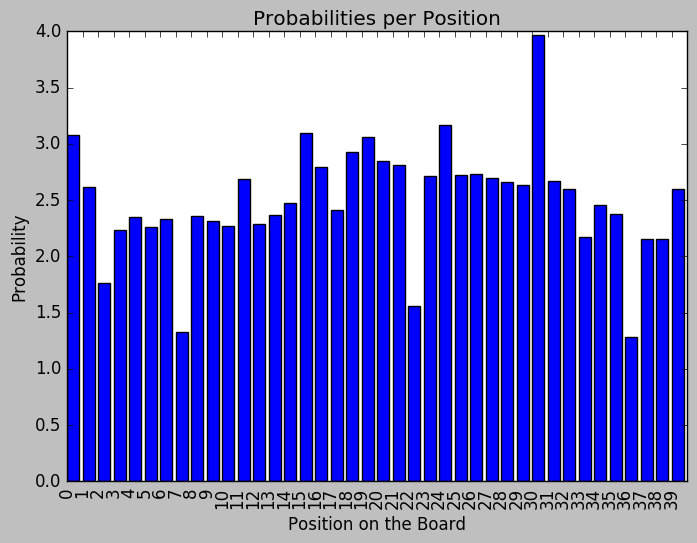

In [21]:
yaxis = (range(0, 40))
xaxis = (Y[0], Y[1], Y[2], Y[3], Y[4], Y[5], Y[6], Y[7], Y[8], Y[9], 
         Y[10], Y[11], Y[12], Y[13], Y[14], Y[15], Y[16], Y[17], Y[18], Y[19], 
         Y[20], Y[21], Y[22], Y[23], Y[24], Y[25], Y[26], Y[27], Y[28], Y[29],
         Y[30], Y[31], Y[32], Y[33], Y[34], Y[35], Y[36], Y[37], Y[38], Y[39])
width = .8
plt.bar(yaxis, xaxis,  width=width)

plt.ylabel('Probability')
plt.xlabel('Position on the Board')
plt.title('Probabilities per Position')
plt.xticks(yaxis, rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.show()

Glancing over the results, it becomes immediately obvious why assuming that each square has an equal probability of 2.5% to be visited leads to a biased strategy. For instance, a high-cost street like Leidsestraat is visited 14% less frequently than this implicit assumption states. A cheaper property like Vrijburg on the other hand, is visited 22% more frequently than people often imagine.

## Approach by Simulation 

Although we have now obtained the result we aimed for, the position probabilities, we have no idea how realiable the outcomes are: after all, a mistake is easily made while deriving the 118x118 transition matrix in excel. The location probabilities after the first turn $p_1$ in the first table above, provide an intial check for mistakes, as these probabilities can still easily be verified by hand. But this is no option for higher values of $k$. Hence, to validate our results we program an algorithm that simulates monopoly games based on the same assumptions as the theoretical approach. If the transition matrix is correctly specified and if we simulate a large number of games, both approaches should give us roughly the same results.

We start again by importing any packages that are required for this section:

In [19]:
import random
from random import shuffle

Next, set-up the simulation algorithm:

In [16]:
def monopoly(maxturns,maxgames):        
    locationcounter = []
    while len(locationcounter) < 40:
        locationcounter.append(0)
    jailcounter = []
    while len(jailcounter) < 4:
        jailcounter.append(0)
    game = 0  
    while game < maxgames:         
        AF = [0,1,10,40,40,40,40,40,40,40,40,40,40,40,40,40]
        shuffle(AF) 
        kans = [0,15,10,11,24,39,'Back',40,40,40,40,40,40,40,40,40]
        shuffle(kans)
        doublecounter = 0 
        location = 0
        turn = 0      
        while turn < maxturns:
            dice = np.random.randint(1,7,2)
            if dice[0] == dice[1]:
                doublecounter += 1
            else:
                doublecounter = 0
            if doublecounter >= 3:
                jailcounter.insert(3,(jailcounter.pop(3)+1))
                location = 10
                doublecounter = 0
            else:
                location = (location + sum(dice))%40 
                if location == 10:
                    jailcounter.insert(0,(jailcounter.pop(0)+1))
                if location == 30:
                    jailcounter.insert(1,(jailcounter.pop(1)+1))
                    location = 10
                    doublecounter = 0
                if location in [7,22,36]:
                    kanskaart = kans[0]
                    shuffle(kans)
                    if kanskaart != 40:
                        if isinstance(kanskaart,int):
                            if kanskaart == 10:
                                jailcounter.insert(2,(jailcounter.pop(2)+1))
                                location = kanskaart
                                doublecounter = 0
                            location = kanskaart
                        else: 
                            location = location - 3
                            if location == 33:
                                AFkaart = AF[0]
                                shuffle(AF)
                                if AFkaart != 40:
                                    if AFkaart == 10:
                                        jailcounter.insert(2,(jailcounter.pop(2)+1))
                                        location = AFkaart
                                        doublecounter = 0
                                    location = AFkaart
                if location in [2,17,33]:
                    AFkaart = AF[0]
                    shuffle(AF)
                    if AFkaart != 40:
                        if AFkaart == 10:
                            jailcounter.insert(2,(jailcounter.pop(2)+1))
                            location = AFkaart
                            doublecounter = 0
                        location = AFkaart
            locationcounter.insert(location,(locationcounter.pop(location)+1))
            turn += 1
        game += 1
    probabilities = [round(100*float(i)/(maxturns*maxgames),2) for i in locationcounter] 
    probabilities.extend([round(100*float(i)/(maxturns*maxgames),2) for i in jailcounter])
    probabilities[10] = probabilities[40]
    probabilities[30] = probabilities[41] + probabilities[42] + probabilities[43]
    return probabilities

Next, run the simulation for a large number of games and turns:

In [41]:
p=monopoly(1000,1000)

In [42]:
    table = [[0,'Start',p[0],20,'Vrij Parkeren',p[20]],[1,'Dorpsstraat',p[1],21,'A-Kerkhof',p[21]],
             [2,'Algemeen-Fonds',p[2],22,'Kans',p[22]],[3,'Brink',p[3],23,'Grote Markt',p[23]],
             [4,'Inkomstenbelasting',p[4],24,'Herestraat',p[24]],[5,'Station Zuid',p[5],25,'Station Noord',p[25]],
             [6,'Steenstraat',p[6],26,'Spui',p[26]],[7,'Kans',p[7],27,'Plein',p[27]],
             [8,'Ketelstraat',p[8],28,'Waterleiding',p[28]],[9,'Velperplein',p[9],29,'Lange Poten',p[29]],
             [10,'Op Bezoek',p[10],30,'Gevangenis',p[30]],[11,'Barteljorisstraat',p[11],31,'Hofplein',p[31]],
             [12,'Elektriciteitsbedrijf',p[12],32,'Blaak',p[32]],[13,'Zijlweg',p[13],33,'Algemeen-Fonds',p[33]],
             [14,'Houtweg',p[14],34,'Coolsingel',p[34]],[15,'Station West',p[15],35,'Station Oost',p[35]],
             [16,'Neude',p[16],36,'Kans',p[36]],[17,'Algemeen-Fonds',p[17],37,'Leidsestraat',p[37]],
             [18,'Biltstraat',p[18],38,'Extra Belasting',p[38]],[19,'Vrijburg',p[19],39,'Kalverstraat',p[39]]]
    
    print tabulate(table,headers=['Pos.','Name','Prob.','Pos.','Name','Prob.'],numalign="right",tablefmt="fancy_grid")

╒════════╤═══════════════════════╤═════════╤════════╤═════════════════╤═════════╕
│   Pos. │ Name                  │   Prob. │   Pos. │ Name            │   Prob. │
╞════════╪═══════════════════════╪═════════╪════════╪═════════════════╪═════════╡
│      0 │ Start                 │    3.06 │     20 │ Vrij Parkeren   │    2.84 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      1 │ Dorpsstraat           │    2.64 │     21 │ A-Kerkhof       │    2.81 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      2 │ Algemeen-Fonds        │    1.76 │     22 │ Kans            │    1.58 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      3 │ Brink                 │     2.2 │     23 │ Grote Markt     │    2.72 │
├────────┼───────────────────────┼─────────┼────────┼─────────────────┼─────────┤
│      4 │ Inkomstenbelasting    │    2.38 │     24 │ Herestraat      │    3.16 │
├────────┼──────

Comparing the results with our Markov Chain outcomes, we find very similar percentages. Deviations are at most 0.04 percentage points, which could easily be attributable to unavoidable variation in the simulation output. It thus seems that our transition matrix is correctly specified, without any (major) mistakes. From here on, we will therefore use the theoretical outcomes for further analysis.

## Identifying Optimal Investment Opportunities

Now that we have concluded the first part of our analysis, i.e. finding the square probabilities, we continue to derive what streets our worthwhile to invest in. This requires some additional input, starting with the costs of acquiring each street and building real estate:

|          Street Name          	| Price of Property 	| Price per House 	| Price of Hotel 	|
|-------------------------------	|-------------------:	|-----------------:	|----------------:	|
| 1. Dorpsstraat Ons Dorp       	| 60                	| 50              	| 50             	|
| 3. Brink Ons Dorp             	| 60                	| 50              	| 50             	|
| 5. Station Zuid               	| 20                	| -               	| -              	|
| 6. Steenstraat Arnhem         	| 100               	| 50              	| 50             	|
| 8. Ketelstraat Arnhem         	| 100               	| 50              	| 50             	|
| 9. Velperplein Arnhem         	| 120               	| 50              	| 50             	|
| 11. Barteljorisstraat Haarlem 	| 140               	| 100             	| 100            	|
| 12. Elektriciteitsbedrijf     	| 150               	| -               	| -              	|
| 13. Zijlweg Haarlem           	| 140               	| 100             	| 100            	|
| 14. Houtstraat Haarlem        	| 160               	| 100             	| 100            	|
| 15. Station West              	| 200               	| -               	| -              	|
| 16. Neude Utrecht             	| 180               	| 100             	| 100            	|
| 18. Biltstraat Utrecht        	| 180               	| 100             	| 100            	|
| 19. Vreeburg Utrecht          	| 200               	| 100             	| 100            	|
| 21. A-Kerkhof Groningen       	| 220               	| 150             	| 150            	|
| 23. Grote Markt Groningen     	| 220               	| 150             	| 150            	|
| 24. Heerstraat Groningen      	| 240               	| 150             	| 150            	|
| 25. Station Noord             	| 200               	| -               	| -              	|
| 26. Spui 'S-Gravenhage        	| 260               	| 150             	| 150            	|
| 27. Plein 'S-Gravenhage       	| 260               	| 150             	| 150            	|
| 28. Waterleiding              	| 150               	| -               	| -              	|
| 29. L. Poten 'S-Gravenhage    	| 280               	| 150             	| 150            	|
| 31. Hofplein Rotterdam        	| 300               	| 200             	| 200            	|
| 32. Blaak Rotterdam           	| 300               	| 200             	| 200            	|
| 34. Coolsingel Rotterdam      	| 320               	| 200             	| 200            	|
| 35. Station Oost              	| 200               	| -               	| -              	|
| 37. Leidschestraat Amsterdam  	| 350               	| 200             	| 200            	|
| 39. Kalverstraat Amsterdam    	| 400               	| 200             	| 200            	|

Notice how the costs of constructing hotels and houses is related to the side of the board. Because at each side of the board there are two cities, we have one relatively expensive city (the first) and a relative inexpensive one (the second). Based on this observation, we can already hypothesize that the second city at each side of the board will pose a better investment.

We would like the cost-data from the above table in vector notation, to use it in further calculations. As stated earlier, we assume that all properties are fully developed with hotels. The costs in that case include buying the street itself, building four houses and constructing a hotel. For the moment, ignore that one needs to own a complete city to be allowed to construct real estate. Because we are primarily interested in the analysis of street-type properties, we disregard any costs (and revenues below) of stations and utilities by setting them to 0.

In [64]:
C=np.array([0, 60+5*50, 0, 60+5*50, 0, 0, 100+5*50, 0, 100+5*50, 120+5*50, 0, 140+5*100, 0, 140+5*100, 160+5*100, 0, 
                180+5*100, 0, 180+5*100, 200+5*100, 0, 220+5*150, 0, 220+5*150, 240+5*150, 0, 260+5*150, 260+5*150, 0, 
                280+5*150, 0, 300+5*200, 300+5*200, 0, 320+5*200, 0, 0, 350+5*200, 0, 400+5*200])

Proceed by bundeling the costs of streets that belong to the same city:

In [101]:
CC=np.array([sum(C[0:5]),sum(C[5:10]),sum(C[10:15]),sum(C[15:20]),sum(C[20:25]),sum(C[25:30]),sum(C[30:35]),sum(C[35:40])])

Next turn to revenues, the table below presents the revenue from a particular street as a function of the developed real estate:

|        Street Name            |Base Rent|Rent One House |Rent Two Houses|Rent Three Houses|Rent Four Houses|Rent Hotel|
|-------------------------------|--------:|-------------: |--------------:|----------------:|---------------:|---------:|
| 1. Dorpsstraat Ons Dorp       | 2       | 10            | 30            | 90              | 160            | 250     	|
| 3. Brink Ons Dorp             | 4       | 20            | 60            | 180             | 320            | 450     	|
| 6. Steenstraat Arnhem         | 6       | 30            | 90            | 270             | 400            | 550    	|
| 8. Ketelstraat Arnhem         | 6       | 30            | 90            | 270             | 400            | 550     	|
| 9. Velperplein Arnhem         | 8       | 40            | 100           | 300             | 450            | 600     	|
| 11. Barteljorisstraat Haarlem | 10      | 50            | 150           | 450             | 625            | 750    	|
| 13. Zijlweg Haarlem           | 10      | 50            | 150           | 450             | 625            | 750   	|
| 14. Houtstraat Haarlem        | 12      | 60            | 180           | 500             | 700            | 900    	|
| 16. Neude Utrecht             | 14      | 70            | 200           | 550             | 750            | 950      |
| 18. Biltstraat Utrecht        | 14      | 70            | 200           | 550             | 750            | 950    	|
| 19. Vreeburg Utrecht          | 16      | 80            | 220           | 600             | 800         	 | 1000    	|
| 21. A-Kerkhof Groningen       | 18      | 90            | 250           | 700             | 875            | 1050    	|
| 23. Grote Markt Groningen     | 18      | 90            | 250           | 700             | 875            | 1050    	|
| 24. Heerstraat Groningen      | 20      | 100           | 300           | 750             | 925            | 1100   	|
| 26. Spui 'S-Gravenhage        | 22      | 110           | 330           | 800             | 975            | 1150    	|
| 27. Plein 'S-Gravenhage       | 22      | 110           | 330           | 800             | 975            | 1150   	|
| 29. L. Poten 'S-Gravenhage    | 24      | 120           | 360           | 850             | 1025           | 1200   	|
| 31. Hofplein Rotterdam        | 26      | 130           | 390           | 900             | 1100           | 1275    	|
| 32. Blaak Rotterdam           | 26      | 130           | 390           | 900             | 1100           | 1275    	|
| 34. Coolsingel Rotterdam      | 28      | 150           | 450           | 1000            | 1200           | 1400    	|
| 37. Leidschestraat Amsterdam  | 35      | 175           | 500           | 1100            | 1300           | 1500   	|
| 39. Kalverstraat Amsterdam    | 50      | 200           | 600           | 1400            | 1700           | 2000    	|


Besides of owning streets, a player can also acquire stations and utilities. On these you cannot increase the potential revenues by constructing buildings. However, when a player holds more than one of these types of property, the mandatory rent increases as displayed in the tables below:

| Stations owned by player: | One           | Two            | Three  | Four   |
|-------------------------- |:----------:   |:------------:  |:------:|:------:|
| Rent                      | 25            | 50             | 100    | 200    |

| Utilities owned by player: | One           | Two            |
|--------------------------  |:----------:   |:------------:  |
| Rent                       | 4 x Diceroll  | 10 x Diceroll  |


Again summarize the above data in vector notation: take the hotel revenue of each square. Remember, the stations and utility revenues are artificially set to zero.

In [65]:
R=np.array([0, 250, 0, 450, 0, 0, 550, 0, 550, 600, 0, 750 ,0, 750, 900, 0, 950, 0, 950, 1000, 0, 1050, 
 0, 1050, 1100, 0, 1150, 1150, 0, 1200, 0, 1275, 1275, 0, 1400, 0, 0, 1500, 0, 2000])

Now consider a situation where one player owns all the properties on the board with hotels on them (even though this is strictly not possible due to a lack of hotels). A second player moves aimlessly around the board. Using the markov chain position probabilities found earlier, we can define the expected revenue of the former player per turn of the latter player:

In [74]:
E = R*(Y/100)

Bundle the expected revenue per turn of the opponent by city:

In [86]:
EC=np.array([sum(E[0:5]),sum(E[5:10]),sum(E[10:15]),sum(E[15:20]),sum(E[20:25]),sum(E[25:30]),sum(E[30:35]),sum(E[35:40])])  

Now we are all set to describe the net revenue of each city as a function of the opponent's number of turns. Plotly is ideal for this. We created an plotly-account, and using the output of the CC and EC vectors, we created the interactive plot below: 

In [128]:
import plotly 
plotly.tools.set_credentials_file(username='U1247846', api_key='IFKTdRyHHuuvFB78ZRY6')
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
tls.set_credentials_file(username="U1247846",api_key="IFKTdRyHHuuvFB78ZRY6")
py.sign_in('U1247846', 'IFKTdRyHHuuvFB78ZRY6')
tls.embed("https://plot.ly/~U1247846/5/net-revenue-vs-opponents-turns/")

## Conclusion

The aim of this project was to answer the research question: *what are the optimal Monopoly properties to invest in?* The answer to this question can be derived from the plotly graph above. Any conclusion appears to depend on the number of opponents' turns you expect in the game after you have built hotels on the properties of your choice. This in turn is linked to the number of participants in the game. If you play against only one other player, it would be advised to develop property on city-squares that peak early with respect to the opponent's number of turns. The orange city ("Utrecht" in the above case) clearly outperforms other cities in this context, and to a lesser degree the red city ("Groningen") and yellow city ("Den Haag") are worthwile as well. If more than two players are present, the number of opponents' turns will more easily reach high numbers, in which case the green city ("Rotterdam") is the best investment opportunity. As the number of opponents' turns goes to infinity, the green city will keep generating the highest net return. The most striking result however, is that the dark blue city ("Amsterdam") is in no situation optimal to invest in. This contradicts the common idea that the dark blue city is the "holy grail" of the game.

Let us finalize this project with a note on external validity: we have made a lot of simplifying assumptions along the way, so to what extent can we rely on the above results? Our opinion is that most of these assumption will not have a particular significant effect on the outcome, except for the influence of [player choice](https://www.youtube.com/watch?v=FToHabxSVYg). Player preferences can of course be estimated given an underlying dataset on decisions in key situations, and this would allow us to improve the fit of our model. Predicting player behaviour, however, would make the results contigent on the typical strategy pattern observed. It would be doubtful therefore, whether the outcomes in that setting are particularly insightful to any random player who's prefered behaviour may very well diverge considerably from the typical pattern. Keeping the analysis deterministic, i.e. abstracting from player choice, provides in that sense better information, as it provides a clear benckmark case where players can thoroughly rely on if they keep the known underlying assumptions in mind.
